<img src="../../images/wt4.png" align="right" width="70"/>

  #     Notebook for early bearing fault detection for WT03



## Table of contents
1. Load Raw filtered signal
2. Extract Optimal Bandwidth Based on SK
3. Read Kurtogram Plots
4. Filter Signal with Optimal Bandpass Based on SK
5. Frequency study: obtain different envelope order spectrums for different narrow-bands

In [1]:
%load_ext autoreload

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os,os.path
from scipy.stats import kurtosis, skew

ROOT_PATH = os.path.abspath("..").split("data_processing")[0]
module_paths = []
module_paths.append(os.path.abspath(os.path.join(ROOT_PATH+"/data_processing/")))
module_paths.append(os.path.abspath(os.path.join(ROOT_PATH+"/hybrid_analysis_process_functions/")))
module_paths.append(os.path.abspath(os.path.join(ROOT_PATH+"/utils/")))
for module_path in module_paths:
    if module_path not in sys.path:
        print("appended")
        sys.path.append(module_path)
%autoreload
import functions as f
import wt_data, ff_transform, explore_fft_time_data, envelope, build_dataset, load_raw_signals, envelope, envelope_emd,plotting_methods
import resample_signals, filter_signals, plotting_methods,filters,correlation_coeff


appended
appended
appended
ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
/Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src


## 1. Load Raw Filtered signal 

In [3]:
turbine = 'wt03'
vib_signals, times, op_data_intervals, peak_array = load_raw_signals.load_raw('gearbox',turbine)
avg_rpm = np.asarray(op_data_intervals['AvgSpeed'])
avg_power = np.asarray(op_data_intervals['AvgPower'])

wt_date_path = f'/Volumes/OsvikExtra/signal_data/raw_data/gearbox/{turbine}/'
dates = pd.read_csv(f'{wt_date_path}interval_dates_{turbine}.csv')
dates = dates.drop(columns=['Unnamed: 0'])


File exist


In [5]:
# Reading filtered from disk
wt_folder_path = f'/Volumes/OsvikExtra/signal_data/raw_filtered_6000Hz/gearbox/{turbine}/'
filtered_path = f'{wt_folder_path}filtered/'

num_csvs = len([f for f in os.listdir(filtered_path) 
     if f.endswith('.csv') and os.path.isfile(os.path.join(filtered_path, f)) and f[0]=='f'])

filtered_signals = []
filtered_freqs = []
columns = []
for i in range(num_csvs):
    acc=pd.read_csv(filtered_path+'filtered_raw_6000_'+str(i)+'.csv')
    columns.append('filtered_' + str(i))
    filtered_signals.append(acc.values.T[0])
    filtered_freqs.append(acc.shape[0] / times[i][-1])
    print(f'Reading {i+1} / {num_csvs} files', end='\r')

## 2. Extract Optimal Bandwidth Based on SK

In [6]:
# Finding the optimal bandwidth by taking the mean from the SK
fc_and_bw_path = f'{wt_folder_path}center_frequencies_&_bandwidth/fc_and_bw_data.csv'
# Finding the optimal bandwidth by taking the mean from the SK
fc_and_bw_data = pd.read_csv(fc_and_bw_path)
fc_and_bw_data

File   Frequencies   Bandwidths
0      filtered_raw_6000_0.csv   4800.018311  3200.012207
1      filtered_raw_6000_1.csv   6125.023365    50.000191
2     filtered_raw_6000_10.csv   6100.023270    66.666921
3    filtered_raw_6000_100.csv   3200.012207  6400.024414
4    filtered_raw_6000_101.csv   3200.012207  6400.024414
5    filtered_raw_6000_102.csv   6025.022984    50.000191
6    filtered_raw_6000_103.csv    775.002956    50.000191
7    filtered_raw_6000_104.csv   3200.012207  6400.024414
8    filtered_raw_6000_105.csv   3200.012207  6400.024414
9    filtered_raw_6000_106.csv   7175.027371    50.000191
10   filtered_raw_6000_107.csv   3200.012207  6400.024414
11   filtered_raw_6000_108.csv   3200.012207  6400.024414
12   filtered_raw_6000_109.csv   6125.023365    50.000191
13    filtered_raw_6000_11.csv   5725.021839    50.000191
14   filtered_raw_6000_110.csv   5825.022221    50.000191
15   filtered_raw_6000_111.csv   9600.036621  6400.024414
16   filtered_raw_6000_112.csv   6425.024510    50.000191
17   filtered_raw_6000_113.csv   6275.023937    50.000191
18   filtered_raw_6000_114.csv   4800.018311  3200.012207
19   filtered_raw_6000_115.csv   7225.027561    50.000191
20   filtered_raw_6000_116.csv   6025.022984    50.000191
21   filtered_raw_6000_117.csv   5975.022793    50.000191
22   filtered_raw_6000_118.csv   5225.019932    50.000191
23   filtered_raw_6000_119.csv   6375.024319    50.000191
24    filtered_raw_6000_12.csv   4800.018311  3200.012207
25   filtered_raw_6000_120.csv   8025.030613    50.000191
26   filtered_raw_6000_121.csv   5975.022793    50.000191
27   filtered_raw_6000_122.csv   6075.023174    50.000191
28   filtered_raw_6000_123.csv   5825.022221    50.000191
29   filtered_raw_6000_124.csv   9600.036621  6400.024414
..                         ...           ...          ...
385   filtered_raw_6000_72.csv  10500.040054    66.666921
386   filtered_raw_6000_73.csv   3200.012207  6400.024414
387   filtered_raw_6000_74.csv   3200.012207  6400.024414
388   filtered_raw_6000_75.csv   7100.027084    66.666921
389   filtered_raw_6000_76.csv   5725.021839    50.000191
390   filtered_raw_6000_77.csv   5725.021839    50.000191
391   filtered_raw_6000_78.csv    825.003147    50.000191
392   filtered_raw_6000_79.csv   6125.023365    50.000191
393    filtered_raw_6000_8.csv   5975.022793    50.000191
394   filtered_raw_6000_80.csv   6275.023937    50.000191
395   filtered_raw_6000_81.csv   3200.012207  6400.024414
396   filtered_raw_6000_82.csv   4800.018311  3200.012207
397   filtered_raw_6000_83.csv   6525.024891    50.000191
398   filtered_raw_6000_84.csv   5925.022602    50.000191
399   filtered_raw_6000_85.csv   5875.022411    50.000191
400   filtered_raw_6000_86.csv   5975.022793    50.000191
401   filtered_raw_6000_87.csv   5966.689428    66.666921
402   filtered_raw_6000_88.csv   5625.021458    50.000191
403   filtered_raw_6000_89.csv   3200.012207  6400.024414
404    filtered_raw_6000_9.csv    825.003147    50.000191
405   filtered_raw_6000_90.csv   7175.027371    50.000191
406   filtered_raw_6000_91.csv    825.003147    50.000191
407   filtered_raw_6000_92.csv   3200.012207  6400.024414
408   filtered_raw_6000_93.csv   3200.012207  6400.024414
409   filtered_raw_6000_94.csv   5975.022793    50.000191
410   filtered_raw_6000_95.csv   5925.022602    50.000191
411   filtered_raw_6000_96.csv   3200.012207  6400.024414
412   filtered_raw_6000_97.csv   5775.022030    50.000191
413   filtered_raw_6000_98.csv   6375.024319    50.000191
414   filtered_raw_6000_99.csv   6075.023174    50.000191

[415 rows x 3 columns]

Before filter shape: (415, 9)
After filtering: (323, 9)


Unnamed: 0     AvgPower     ActPower  WindSpeed  NacelleDirection  \
0             0   449.223083   461.200012        5.6        189.000000   
1             1  2953.059326  3062.600098       12.2        211.300003   
2             2  2506.833740  2213.600098        9.8        210.300003   
3             3  2638.403320  2538.399902       10.2         36.900002   
4             4   680.030701   414.600006        5.9        299.100006   
5             5  2603.288818  2243.100098        9.9        110.800003   
6             6  2491.353760  3285.800049       13.5        241.899994   
7             7  3289.359131  3477.300049       13.1        229.699997   
8             8  2533.696289  1769.300049        8.9        103.400002   
9             9   892.192566   912.799988        8.4        138.699997   
10           10  3300.115234  2902.399902       13.8        204.699997   
11           11  2506.577881  2248.399902       12.5         68.000000   
12           12   905.555725  1132.800049        7.5        224.899994   
13           13  2665.607666  2833.600098       11.3        134.500000   
14           14   407.003754   248.600006        6.1        191.399994   
15           15  2510.403564  2677.899902       10.5        122.800003   
16           16  2505.777832  2327.100098       10.1        196.199997   
17           17   502.944458   540.599976        6.4        112.699997   
18           18  2630.899902  2833.300049       10.2        247.199997   
19           19   597.818481   512.200012        5.9        222.699997   
20           20   400.407410   305.000000        5.5        135.500000   
21           21  2543.844238  2422.500000       10.4        110.300003   
22           22  3133.881104  3305.000000       11.5         99.599998   
23           23  3298.363525  3149.100098       12.2         94.300003   
24           24  2260.361084  2473.199951        8.2        115.599998   
25           25  3299.125977  3286.800049       13.3        125.400002   
26           26  2938.396484  2189.399902        9.8        196.399994   
27           27  1898.548096  1811.000000        8.6        228.600006   
28           28  2835.966797  2894.500000       11.1        227.300003   
29           29  2713.940674  2491.300049        9.6        181.800003   
..          ...          ...          ...        ...               ...   
385         385  2632.799805  2643.199951       10.5         83.400002   
386         386  2751.422363  2580.100098       10.5         86.099998   
387         387  2526.351807  2104.300049        7.8         86.400002   
388         388  1412.618652  1255.900024        8.0         84.000000   
389         389  2523.953613  2050.100098       11.0         95.699997   
390         390  2360.561279  1923.000000        9.0         86.599998   
391         391  2590.603516  2655.899902       10.6         98.800003   
392         392  2552.648193  2710.000000       11.7         98.599998   
393         393   422.933350   405.299988        5.4         98.800003   
394         394   402.696106   402.000000        5.1         98.099998   
395         395  2535.630615  2486.300049       10.6         88.500000   
396         396  3003.092773  1996.199951        7.2         88.699997   
397         397  2265.040771  3313.800049       10.6        107.400002   
398         398  3262.803223  3309.600098       10.6        109.500000   
399         399  2689.607422  2150.199951       10.1          9.500000   
400         400  2638.244629  2524.199951       10.5          0.200000   
401         401  2003.711426  2912.699951       13.1         98.099998   
402         402  3296.044678  3457.800049       12.1         81.800003   
403         403  2578.484863  2607.500000       10.5        171.399994   
404         404  3249.970215  3312.199951       17.4        210.300003   
405         405   423.214813   570.599976        6.8        188.399994   
406         406  2623.148193  1807.500000        8.5        103.099998   
407      

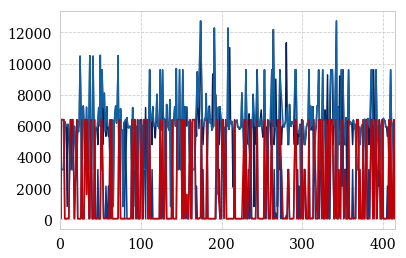

In [7]:
# Make the file column to an int
fc_and_bw_data['File']=fc_and_bw_data['File'].apply(lambda x: int((str(x).split('_'))[3].split('.csv')[0]))
# Sort the df based on this
fc_and_bw_data=fc_and_bw_data.sort_values('File',ascending=True)
fc_and_bw_data = fc_and_bw_data.reset_index(drop=True)

# How the frequencies and bandwidths vary across the intervals for wt:
fc_and_bw_data['Frequencies'].plot()
fc_and_bw_data['Bandwidths'].plot()

op_data_intervals
concated = pd.concat([op_data_intervals, fc_and_bw_data],axis=1)

print(f"Before filter shape: {concated.shape}")
filter_concated = concated.loc[(concated['AvgSpeed'] >= 1400)]
print(f"After filtering: {filter_concated.shape}")
mean_freq = filter_concated['Frequencies'].mean()
mean_bw = filter_concated['Bandwidths'].mean()
filter_concated['Frequencies'].plot()
filter_concated['Bandwidths'].plot()
concated

## 3. Read Kurtogram Plots

In [8]:
# Read kurtogram data
fc_and_bw_path = f'{wt_folder_path}center_frequencies_&_bandwidth/fc_and_bw_data.csv'
frequencies_path = f'{wt_folder_path}center_frequencies_&_bandwidth/frequencies.csv'
file_names_path = f'{wt_folder_path}center_frequencies_&_bandwidth/file_name.txt'

file_names = pd.read_csv(file_names_path, header=None)

frequencies = pd.read_csv(frequencies_path)
frequencies_numpy = np.asarray(frequencies).T
frequencies = pd.DataFrame(frequencies_numpy, columns= frequencies_numpy[0])
frequencies = frequencies.drop(frequencies.index[0]).reset_index(drop=True)

fc_and_bw = pd.read_csv(fc_and_bw_path)
fc_bw_numpy = fc_and_bw.values.T
fc_bw_pd = pd.DataFrame(fc_bw_numpy, columns=fc_bw_numpy[0])
fc_bw_pd = fc_bw_pd.drop(fc_bw_pd.index[0])
fc_bw_pd.insert(0, 'RowName', ['Center Frequency', 'BandWidth'])
fc_bw_pd=fc_bw_pd.set_index('RowName')
fc_bw_pd

filtered_raw_6000_0.csv filtered_raw_6000_1.csv  \
RowName                                                            
Center Frequency                 4800.02                 6125.02   
BandWidth                        3200.01                 50.0002   

                 filtered_raw_6000_10.csv filtered_raw_6000_100.csv  \
RowName                                                               
Center Frequency                  6100.02                   3200.01   
BandWidth                         66.6669                   6400.02   

                 filtered_raw_6000_101.csv filtered_raw_6000_102.csv  \
RowName                                                                
Center Frequency                   3200.01                   6025.02   
BandWidth                          6400.02                   50.0002   

                 filtered_raw_6000_103.csv filtered_raw_6000_104.csv  \
RowName                                                                
Center Frequency                   775.003                   3200.01   
BandWidth                          50.0002                   6400.02   

                 filtered_raw_6000_105.csv filtered_raw_6000_106.csv  ...  \
RowName                                                               ...   
Center Frequency                   3200.01                   7175.03  ...   
BandWidth                          6400.02                   50.0002  ...   

                 filtered_raw_6000_90.csv filtered_raw_6000_91.csv  \
RowName                                                              
Center Frequency                  7175.03                  825.003   
BandWidth                         50.0002                  50.0002   

                 filtered_raw_6000_92.csv filtered_raw_6000_93.csv  \
RowName                                                              
Center Frequency                  3200.01                  3200.01   
BandWidth                         6400.02                  6400.02   

                 filtered_raw_6000_94.csv filtered_raw_6000_95.csv  \
RowName                                                              
Center Frequency                  5975.02                  5925.02   
BandWidth                         50.0002                  50.0002   

                 filtered_raw_6000_96.csv filtered_raw_6000_97.csv  \
RowName                                                              
Center Frequency                  3200.01                  5775.02   
BandWidth                         6400.02                  50.0002   

                 filtered_raw_6000_98.csv filtered_raw_6000_99.csv  
RowName                                                             
Center Frequency                  6375.02                  6075.02  
BandWidth                         50.0002                  50.0002  

[2 rows x 415 columns]

In [8]:
def flip_date(date):
    splitted_date = date.split('-')
    year  = splitted_date[0]
    month = splitted_date[1]
    day   = splitted_date[2].split(' ')[0]
    time  = splitted_date[2].split(' ')[1]
    new_date = day + '.' + month + '.' + year + ' ' + time
    return new_date

Avg Power: 2953.059326172      Avg RPM: 1488.5676679815895


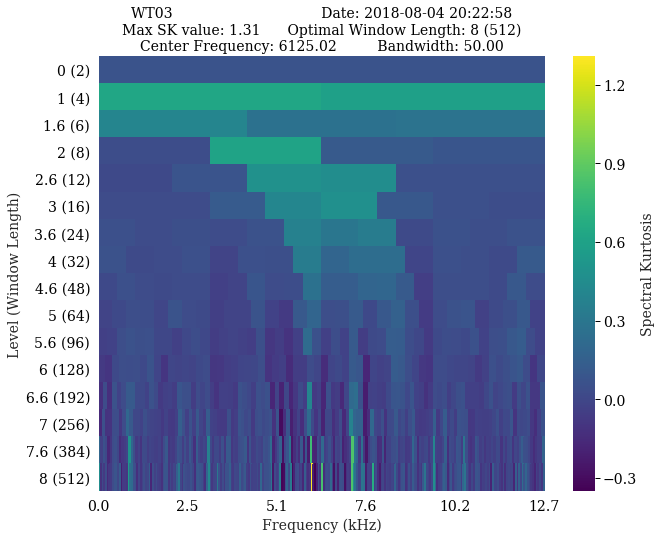

Avg Power: 3099.618408203      Avg RPM: 1469.8869487004386


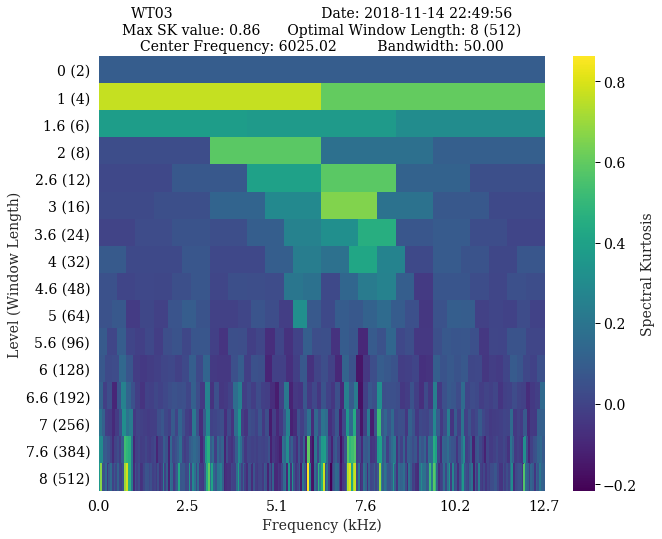

Avg Power: 2855.888671875      Avg RPM: 1482.5869954813872


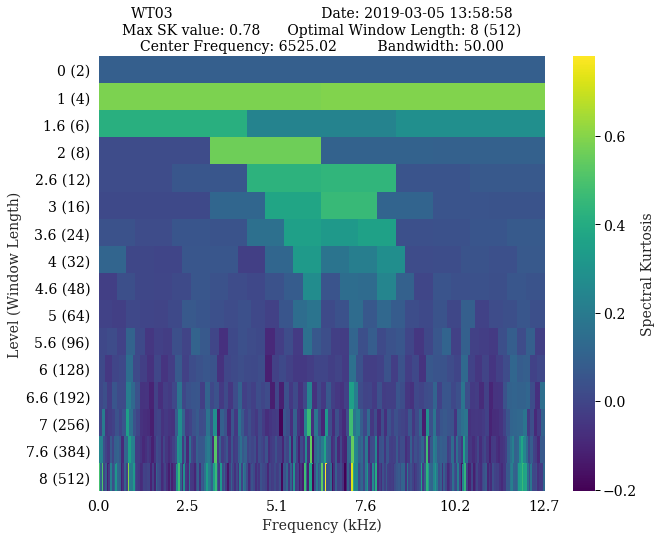

Avg Power: 2887.4384765629998      Avg RPM: 1472.7170925222192


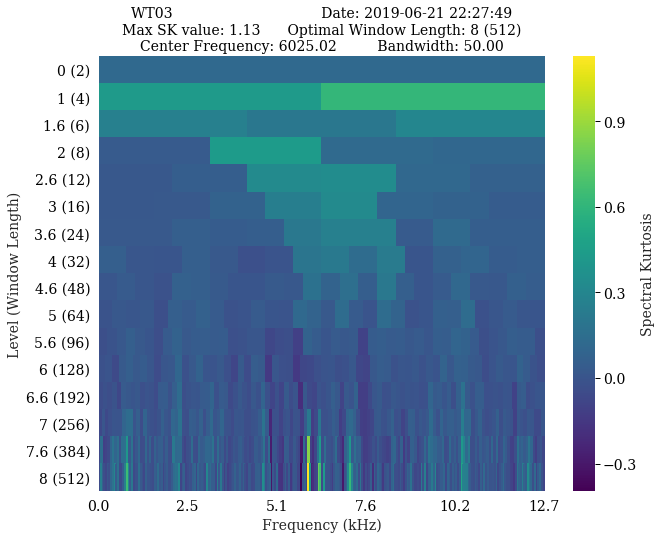

Avg Power: 3207.4372558590003      Avg RPM: 1467.8665543810353


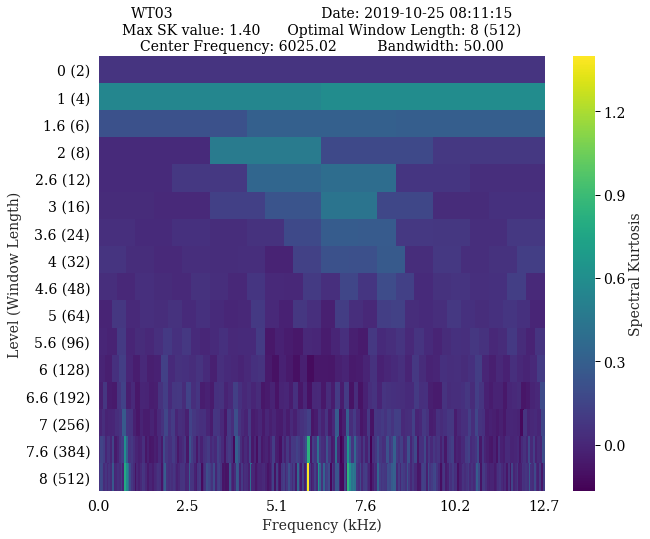

In [11]:
kurt_path = f'{wt_folder_path}kurtograms/';
#save_path = f'{wt_folder_path}kurt_plots/';
save_path = '../../plots/kurt_plots_right_interval/'
wt=turbine
num_csvs = len([f for f in os.listdir(kurt_path) 
     if f.endswith('.csv') and f[0]=='k' and os.path.isfile(os.path.join(kurt_path, f))])

interesting_intervals = [1, 102, 199, 301, 411]

#for i in range(num_csvs):
for i in interesting_intervals:
#    if i < 0:
 #       continue
    if False: #(i > 20 and i < 90) or (i > 110 and i < 290) or (i > 380 and i < 400) or (i > 400):
        continue
    filename = f'kgram_filtered_raw_6000_{i}.csv'
    if avg_power[i] > 2800:
        kurt_file = f'{kurt_path}{filename}'
        kurtogram = pd.read_csv(kurt_file, header=None)
        
        frequency_filename = '_'.join(filename.split('_')[1:])
        
        max_SK = np.max(np.max(kurtogram))
        center_frequency = fc_bw_pd[frequency_filename][0]
        bandwidth = fc_bw_pd[frequency_filename][1]
        highest_window = np.argmax(kurtogram.max(axis=1))
        dato = flip_date(dates.values[i][0])
        name = f'WT03                                 Date: {dato}'
        file_name = f'{save_path}kurt_{turbine}_{i}'

        print(f'Avg Power: {avg_power[i]}      Avg RPM: {avg_rpm[i]}')
        _ = plotting_methods.plot_kurtogram(kurtogram, 
                                        frequencies[frequency_filename], 
                                        file_name=frequency_filename,
                                        max_sk=max_SK,
                                        cf=center_frequency,
                                        bw=bandwidth,
                                        wt=wt,
                                        window=highest_window,
                                        title=name,
                                        save_path=file_name)

        print(f'Plot {i+1} / {num_csvs} created', end='\r')


## 4. Filter Signal with Average Optimal Bandpass Based on SK

In [9]:
# Perform bandpass filtering on the raw signal!
def filter_based_on_optimal_bw(low,high,signal,time,plot=False):
    #use_signal = sig
    #signal = use_signal
    fs, _, _, _ =  envelope.get_sampling_freq(signal, time)
    
    #### Hardcoding the filters
    y = filters.butter_bandpass_filter(signal,low,high,fs)
    if plot:
        plt.plot(signal)
        plt.margins(0)
        plt.xlabel("Samples")
        plt.ylabel("Amplitude")
        plt.show()
        plt.title('Resampled signal with highpass filtering')
        plt.plot(y)
        plt.xlabel("Samples")
        plt.margins(0)
        plt.ylabel("Amplitude")
        plt.title(f'Interval {i} from {turbine} filtered with average optimal bandpass from SK \n Component: Gearbox')
    return y

# Just loop through
optimal_bandpass_signals = []
signal_size = len(filtered_signals)
for i in range(len(filtered_signals)):
    use_signal = filtered_signals[i][0:(len(filtered_signals[i])//2)]
    time = times[i][0:(len(filtered_signals[i])//2)]
    low = mean_freq - mean_bw/4
    high = mean_freq + mean_bw/4
    y = filter_based_on_optimal_bw(low,high,use_signal, time)
    optimal_bandpass_signals.append(y)
    #plotting_methods.plot_fft(time, use_signal, interval_num=i)
    print(f'Filtering {i+1} / {signal_size} signals', end='\r')
#del filtered_signals

## 5. Frequency study (fault characteristics), fault development

### Exploring Envelope Order Spectrums of Different Frequency Ranges
Using 80% of nominal power: only comparing intervals with average power > 2400

### 5.1 Filter Signal with Individual Optimal Bandpass Based on SK

In [10]:
def normalise_fft(fft):
    N = fft.shape[0]
    y = np.abs(fft)[:N // 2] * 1 / N  # Normalized
    return y

In [11]:
fs = 26500

In [12]:
# Just loop through
optimal_bandpass_individual = []
signal_size = len(vib_signals)
for i in range(len(vib_signals)):
    use_signal = vib_signals[i]
    time = times[i]
    cf = float(concated['Frequencies'][i])
    bw = float(concated['Bandwidths'][i])
    low = cf - bw/2
    high = cf + bw/2
    #if bw > cf:
    #    low = 6000
    #    high = 12000
    #if bw < 100:
    #    low = cf - bw*3
    #    high = cf + bw*3
    if high > 0.5*fs:
        high = 0.5*fs -100
    
    if i == 174 or i == 342:
        optimal_bandpass_individual.append(y)
        continue
    y = filter_based_on_optimal_bw(low,high,use_signal, time)
    optimal_bandpass_individual.append(y)
    #plotting_methods.plot_fft(time, use_signal, interval_num=i)
    print(f'Filtering {i+1} / {signal_size} signals', end='\r')

In [13]:
interesting_intervals = [1, 102, 199, 301, 411]

all_fft_res  = []
all_freq_res = []
all_fft      = []
all_freq     = []

#for i, signal in enumerate(optimal_bandpass_individual):
for i in interesting_intervals:
    bw = float(concated['Bandwidths'][i])
    if avg_power[i] < 2700:
        continue
    #if bw < 1000 and i<50:# or (i>50 and i<60) or (i > 190 and i < 200)):
    if True: # i<20 or (i>50 and i<60) or (i > 190 and i < 200):
        # Plot SK filtered signal
        #plotting_methods.plot_signal(times[i][1:], optimal_bandpass_individual[i],name='SK Filtered', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        fft, freq = plotting_methods.plot_fft(times[i][1:], optimal_bandpass_individual[i], name='SK Filtered', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        all_fft.append(normalise_fft(fft))
        all_freq.append(freq)
        #Calcutale envelope
        
        highut_lp = 1000
        rectified = abs(optimal_bandpass_individual[i])**2
        bandpass_filtered_rect_lp = filters.butter_lp_filter(rectified, highut_lp, fs, order=5)
        
        #Plot envelope signal
        one_order = avg_rpm[i]/60
        freq=[one_order]
        #plotting_methods.plot_fft(times[i][1:], bandpass_filtered_rect_lp, x_max=100,frequency_lines=freq,name='SK Filtered Envelope', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        
        #Calculate Envelope Order
        try:
            x_round, resampled_envelope, x_time = resample_signals.do_cubic_resampling(times[i][1:], bandpass_filtered_rect_lp, peak_array[i], number_of_resample_points=2000)
            fft_res, freq_res = plotting_methods.plot_fft(x_round, resampled_envelope, x_max=15,frequency_lines=[], name='SK Filtered Envelope Order', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
            all_fft_res.append(normalise_fft(fft_res))
            all_freq_res.append(freq_res)
        except:
            print('---------------------------------------\n\n')
            print(f'              INTERVAL {i}')
            print('ENVELOPE ORDER COULD NOT BE CALCULATED!\n\n')
            print('---------------------------------------')
        print(f'Kurtosis of {i} {kurtosis(optimal_bandpass_individual[i]):.3f}')
        print(f'Center Frequency: {concated["Frequencies"][i]:.3f}')
        print(f'Bandwidth from SK: {concated["Bandwidths"][i]:.3f}')
        print(f'Used Bandwidth: {concated["Bandwidths"][i]*8:.3f}')
        print(f'Used Bandwidth in orders: {concated["Bandwidths"][i]*6*60/avg_rpm[i]:.3f}')

Kurtosis of 1 2.087
Center Frequency: 6125.023
Bandwidth from SK: 50.000
Used Bandwidth: 400.002
Used Bandwidth in orders: 12.092
Kurtosis of 102 0.752
Center Frequency: 6025.023
Bandwidth from SK: 50.000
Used Bandwidth: 400.002
Used Bandwidth in orders: 12.246
Kurtosis of 199 1.450
Center Frequency: 6525.025
Bandwidth from SK: 50.000
Used Bandwidth: 400.002
Used Bandwidth in orders: 12.141
Kurtosis of 301 2.074
Center Frequency: 6025.023
Bandwidth from SK: 50.000
Used Bandwidth: 400.002
Used Bandwidth in orders: 12.222
Kurtosis of 411 2.082
Center Frequency: 6025.023
Bandwidth from SK: 50.000
Used Bandwidth: 400.002
Used Bandwidth in orders: 12.263


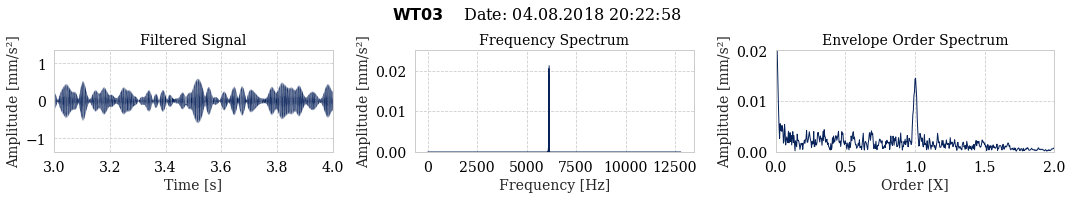

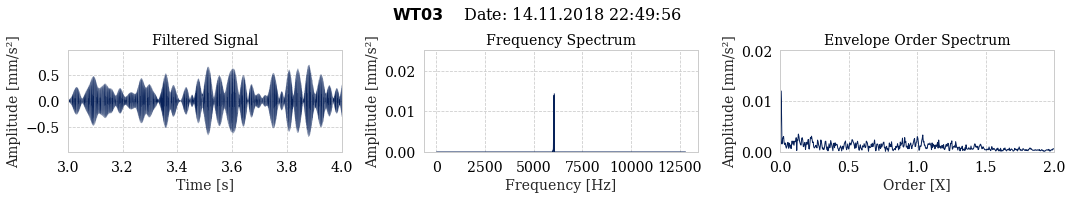

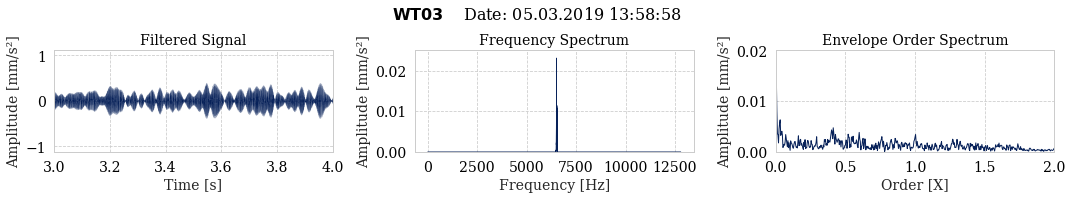

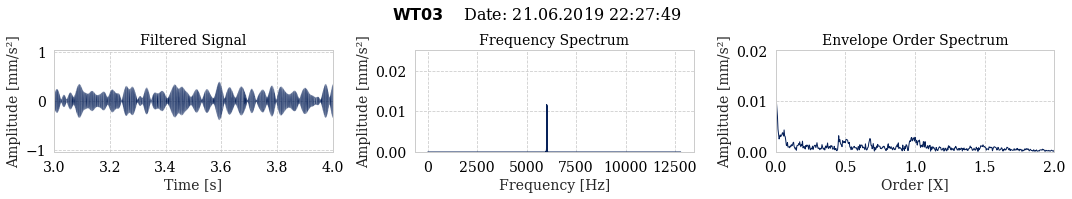

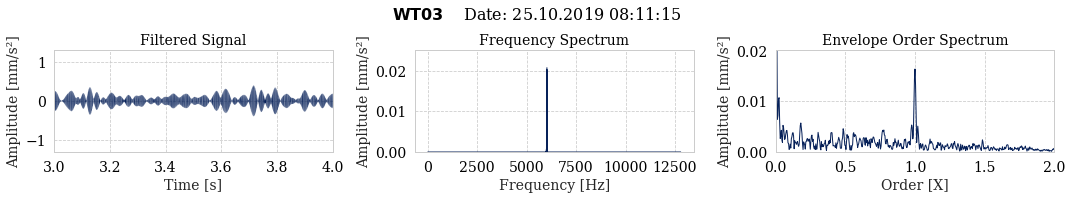

In [15]:
rows = 1
cols = 3
save_path = '../../plots/envelope_order_sk/'

for i, interval in enumerate(interesting_intervals):
    fig, ax = plt.subplots(rows, cols,figsize=(15,2.5))
    dato = flip_date(dates.values[interval][0])
    my_suptitle = fig.suptitle(r"$\bf{WT03}$" + f'    Date: {dato}',fontsize=16, y=1.09)
    
    
    ax[0].plot(times[interval][0:], optimal_bandpass_individual[interval], linewidth=0.05)
    ax[0].set_title(f"Filtered Signal")
    ax[0].set_ylabel("Amplitude [mm/s\u00b2]")
    ax[0].set_xlabel("Time [s]")
    ax[0].set_xlim(3, 4)

    ax[1].plot(all_freq[i], all_fft[i], linewidth=0.5)
    ax[1].set_title(f"Frequency Spectrum")
    ax[1].set_ylabel("Amplitude [mm/s\u00b2]")
    ax[1].set_xlabel("Frequency [Hz]")
    ax[1].set_ylim(0, 0.025)

    ax[2].plot(all_freq_res[i], all_fft_res[i], linewidth=1)
    ax[2].set_title(f"Envelope Order Spectrum")
    ax[2].set_ylabel("Amplitude [mm/s\u00b2]")
    ax[2].set_xlabel("Order [X]")
    ax[2].set_xlim(0, 2)
    ax[2].set_ylim(0, 0.02)

    plt.tight_layout()
    plt.savefig(f'{save_path}wt03_{interval}.png', dpi=300, bbox_extra_artists=[my_suptitle], bbox_inches='tight')
    plt.show()

### 5.2 Highpass Filter with Lowcut 2500Hz

In [12]:
# Just loop through
bandpassed_2K = []
signal_size = len(vib_signals)
for i in range(len(vib_signals)):
    use_signal = vib_signals[i]
    time = times[i]
    
    low = 2500
    high = 12700

    y = filter_based_on_optimal_bw(low,high,use_signal, time)
    bandpassed_2K.append(y)
    print(f'Filtering {i+1} / {signal_size} signals', end='\r')

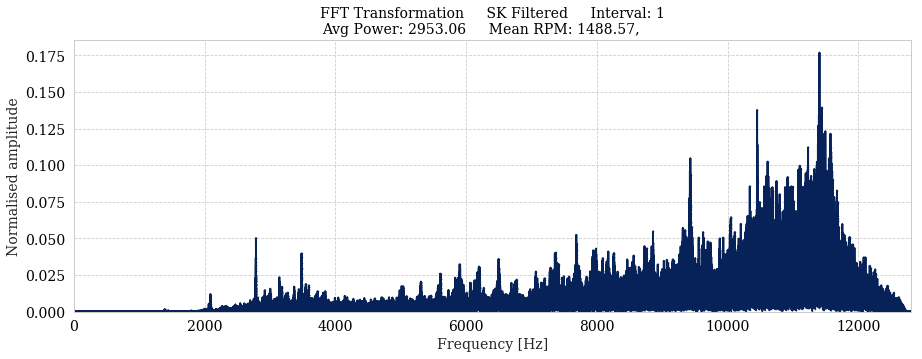

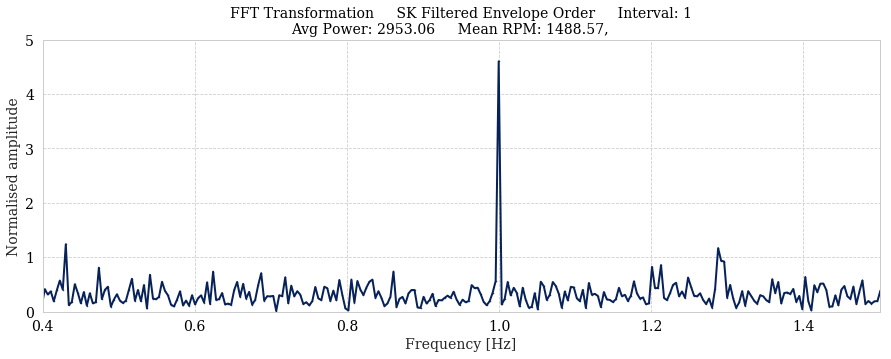

Kurtosis of 1 0.091
Center Frequency: 2500.000
Used Bandwidth in orders: 16.123


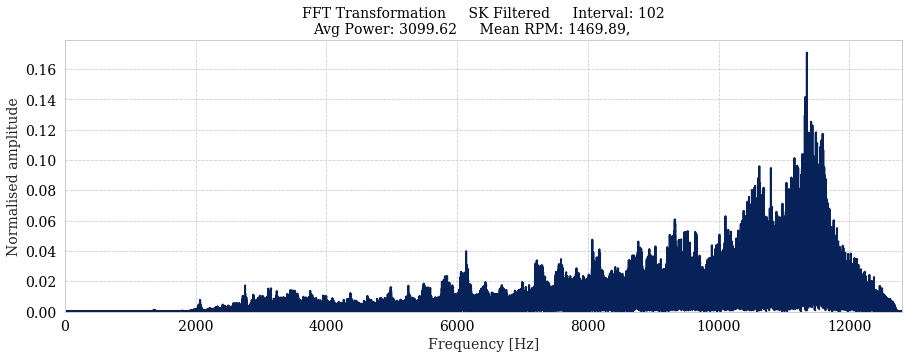

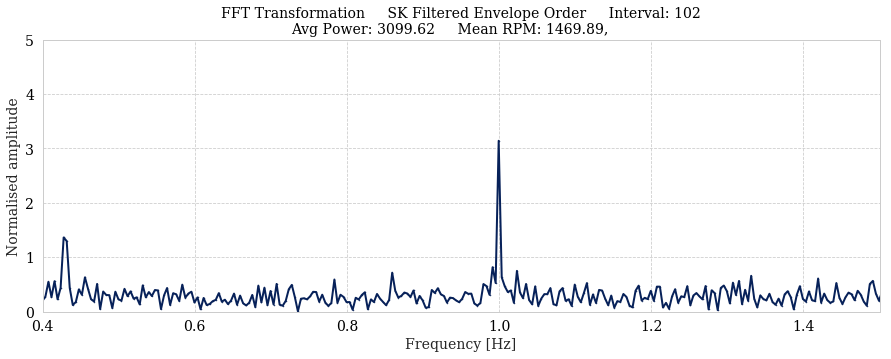

Kurtosis of 102 0.105
Center Frequency: 2500.000
Used Bandwidth in orders: 16.328


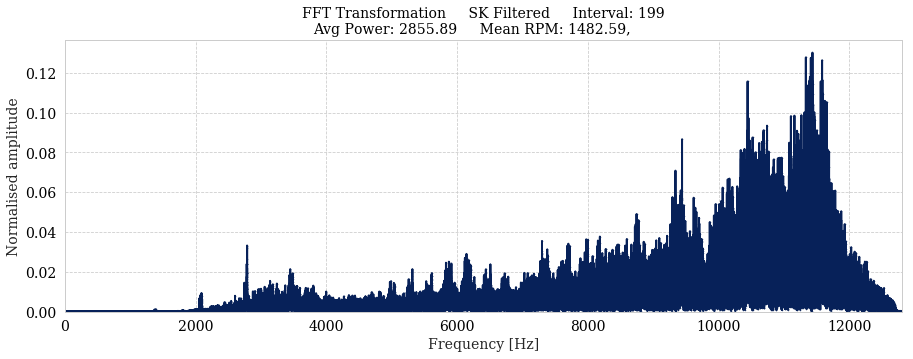

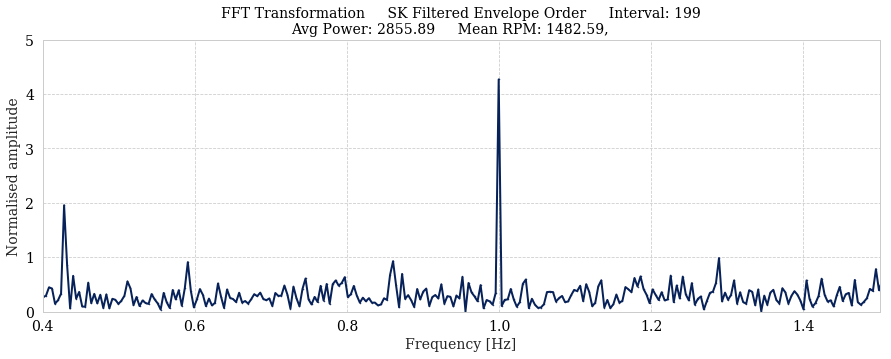

Kurtosis of 199 0.100
Center Frequency: 2500.000
Used Bandwidth in orders: 16.188


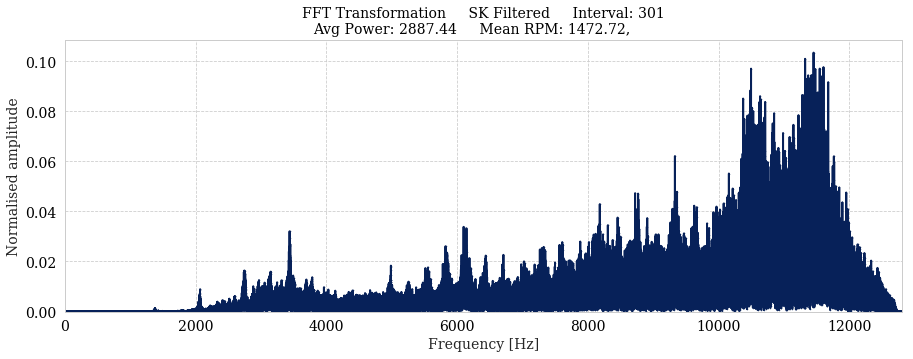

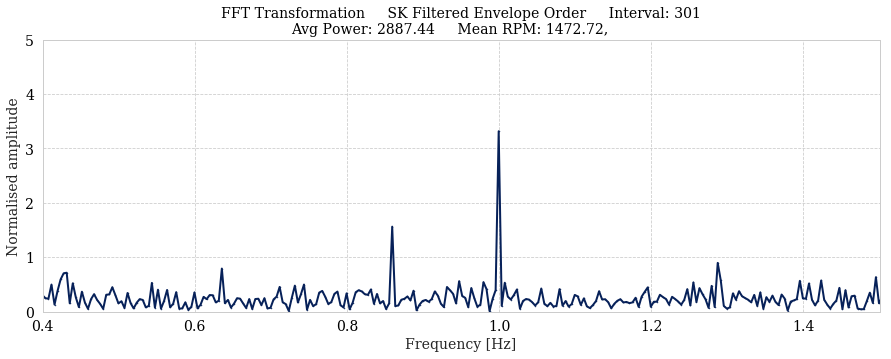

Kurtosis of 301 0.123
Center Frequency: 2500.000
Used Bandwidth in orders: 16.296


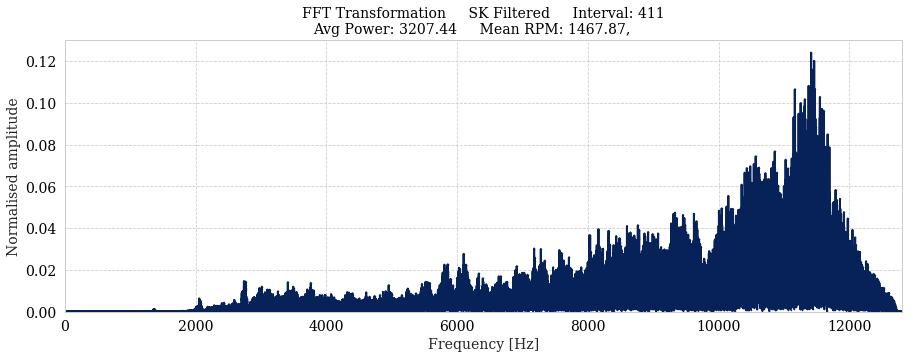

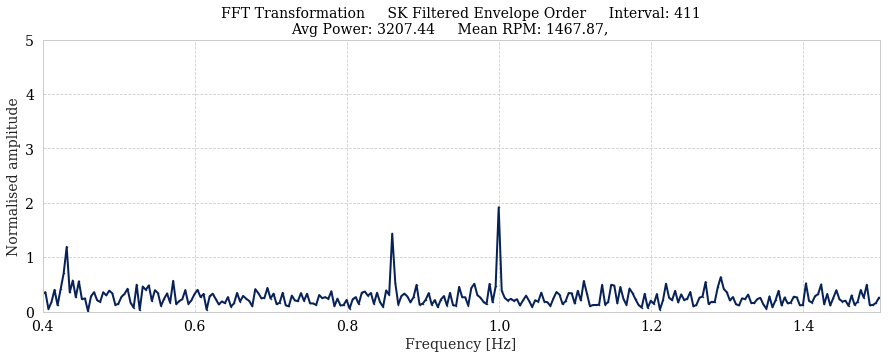

Kurtosis of 411 0.078
Center Frequency: 2500.000
Used Bandwidth in orders: 16.350


In [18]:
interesting_intervals = [1, 102, 199, 301, 411]
bandpassed_signal = bandpassed_2K
cf =2500
ffts = []
fft_times = []

#for i, signal in enumerate(bandpassed_signal):
for i in interesting_intervals:
    if avg_power[i] < 2400:
        continue
    bw = float(concated['Bandwidths'][i])
    if i == 50:
        print('------------------------------------------------\n\n')
        print('               FIRST 50 FINISHED')
        print('\n\n------------------------------------------------')
    if True: #i< 50 or i>370: #bw < 1000 and i<50:# or (i>50 and i<60) or (i > 190 and i < 200)):
        # Plot SK filtered signal
        #plotting_methods.plot_signal(times[i][1:], bandpassed_signal[i],name='SK Filtered', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        plotting_methods.plot_fft(times[i][1:], bandpassed_signal[i], name='SK Filtered', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        
        #Calcutale envelope
        highut_lp = 1000
        rectified = abs(bandpassed_signal[i])**2
        bandpass_filtered_rect_lp = filters.butter_lp_filter(rectified, highut_lp, fs, order=5)
        
        #Plot envelope signal
        one_order = avg_rpm[i]/60
        freq=[one_order]
        #plotting_methods.plot_fft(times[i][1:], bandpass_filtered_rect_lp, x_max=100,frequency_lines=freq,name='SK Filtered Envelope', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        
        #Calculate Envelope Order
        try:
            x_round, resampled_envelope, x_time = resample_signals.do_cubic_resampling(times[i][1:], bandpass_filtered_rect_lp, peak_array[i], number_of_resample_points=2000)
            fft, fft_time = plotting_methods.plot_fft(x_round, resampled_envelope, x_min=0.4, x_max=1.5, y_max=5,frequency_lines=[], name='SK Filtered Envelope Order', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
            ffts.append(normalise_fft(fft))
            fft_times.append(fft_time)
        except: #If resampling fails for some reason
            print('---------------------------------------\n\n')
            print(f'              INTERVAL {i}')
            print('ENVELOPE ORDER COULD NOT BE CALCULATED!\n\n')
            print('---------------------------------------')
        
        # Print key values
        print(f'Kurtosis of {i} {kurtosis(bandpassed_signal[i]):.3f}')
        print(f'Center Frequency: {cf:.3f}')
        print(f'Used Bandwidth in orders: {400*60/avg_rpm[i]:.3f}')


In [14]:
path = wt_folder_path + 'high_pass_2500_.npz'
np.savez(path, fft=ffts, freq=fft_times, intervals=interesting_intervals, dates=dates)


### 5.3 Filter on Center Frequency 6400 Hz and Bandwidth 400 Hz

In [60]:
# Just loop through
bandpassed_6K = []
signal_size = len(filtered_signals)
for i in range(len(filtered_signals)):
    use_signal = filtered_signals[i]
    time = times[i]
    
    cf = 6125
    bw = 75
    low = cf - bw
    high = cf + bw

    if high > 0.5*fs:
        high = 0.5*fs -100    
    
    y = filter_based_on_optimal_bw(low,high,use_signal, time)
    bandpassed_6K.append(y)
    print(f'Filtering {i+1} / {signal_size} signals', end='\r')

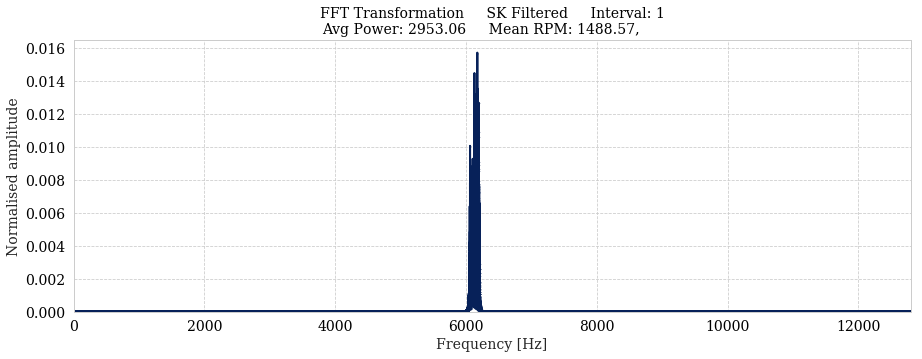

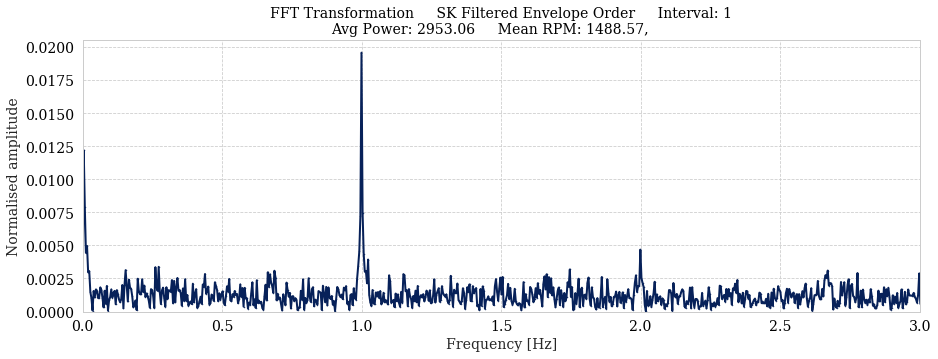

Kurtosis of 1 0.271
Center Frequency: 2500.000
Used Bandwidth in orders: 16.123


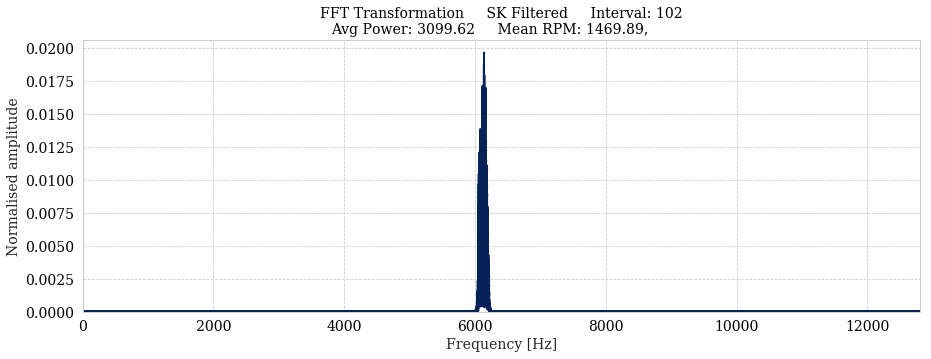

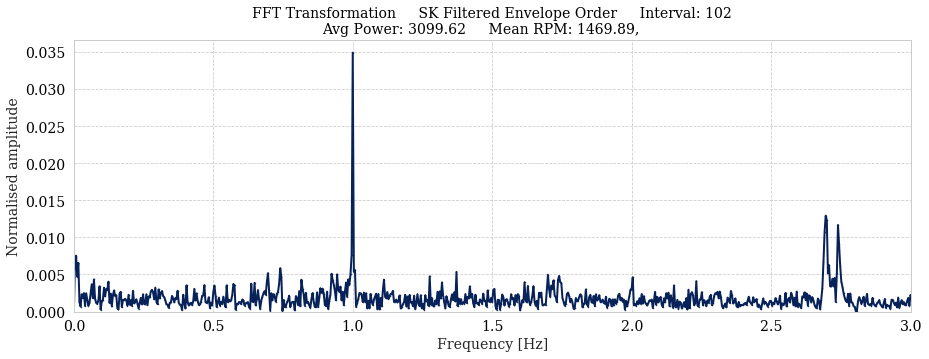

Kurtosis of 102 -0.213
Center Frequency: 2500.000
Used Bandwidth in orders: 16.328


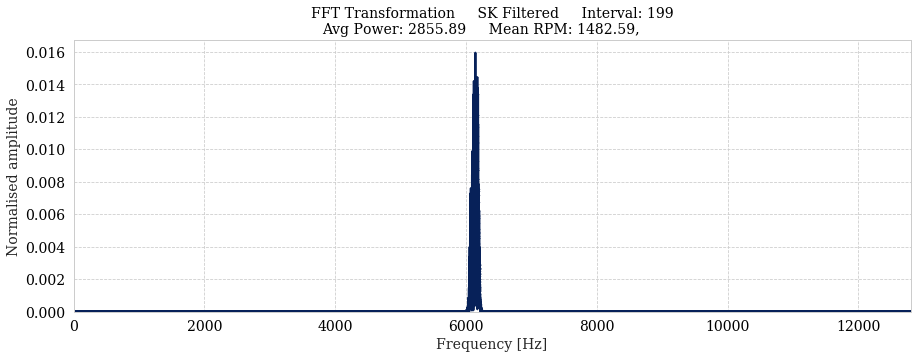

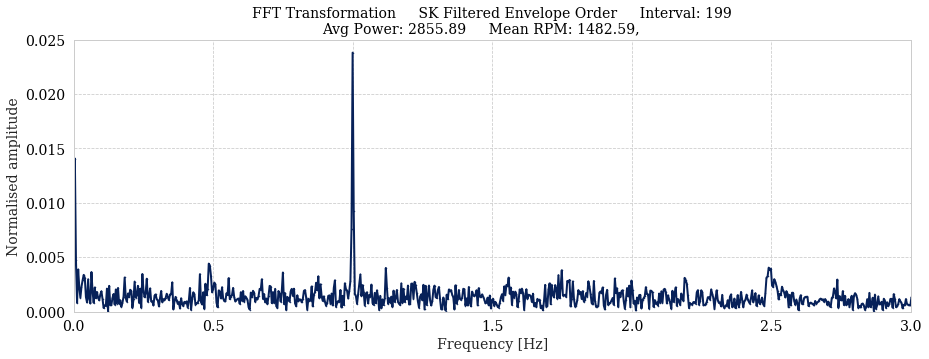

Kurtosis of 199 0.075
Center Frequency: 2500.000
Used Bandwidth in orders: 16.188


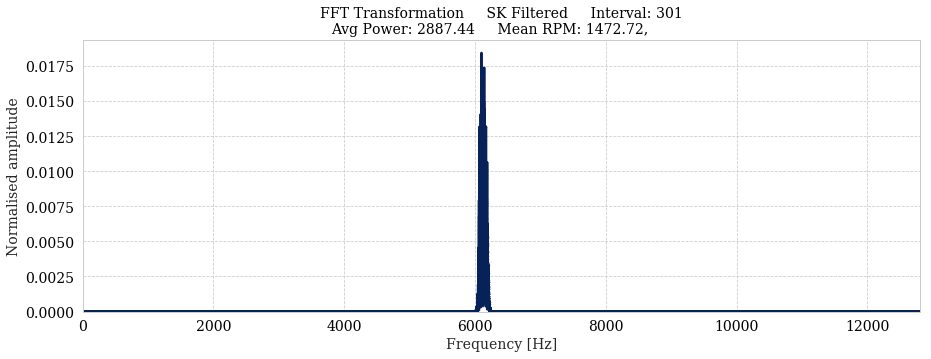

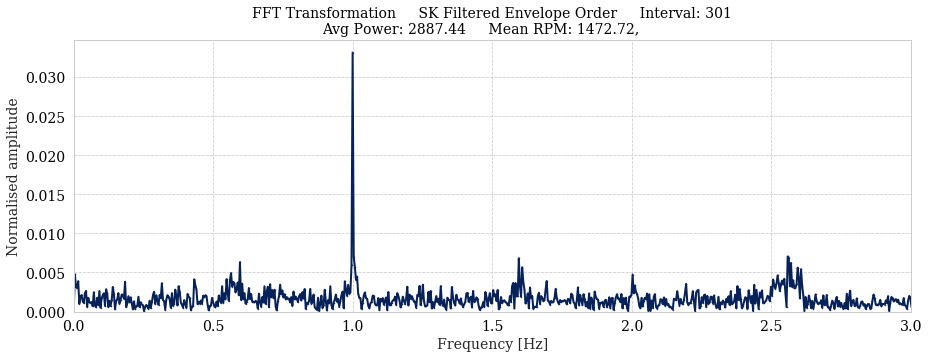

Kurtosis of 301 -0.142
Center Frequency: 2500.000
Used Bandwidth in orders: 16.296


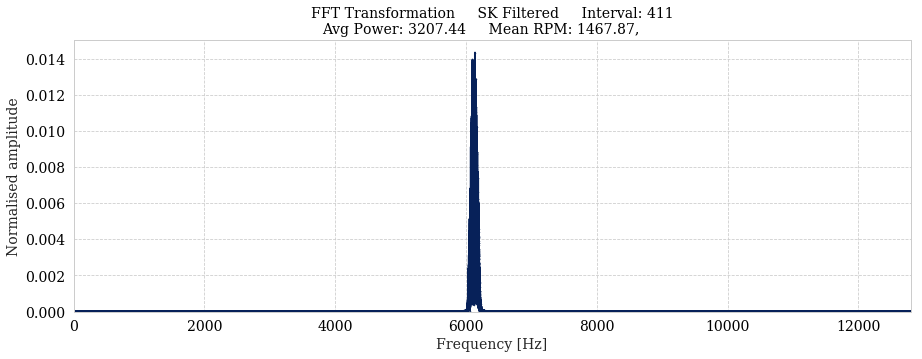

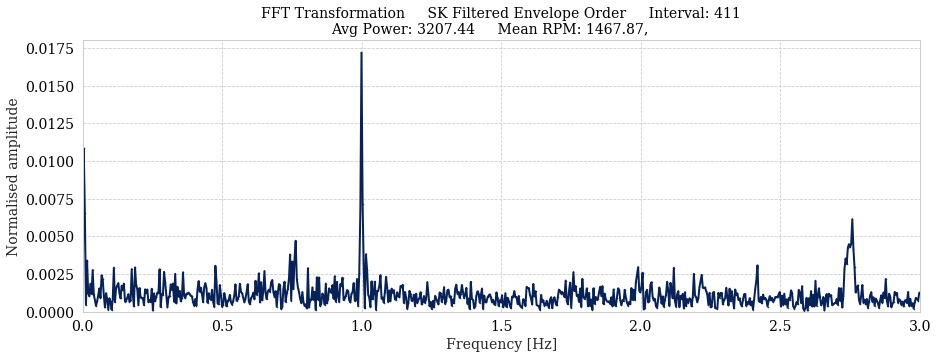

Kurtosis of 411 -0.131
Center Frequency: 2500.000
Used Bandwidth in orders: 16.350


In [61]:
interesting_intervals = [1, 102, 199, 301, 411]
bandpassed_signal = bandpassed_6K
cf =2500
ffts = []
fft_times = []

#for i, signal in enumerate(bandpassed_signal):
for i in interesting_intervals:
    if avg_power[i] < 2400:
        continue
    bw = float(concated['Bandwidths'][i])
    if i == 50:
        print('------------------------------------------------\n\n')
        print('               FIRST 50 FINISHED')
        print('\n\n------------------------------------------------')
    if True: #i< 50 or i>370: #bw < 1000 and i<50:# or (i>50 and i<60) or (i > 190 and i < 200)):
        # Plot SK filtered signal
        #plotting_methods.plot_signal(times[i][1:], bandpassed_signal[i],name='SK Filtered', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        plotting_methods.plot_fft(times[i][1:], bandpassed_signal[i], name='SK Filtered', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        
        #Calcutale envelope
        highut_lp = 1000
        rectified = abs(bandpassed_signal[i])**2
        bandpass_filtered_rect_lp = filters.butter_lp_filter(rectified, highut_lp, fs, order=5)
        
        #Plot envelope signal
        one_order = avg_rpm[i]/60
        freq=[one_order]
        #plotting_methods.plot_fft(times[i][1:], bandpass_filtered_rect_lp, x_max=100,frequency_lines=freq,name='SK Filtered Envelope', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        
        #Calculate Envelope Order
        try:
            x_round, resampled_envelope, x_time = resample_signals.do_cubic_resampling(times[i][1:], bandpass_filtered_rect_lp, peak_array[i], number_of_resample_points=2000)
            fft, fft_time = plotting_methods.plot_fft(x_round, resampled_envelope, x_min=0, x_max=3, y_max=None,frequency_lines=[], name='SK Filtered Envelope Order', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
            ffts.append(normalise_fft(fft))
            fft_times.append(fft_time)
        except: #If resampling fails for some reason
            print('---------------------------------------\n\n')
            print(f'              INTERVAL {i}')
            print('ENVELOPE ORDER COULD NOT BE CALCULATED!\n\n')
            print('---------------------------------------')
        
        # Print key values
        print(f'Kurtosis of {i} {kurtosis(bandpassed_signal[i]):.3f}')
        print(f'Center Frequency: {cf:.3f}')
        print(f'Used Bandwidth in orders: {400*60/avg_rpm[i]:.3f}')


In [39]:
path = wt_folder_path + 'cf_6125_bw_50.npz'
np.savez(path, fft=ffts, freq=fft_times, intervals=interesting_intervals, dates=dates)


### 5.4 Filter on Center Frequency 9 kHz and Bandwidth 6400 Hz

In [31]:
# Just loop through
bandpassed_9K = []
signal_size = len(vib_signals)
for i in range(len(vib_signals)):
    use_signal = vib_signals[i]
    time = times[i]
    
    cf = 9000
    bw = 6400/2
    low = cf - bw
    high = cf + bw

    if high > 0.5*fs:
        high = 0.5*fs -100    
    
    y = filter_based_on_optimal_bw(low,high,use_signal, time)
    bandpassed_9K.append(y)
    print(f'Filtering {i+1} / {signal_size} signals', end='\r')

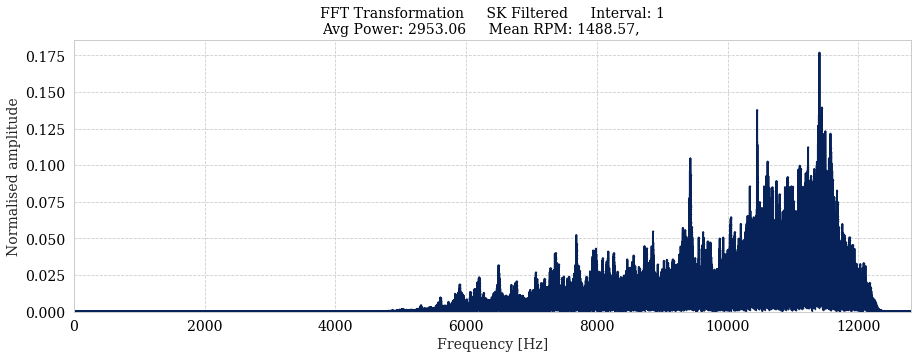

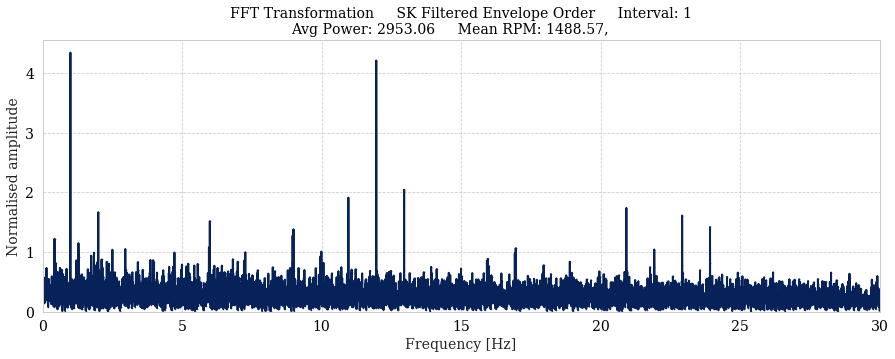

yes
Kurtosis of 1 0.081
Center Frequency: 9000.000
Used Bandwidth in orders: 16.123


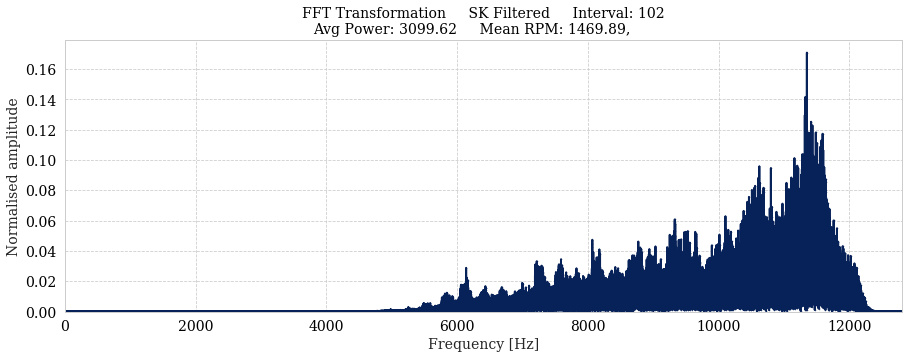

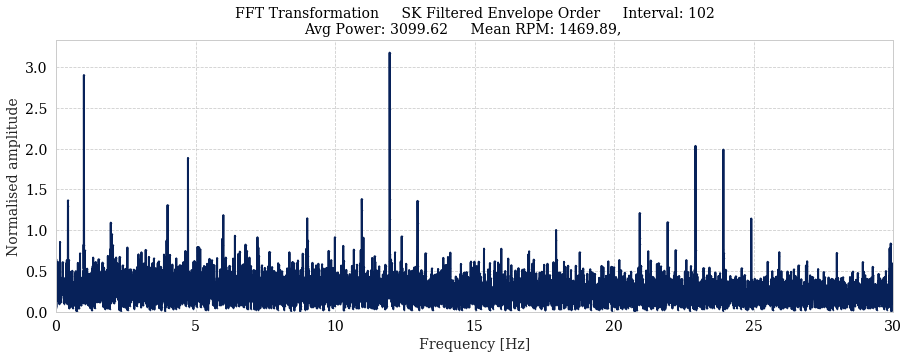

yes
Kurtosis of 102 0.104
Center Frequency: 9000.000
Used Bandwidth in orders: 16.328


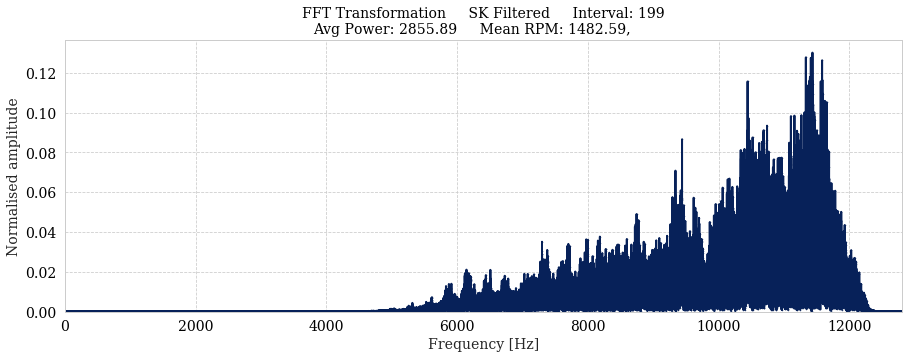

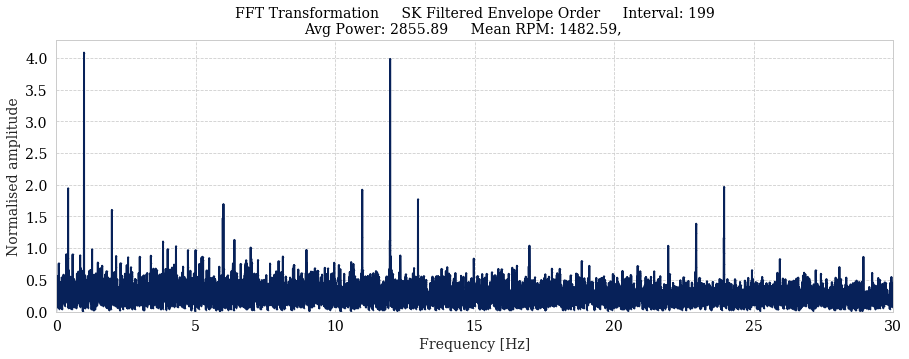

yes
Kurtosis of 199 0.094
Center Frequency: 9000.000
Used Bandwidth in orders: 16.188


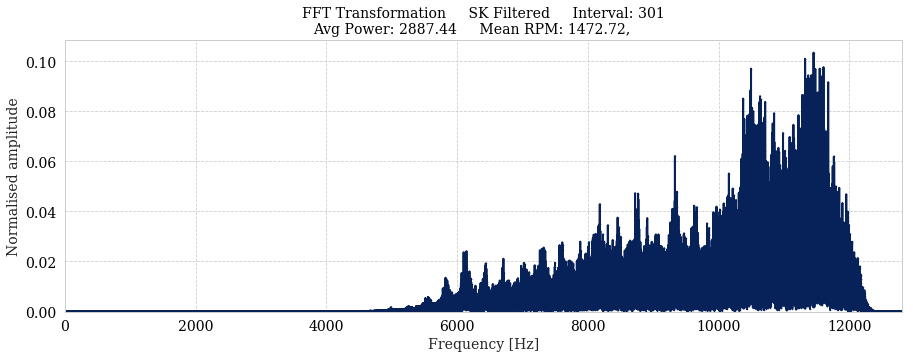

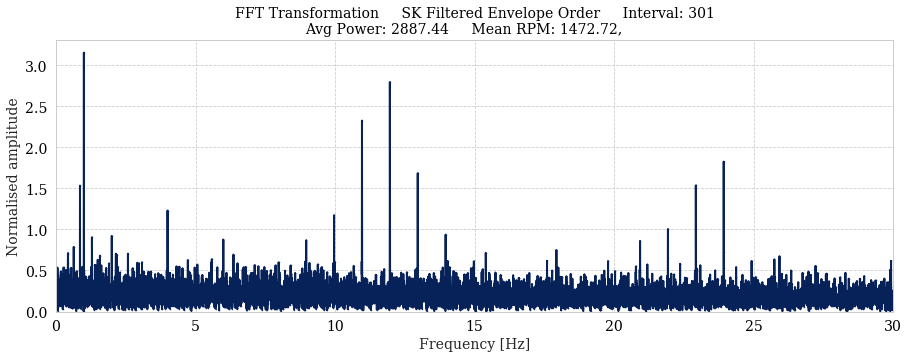

yes
Kurtosis of 301 0.116
Center Frequency: 9000.000
Used Bandwidth in orders: 16.296


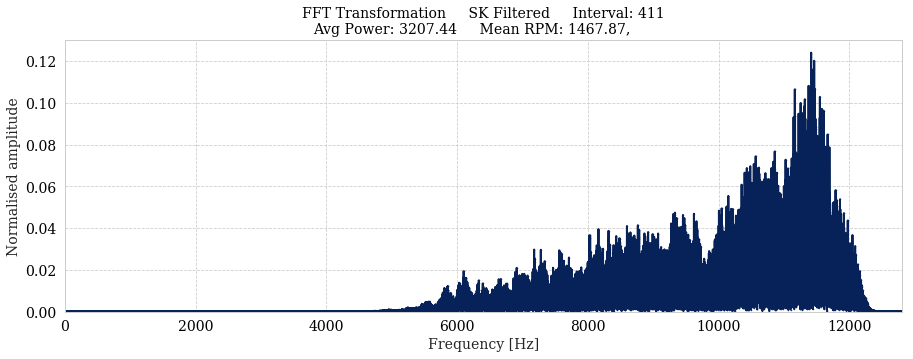

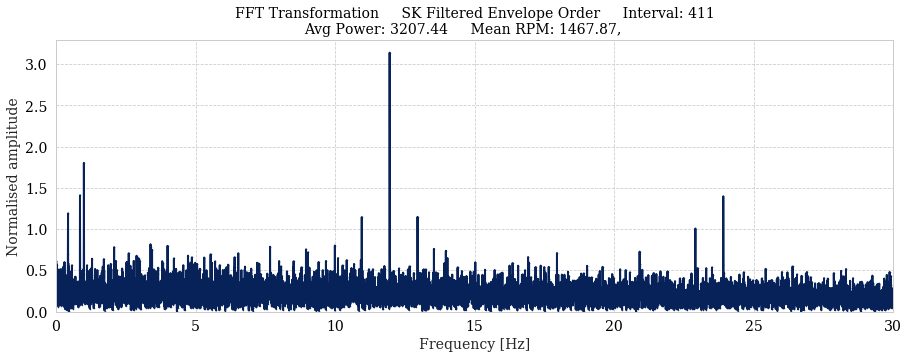

yes
Kurtosis of 411 0.076
Center Frequency: 9000.000
Used Bandwidth in orders: 16.350


In [43]:
interesting_intervals = [1, 102, 199, 301, 411]
bandpassed_signal = bandpassed_9K
cf =9000
ffts = []
fft_times = []

#for i, signal in enumerate(bandpassed_signal):
for i in interesting_intervals:
    if avg_power[i] < 2400:
        continue
    bw = float(concated['Bandwidths'][i])
    if i == 50:
        print('------------------------------------------------\n\n')
        print('               FIRST 50 FINISHED')
        print('\n\n------------------------------------------------')
    if True: #i< 50 or i>370: #bw < 1000 and i<50:# or (i>50 and i<60) or (i > 190 and i < 200)):
        # Plot SK filtered signal
        #plotting_methods.plot_signal(times[i][1:], bandpassed_signal[i],name='SK Filtered', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        plotting_methods.plot_fft(times[i][1:], bandpassed_signal[i], name='SK Filtered', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        
        #Calcutale envelope
        highut_lp = 1000
        rectified = abs(bandpassed_signal[i])**2
        bandpass_filtered_rect_lp = filters.butter_lp_filter(rectified, highut_lp, fs, order=5)
        
        #Plot envelope signal
        one_order = avg_rpm[i]/60
        freq=[one_order]
        #plotting_methods.plot_fft(times[i][1:], bandpass_filtered_rect_lp, x_max=100,frequency_lines=freq,name='SK Filtered Envelope', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        
        #Calculate Envelope Order
        try:
            x_round, resampled_envelope, x_time = resample_signals.do_cubic_resampling(times[i][1:], bandpass_filtered_rect_lp, peak_array[i], number_of_resample_points=2000)
            fft, fft_time = plotting_methods.plot_fft(x_round, resampled_envelope, x_max=30, y_max=None,frequency_lines=[], name='SK Filtered Envelope Order', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
            ffts.append(normalise_fft(fft))
            fft_times.append(fft_time)
            print('yes')
        except: #If resampling fails for some reason
            print('---------------------------------------\n\n')
            print(f'              INTERVAL {i}')
            print('ENVELOPE ORDER COULD NOT BE CALCULATED!\n\n')
            print('---------------------------------------')
        
        # Print key values
        print(f'Kurtosis of {i} {kurtosis(bandpassed_signal[i]):.3f}')
        print(f'Center Frequency: {cf:.3f}')
        print(f'Used Bandwidth in orders: {400*60/avg_rpm[i]:.3f}')


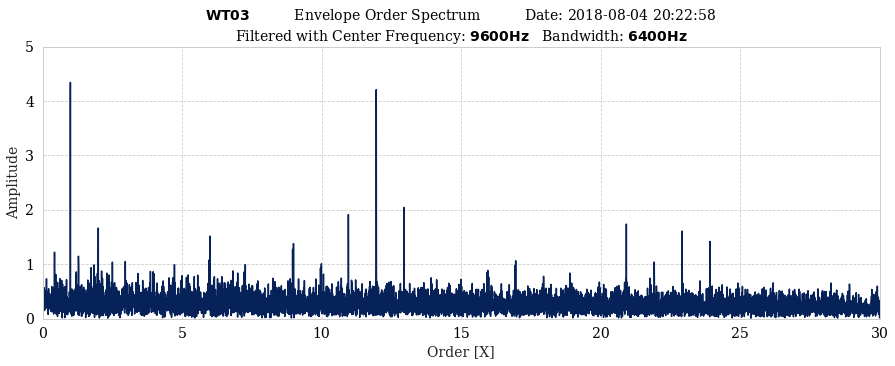

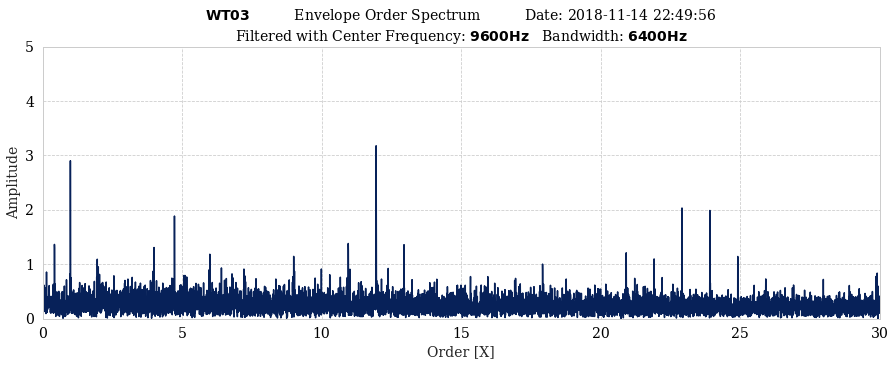

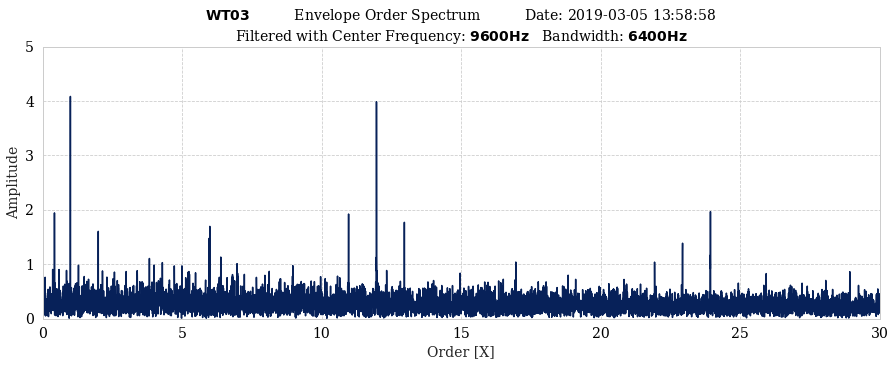

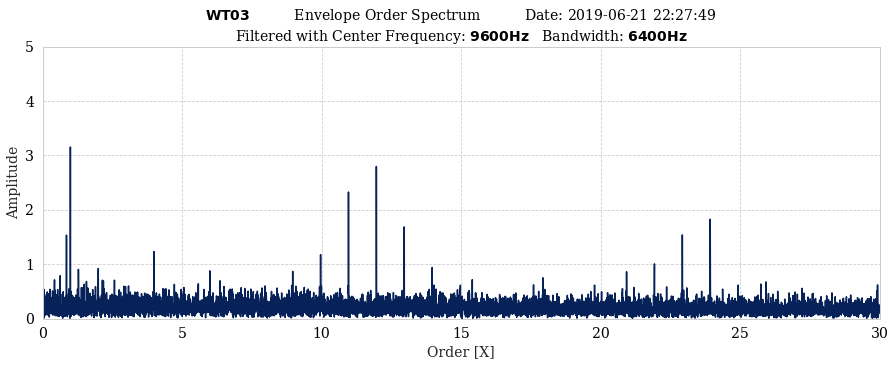

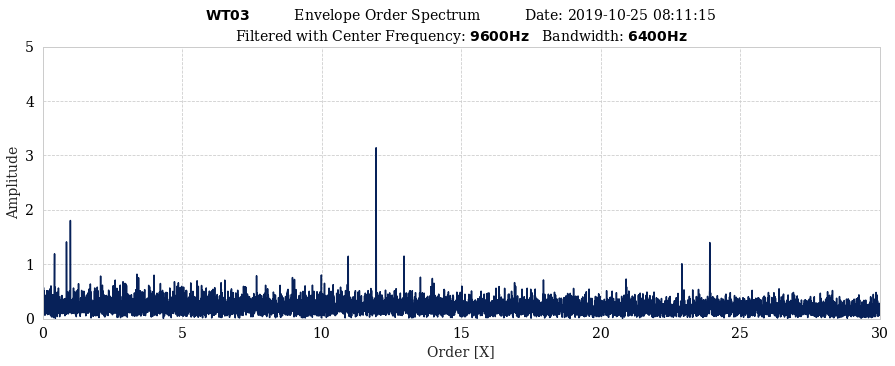

In [97]:
save_path = '../../plots/envelope_order_higher_freq/'
for i,interval in enumerate(interesting_intervals):
    plt.figure(figsize=(15,5))
    plt.plot(fft_times[i], ffts[i])
    plt.xlim(0, 30)
    plt.ylim(0,5)
    heading = r"$\bf{WT03}$" + f'          Envelope Order Spectrum          Date: {dates.values[interesting_intervals[i]][0]}'
    heading += f'\nFiltered with Center Frequency: ' + r"$\bf{9600Hz}$" + '   Bandwidth: ' + r"$\bf{6400Hz}$"
    plt.title(heading)
    plt.ylabel('Amplitude')
    plt.xlabel('Order [X]')
    #plt.axvline(12, c='r', linewidth=0.7)
    #plt.axvline(24, c='r', linewidth=0.7)
    #plt.axvline(11, c='c', linewidth=0.7)
    #plt.axvline(22, c='c', linewidth=0.7)
    plt.margins(0)
    plt.savefig(f'{save_path}wt03_high_freq_{interval}.png', dpi=300)
    plt.show()

In [98]:
path = wt_folder_path + 'freq_.npz'
np.savez(path, fft=ffts, freq=fft_times, intervals=interesting_intervals, dates=dates)


### 5.5 Filter on Center Frequency 12 kHz and Bandwidth 400 Hz 


In [102]:
# Just loop through
bandpassed_12K = []
signal_size = len(filtered_signals)
for i in range(len(filtered_signals)):
    use_signal = filtered_signals[i]
    time = times[i]
    
    cf = 12000
    bw = 200
    low = cf - bw
    high = cf + bw

    if high > 0.5*fs:
        high = 0.5*fs -100    
    
    y = filter_based_on_optimal_bw(low,high,use_signal, time)
    bandpassed_12K.append(y)
    print(f'Filtering {i+1} / {signal_size} signals', end='\r')

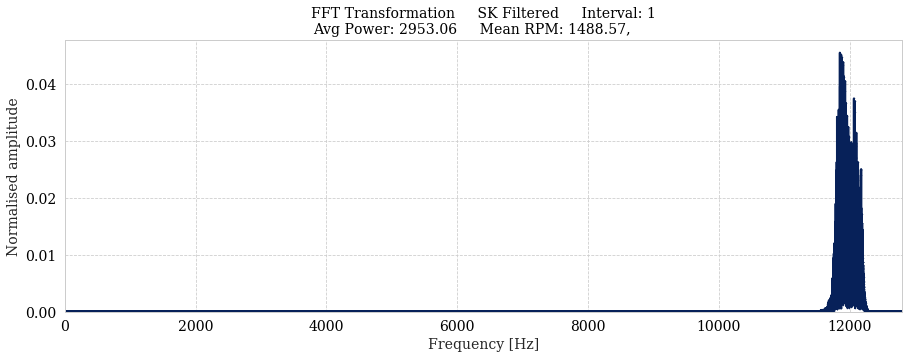

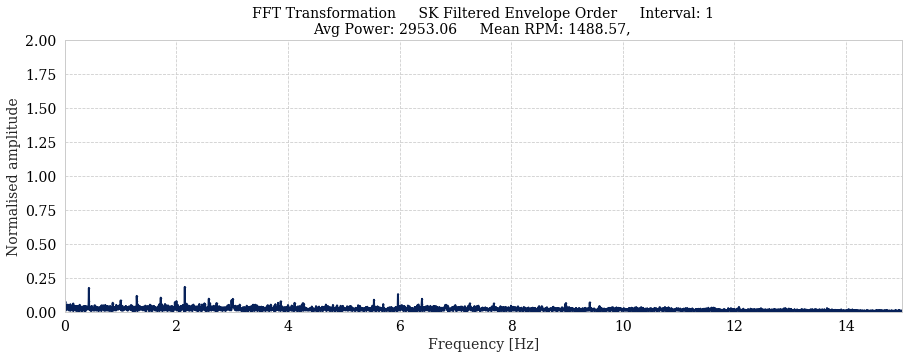

Kurtosis of 1 0.127
Center Frequency: 12000.000
Used Bandwidth in orders: 16.123


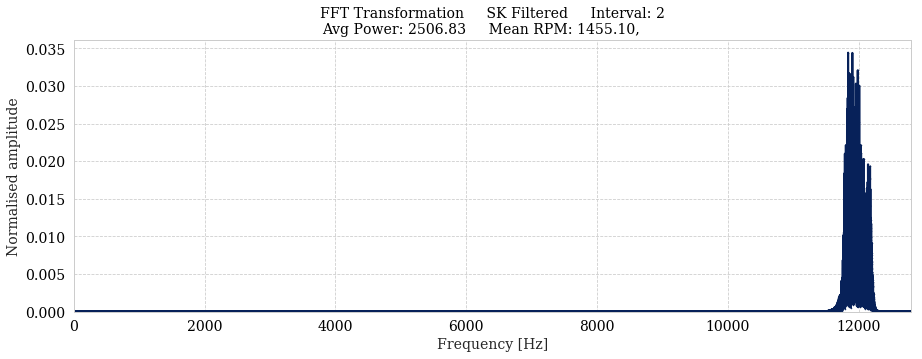

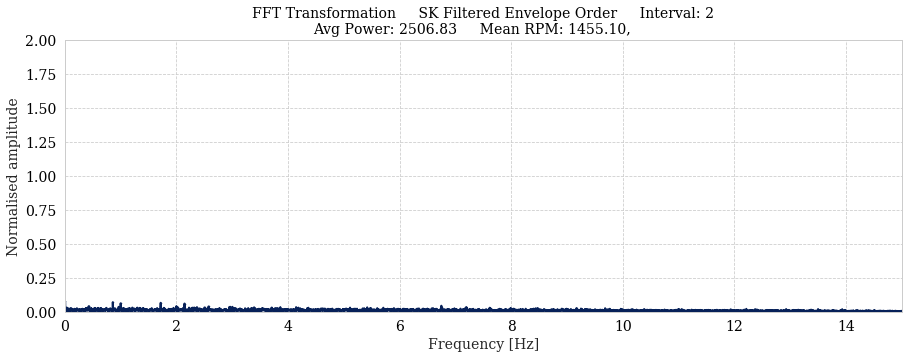

Kurtosis of 2 0.040
Center Frequency: 12000.000
Used Bandwidth in orders: 16.494


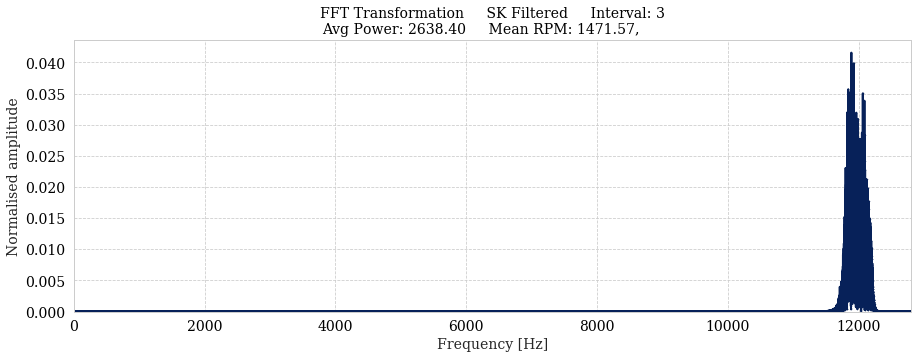

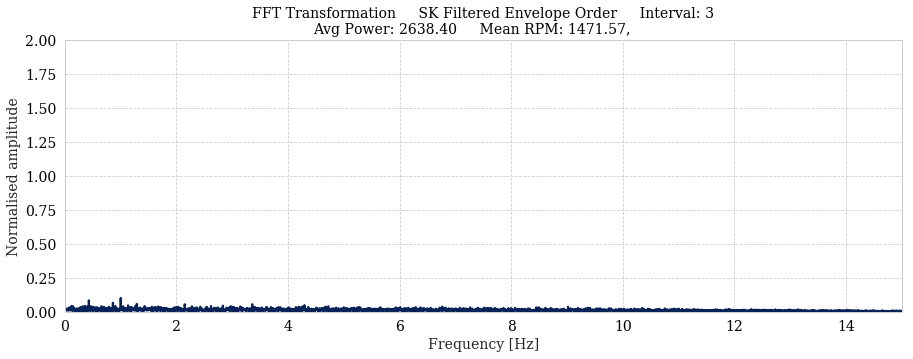

Kurtosis of 3 0.000
Center Frequency: 12000.000
Used Bandwidth in orders: 16.309


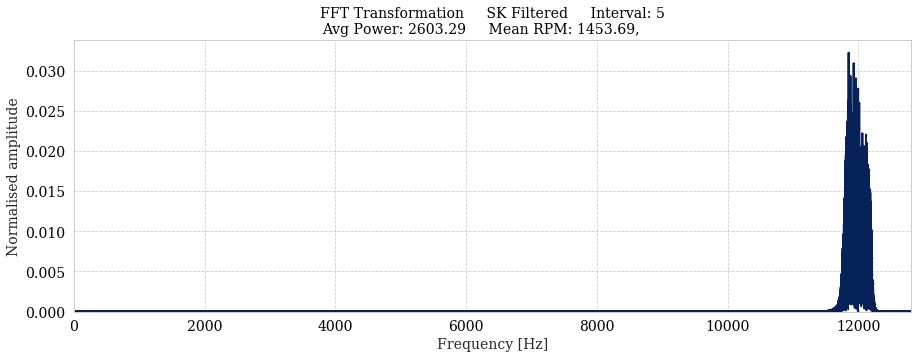

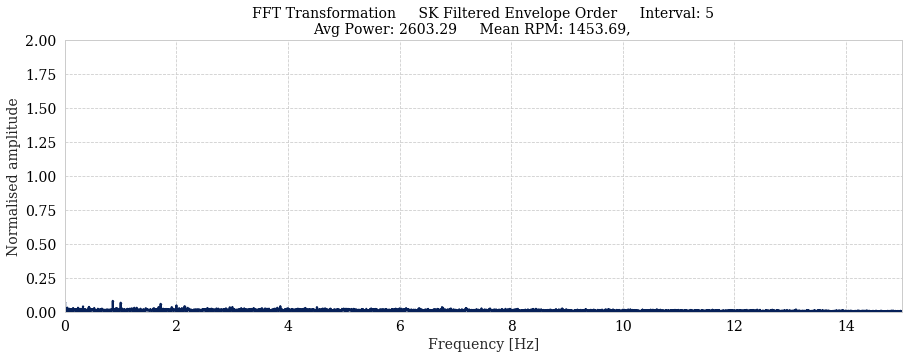

Kurtosis of 5 0.097
Center Frequency: 12000.000
Used Bandwidth in orders: 16.510


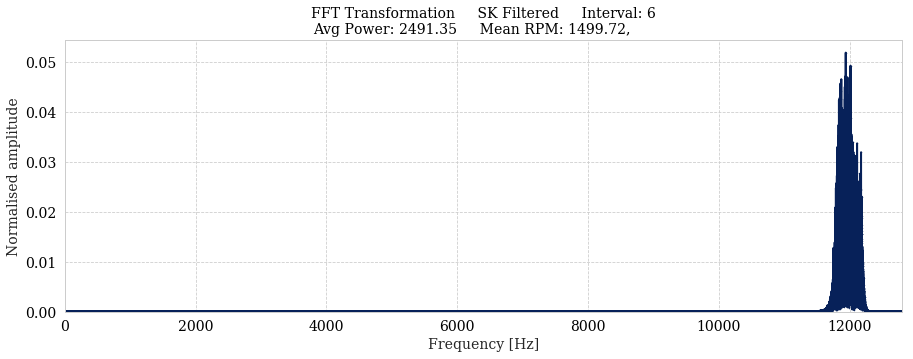

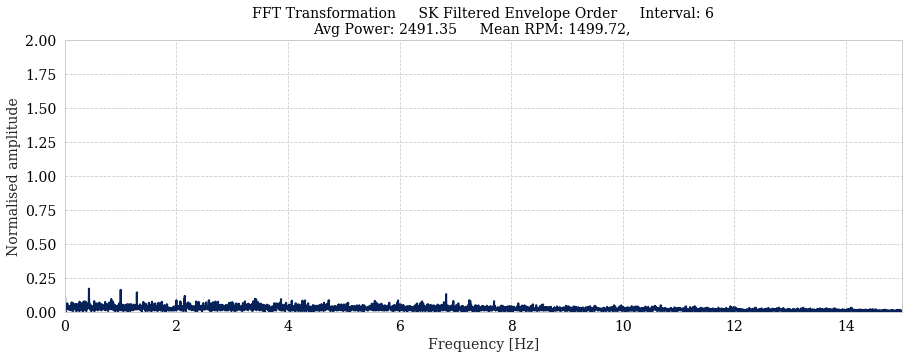

Kurtosis of 6 0.150
Center Frequency: 12000.000
Used Bandwidth in orders: 16.003


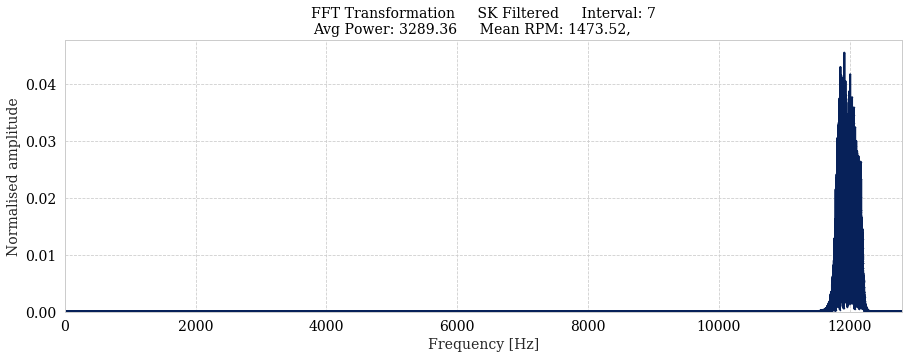

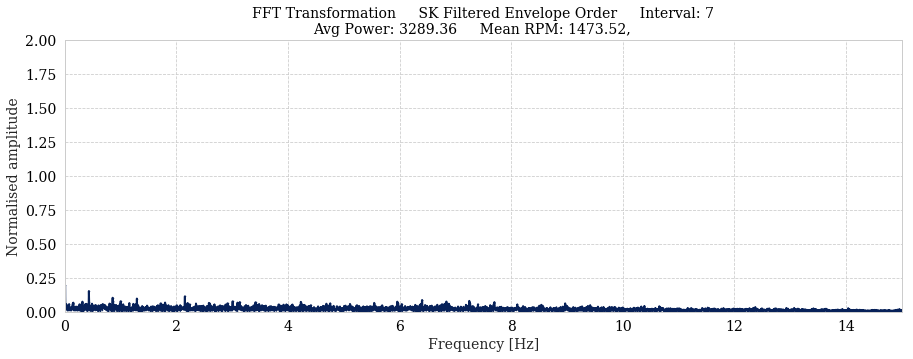

Kurtosis of 7 0.182
Center Frequency: 12000.000
Used Bandwidth in orders: 16.287


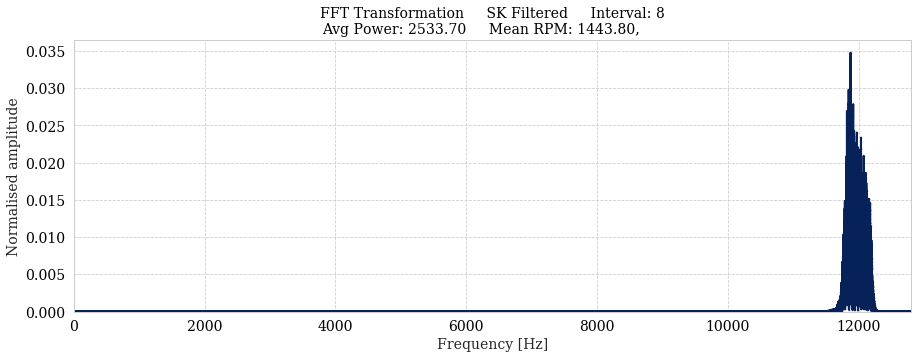

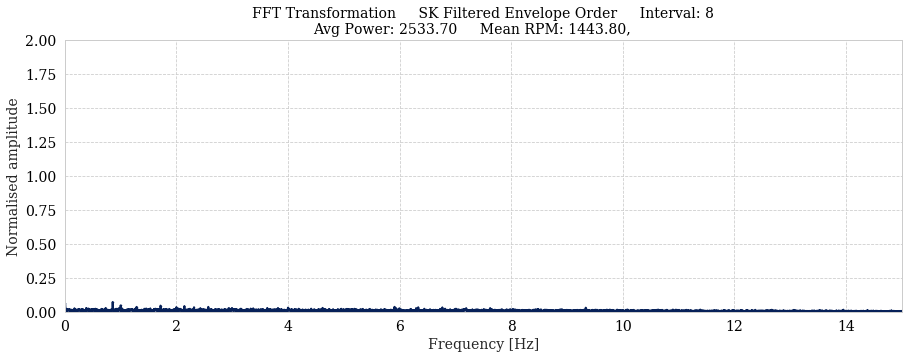

Kurtosis of 8 0.096
Center Frequency: 12000.000
Used Bandwidth in orders: 16.623


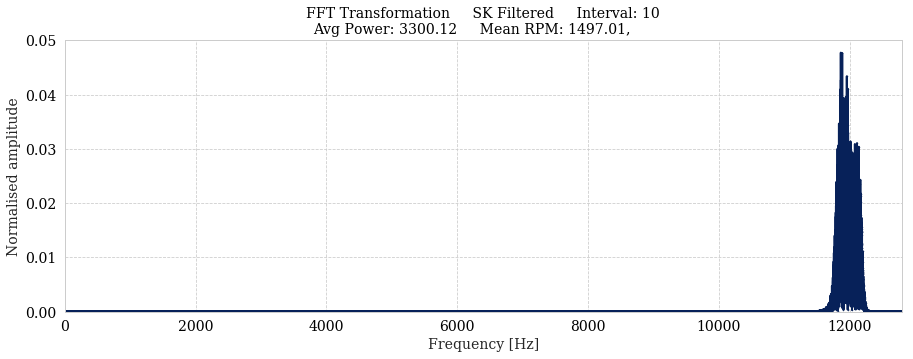

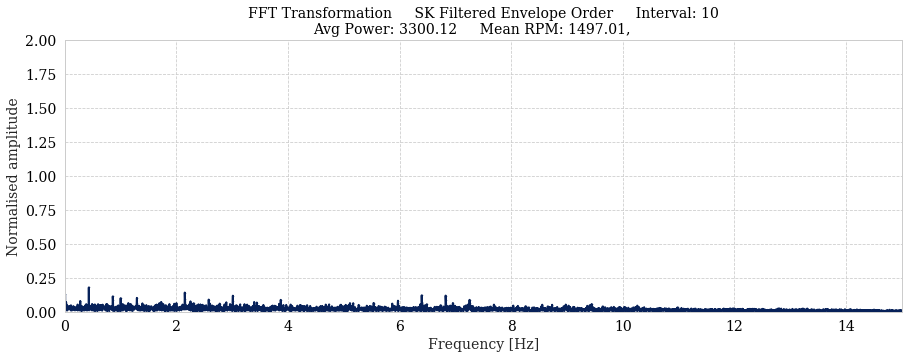

Kurtosis of 10 0.195
Center Frequency: 12000.000
Used Bandwidth in orders: 16.032


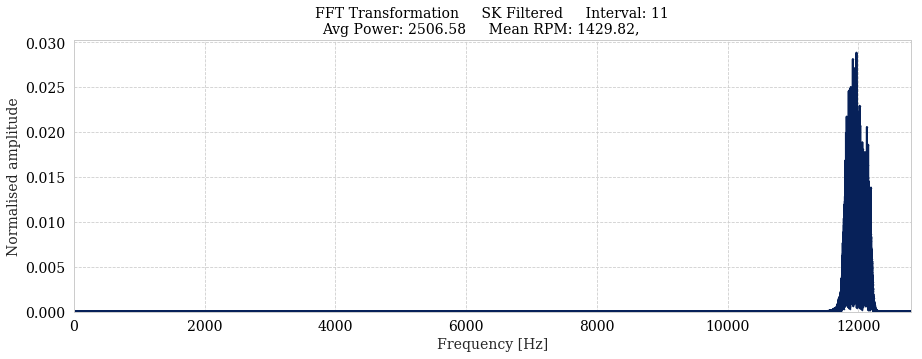

---------------------------------------


              INTERVAL 11
ENVELOPE ORDER COULD NOT BE CALCULATED!


---------------------------------------
Kurtosis of 11 0.046
Center Frequency: 12000.000
Used Bandwidth in orders: 16.785


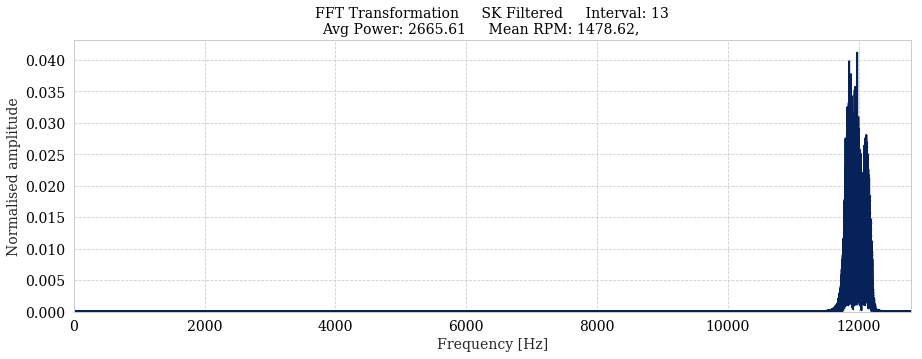

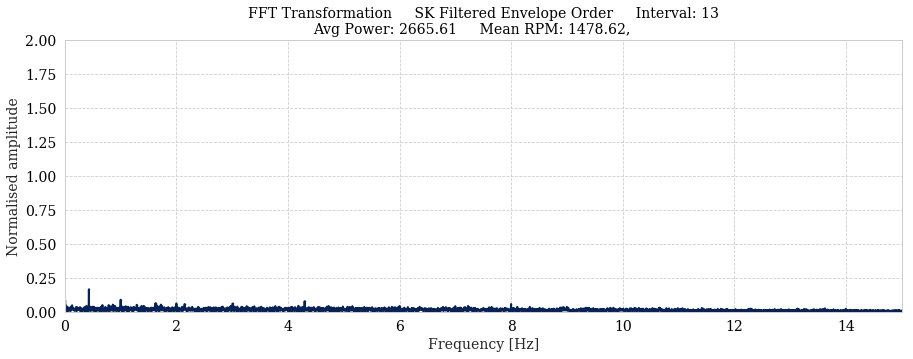

Kurtosis of 13 0.056
Center Frequency: 12000.000
Used Bandwidth in orders: 16.231


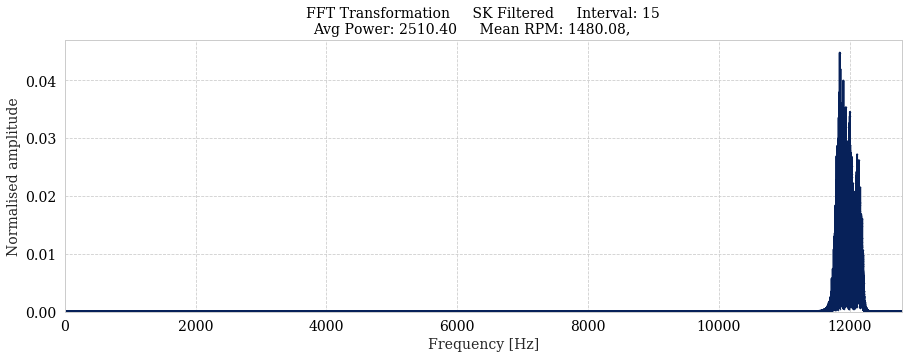

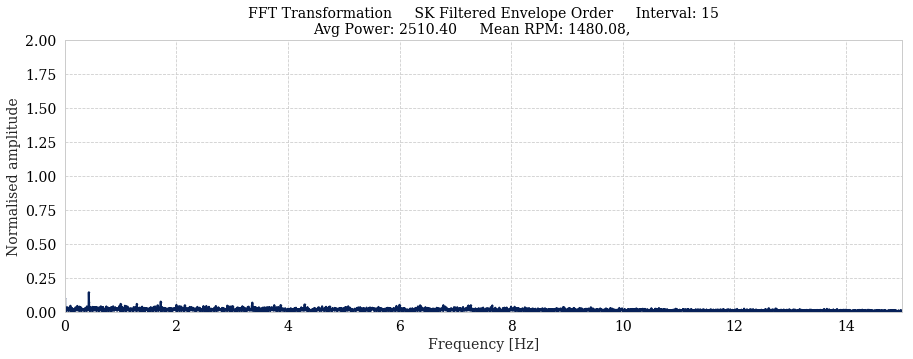

Kurtosis of 15 0.069
Center Frequency: 12000.000
Used Bandwidth in orders: 16.215


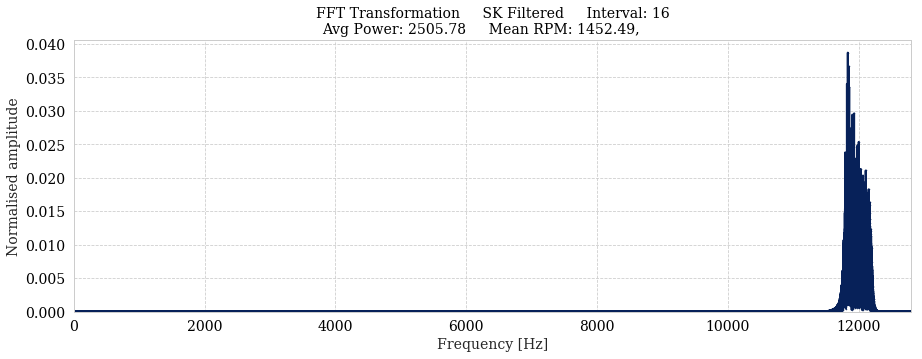

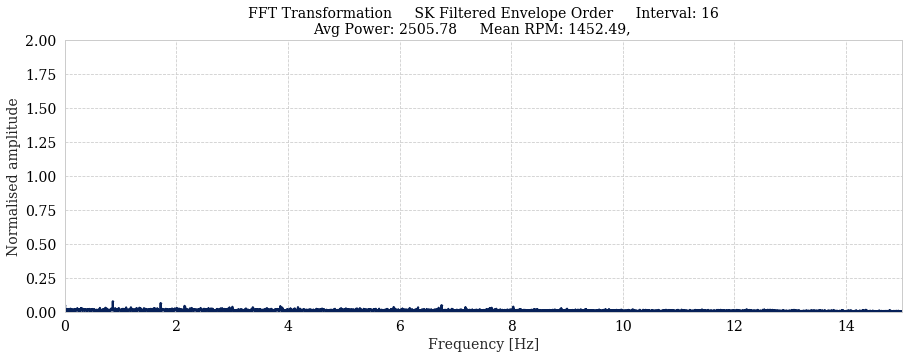

Kurtosis of 16 0.058
Center Frequency: 12000.000
Used Bandwidth in orders: 16.523


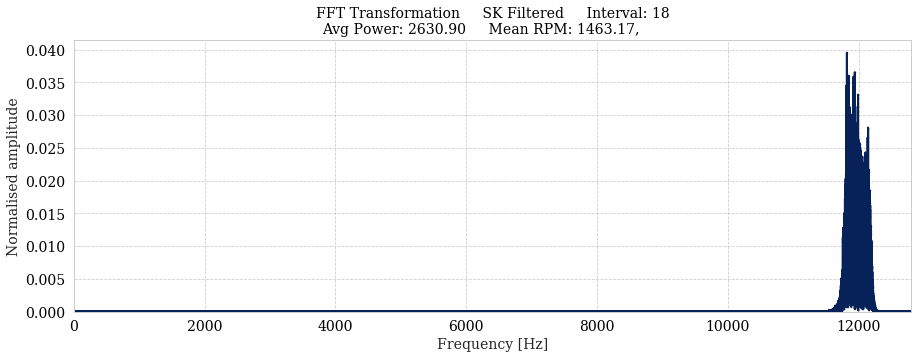

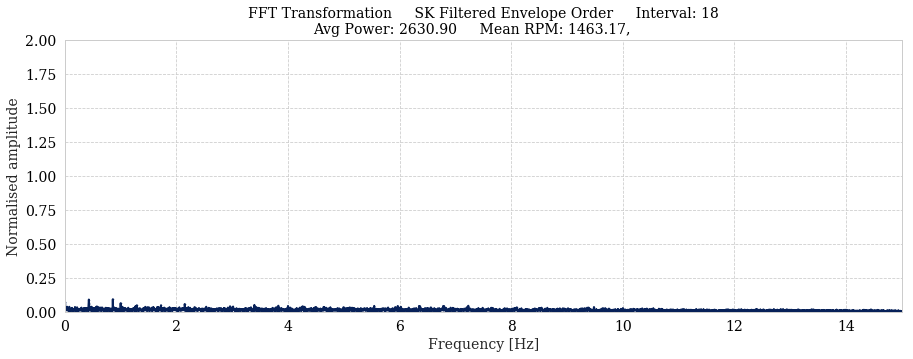

Kurtosis of 18 0.097
Center Frequency: 12000.000
Used Bandwidth in orders: 16.403


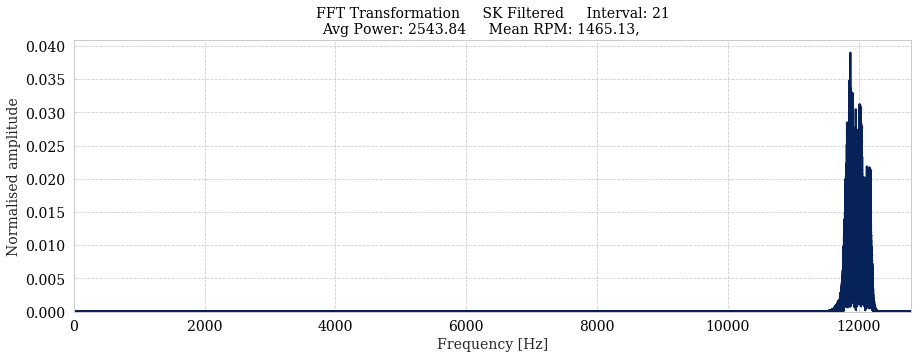

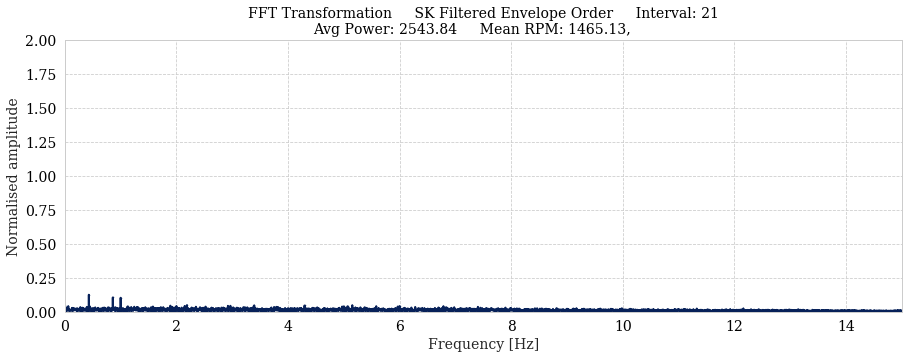

Kurtosis of 21 0.090
Center Frequency: 12000.000
Used Bandwidth in orders: 16.381


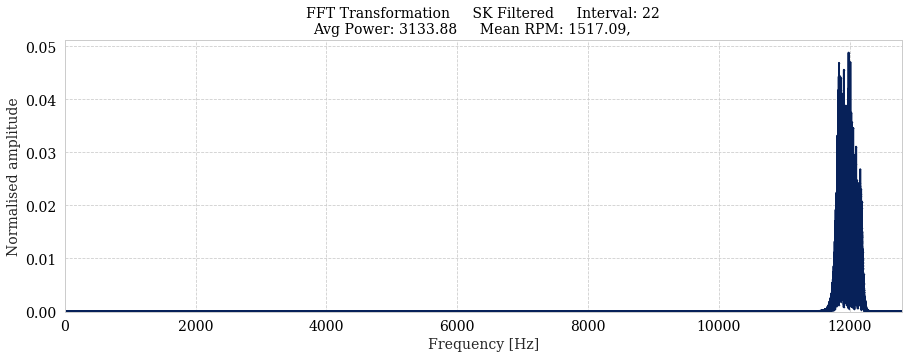

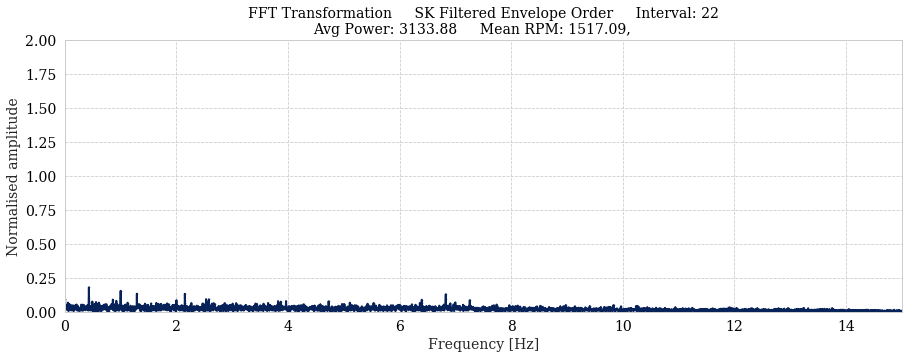

Kurtosis of 22 0.117
Center Frequency: 12000.000
Used Bandwidth in orders: 15.820


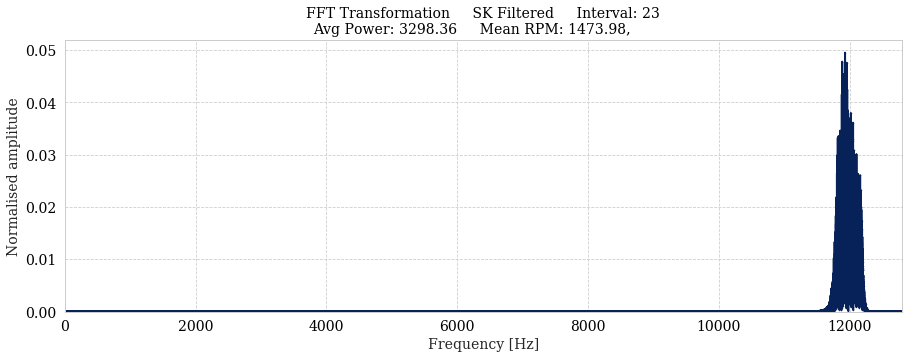

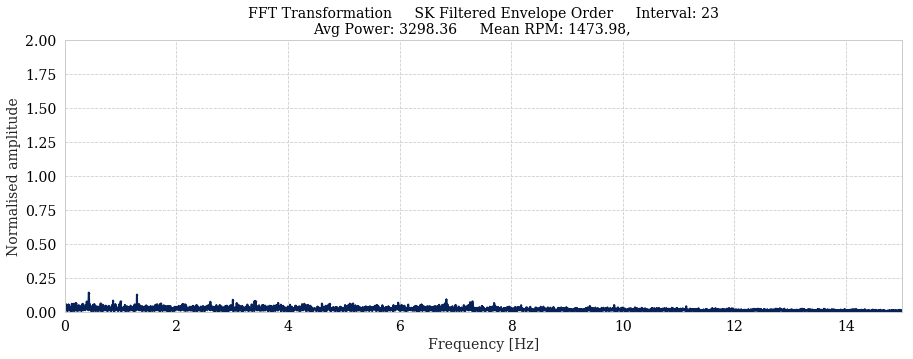

Kurtosis of 23 0.078
Center Frequency: 12000.000
Used Bandwidth in orders: 16.282


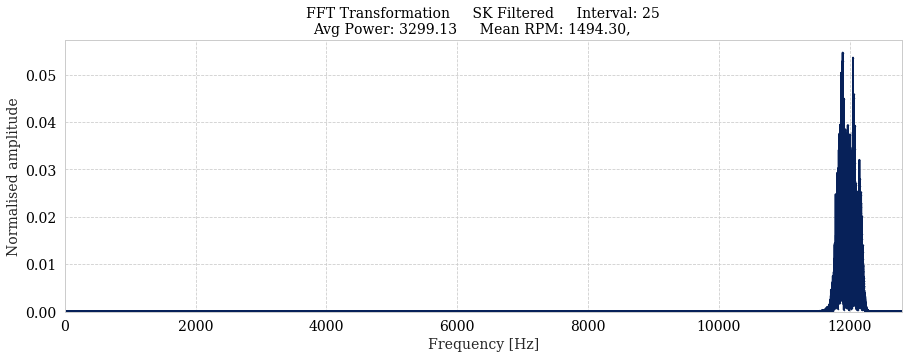

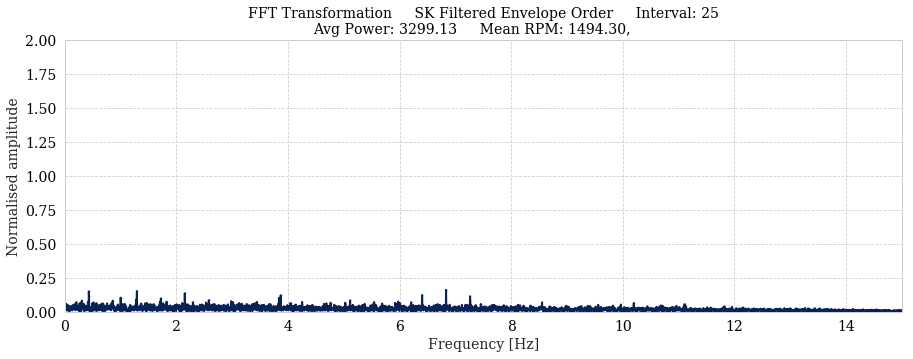

Kurtosis of 25 0.051
Center Frequency: 12000.000
Used Bandwidth in orders: 16.061


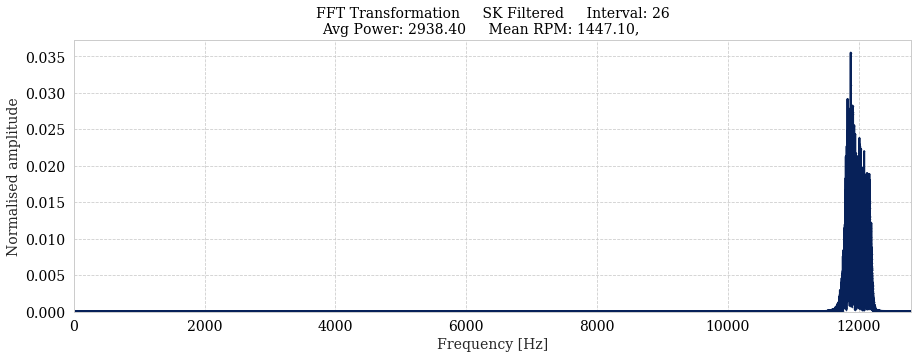

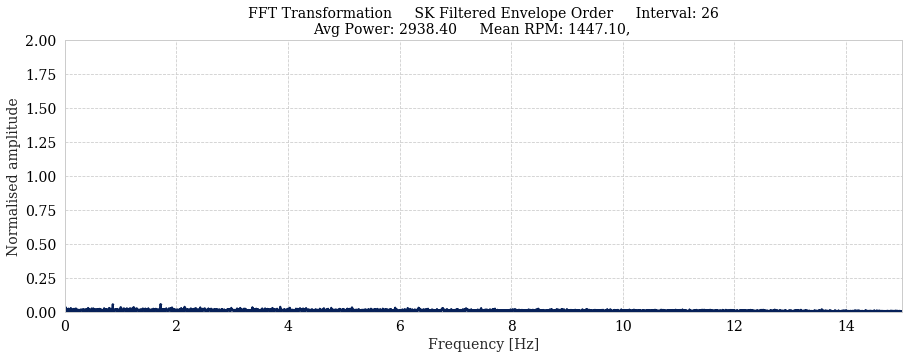

Kurtosis of 26 0.039
Center Frequency: 12000.000
Used Bandwidth in orders: 16.585


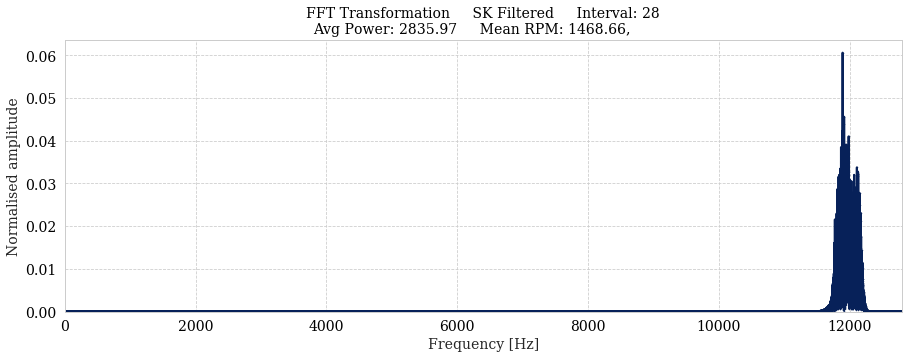

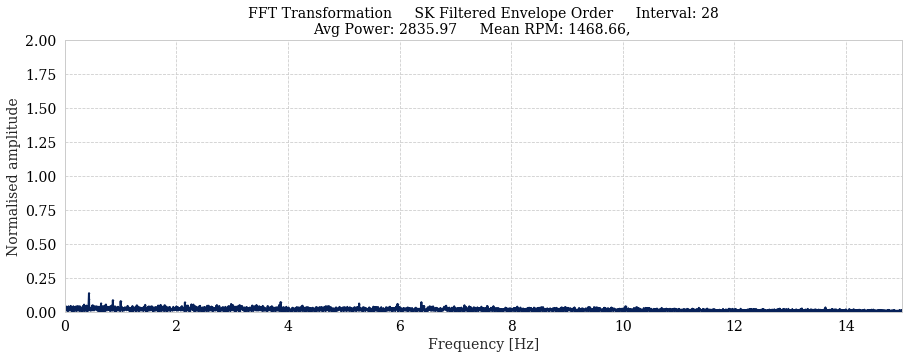

Kurtosis of 28 -0.014
Center Frequency: 12000.000
Used Bandwidth in orders: 16.341


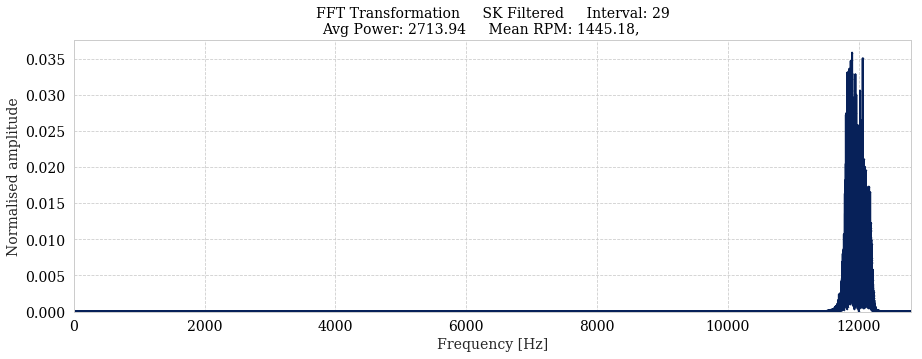

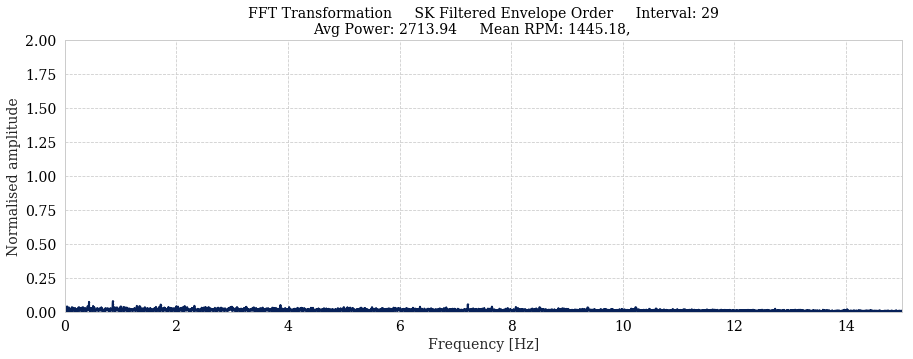

Kurtosis of 29 -0.014
Center Frequency: 12000.000
Used Bandwidth in orders: 16.607


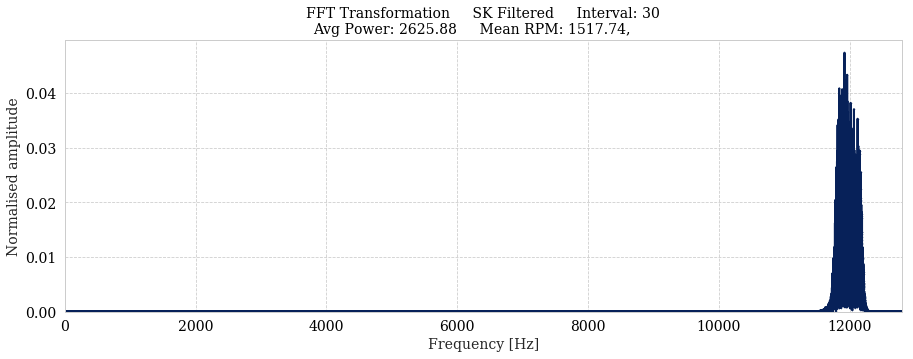

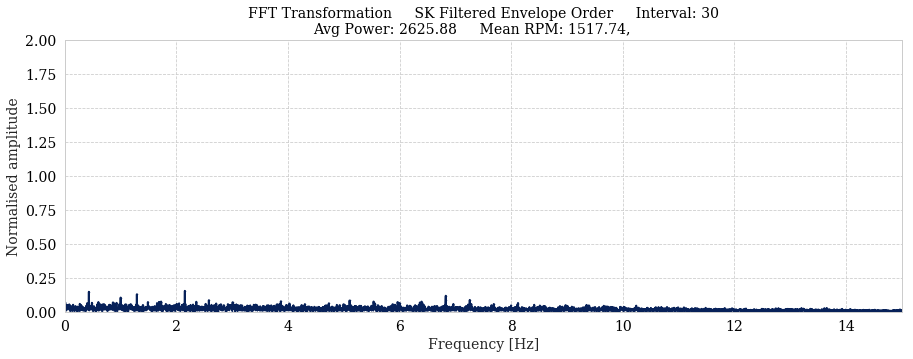

Kurtosis of 30 0.100
Center Frequency: 12000.000
Used Bandwidth in orders: 15.813


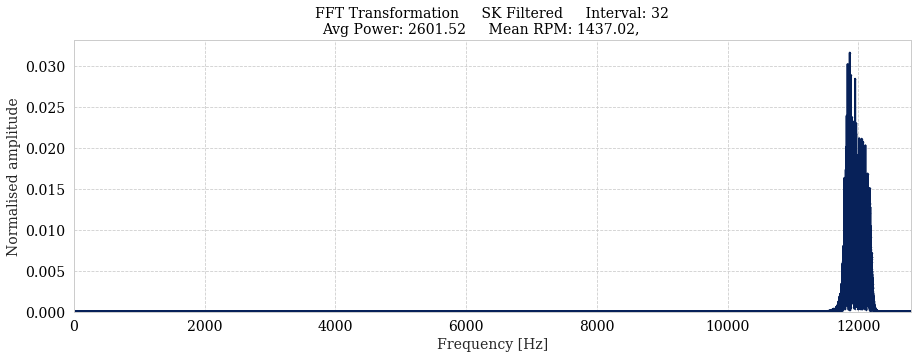

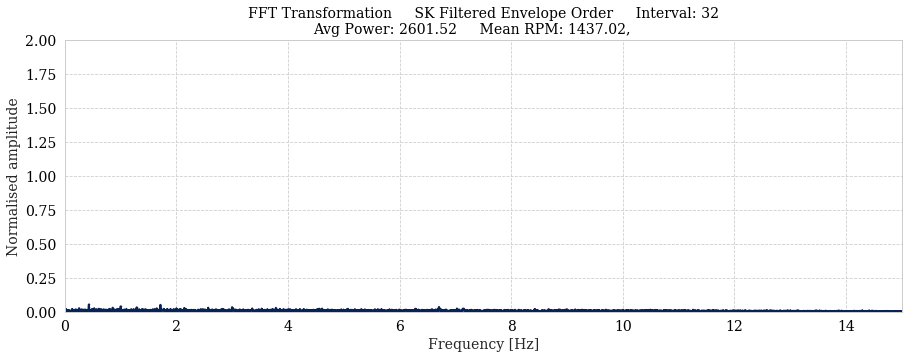

Kurtosis of 32 0.161
Center Frequency: 12000.000
Used Bandwidth in orders: 16.701


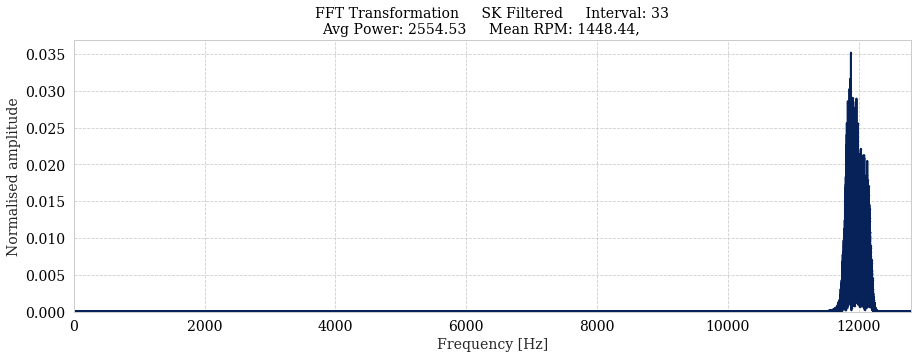

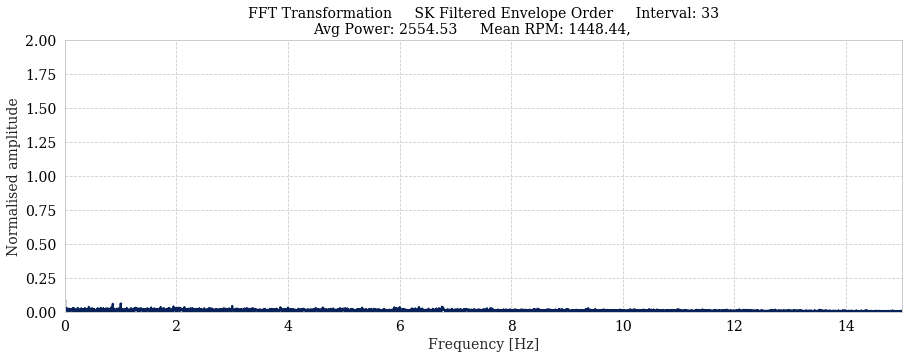

Kurtosis of 33 0.139
Center Frequency: 12000.000
Used Bandwidth in orders: 16.569


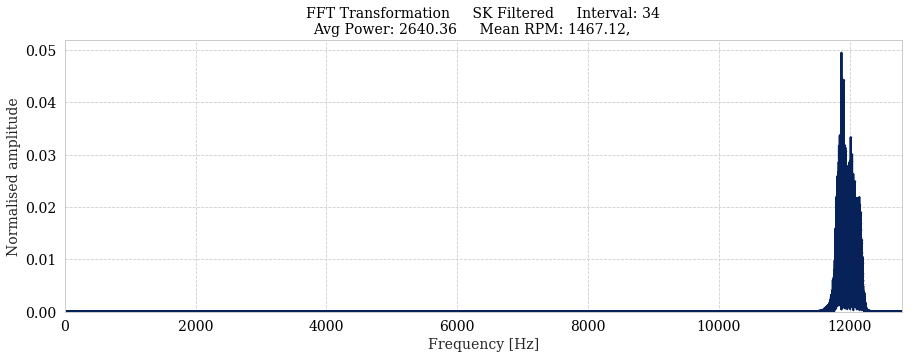

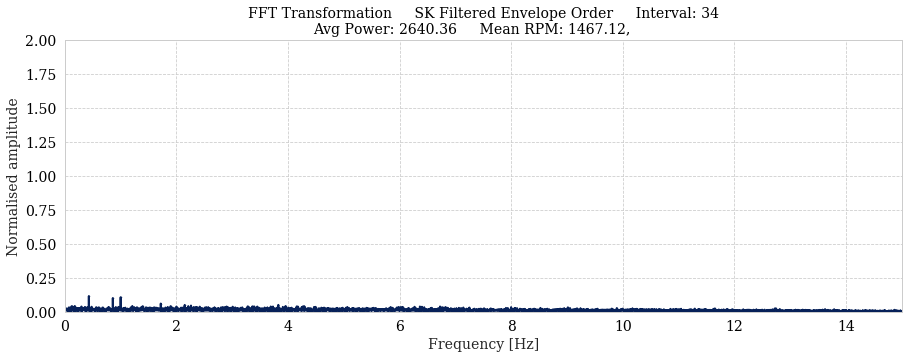

Kurtosis of 34 0.024
Center Frequency: 12000.000
Used Bandwidth in orders: 16.359


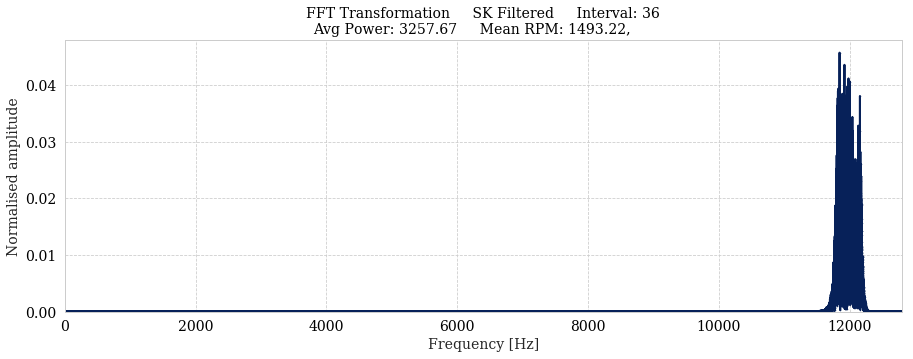

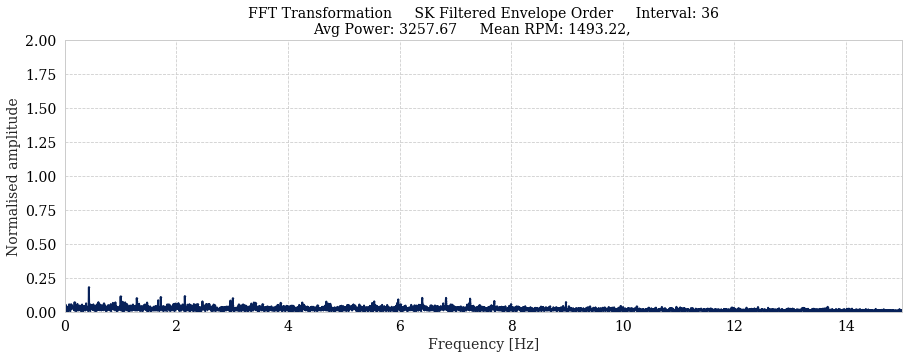

Kurtosis of 36 0.179
Center Frequency: 12000.000
Used Bandwidth in orders: 16.073


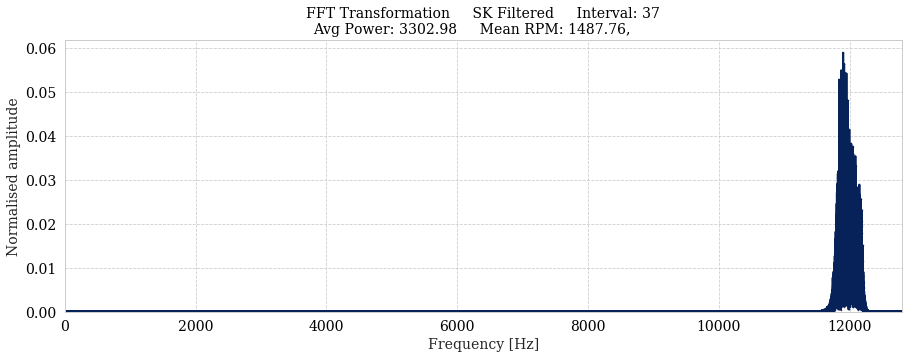

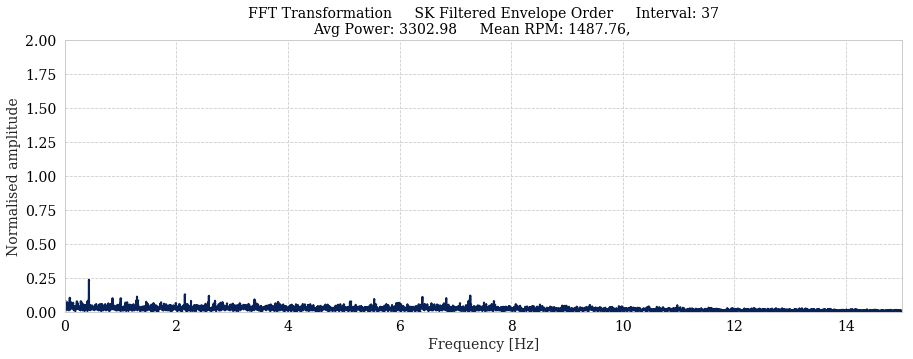

Kurtosis of 37 0.035
Center Frequency: 12000.000
Used Bandwidth in orders: 16.132


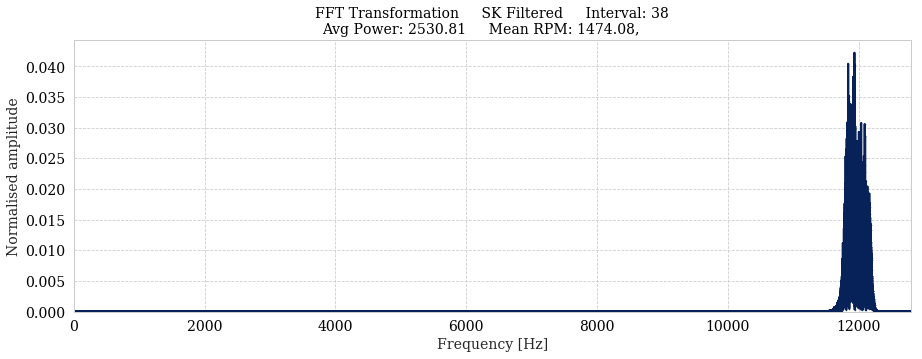

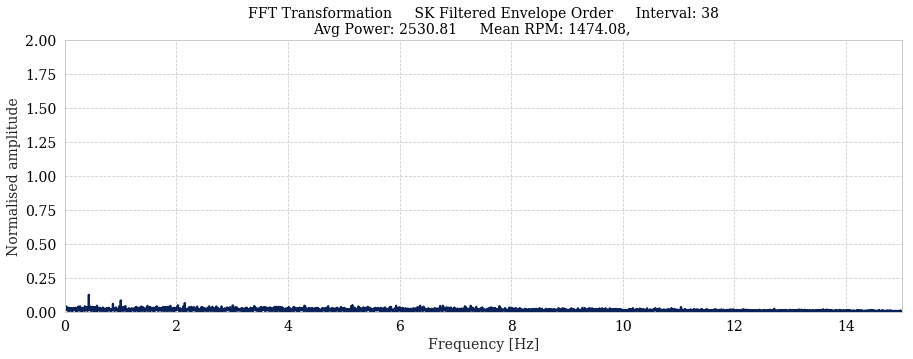

Kurtosis of 38 0.078
Center Frequency: 12000.000
Used Bandwidth in orders: 16.281


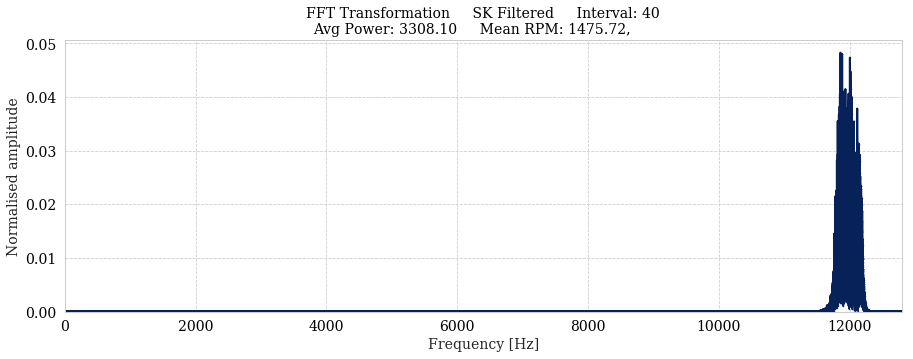

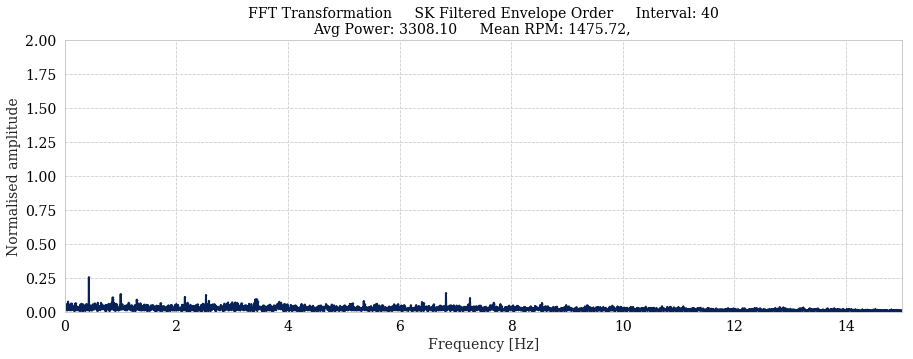

Kurtosis of 40 0.088
Center Frequency: 12000.000
Used Bandwidth in orders: 16.263


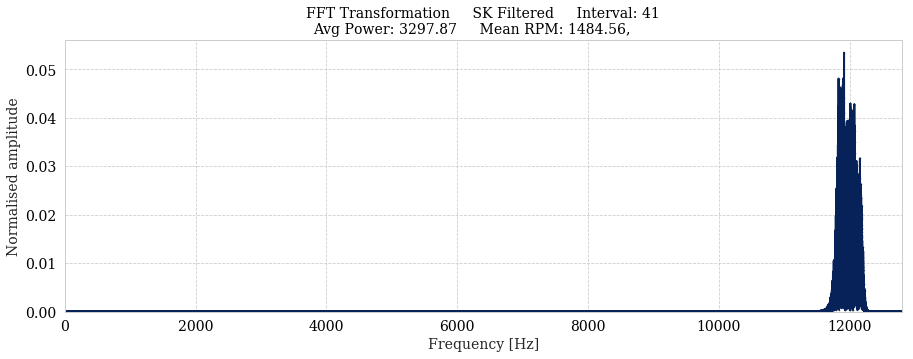

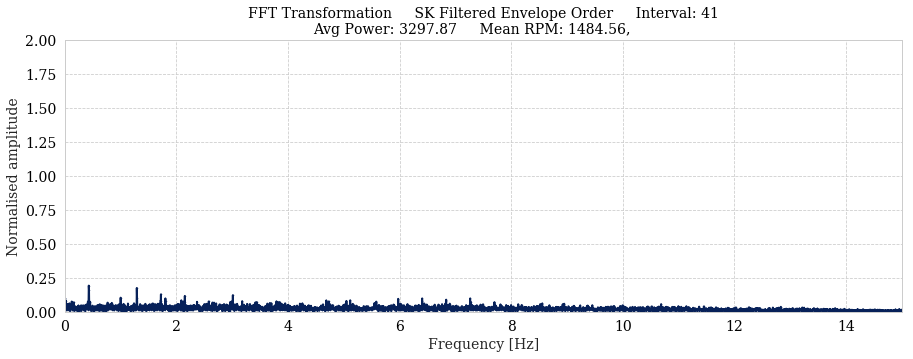

Kurtosis of 41 0.012
Center Frequency: 12000.000
Used Bandwidth in orders: 16.166


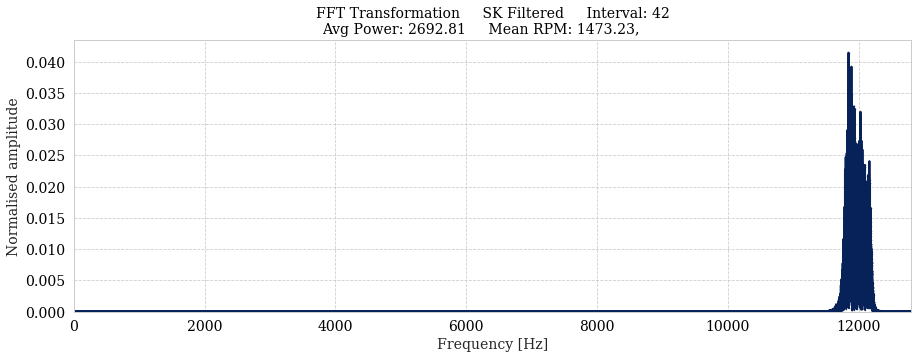

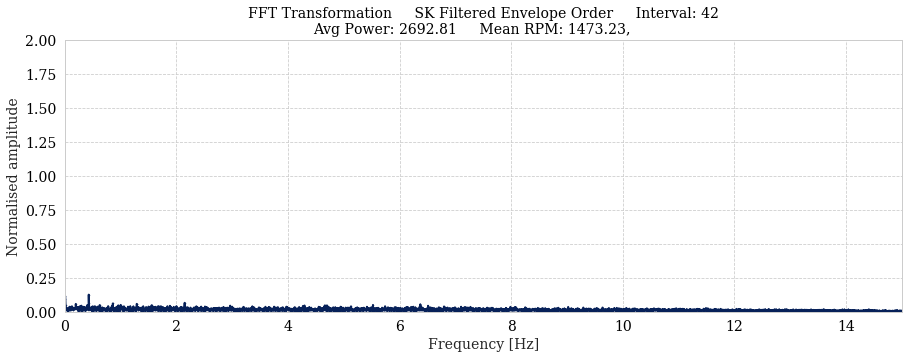

Kurtosis of 42 0.050
Center Frequency: 12000.000
Used Bandwidth in orders: 16.291


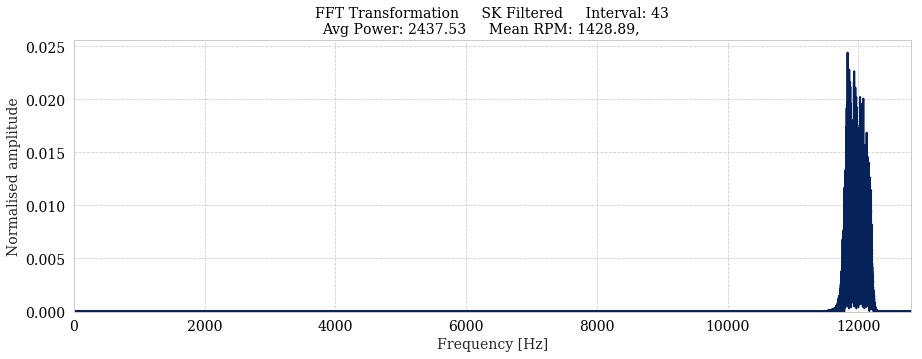

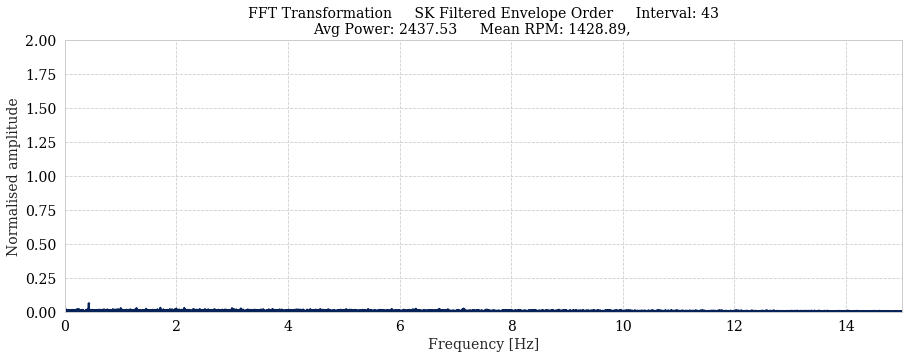

Kurtosis of 43 0.116
Center Frequency: 12000.000
Used Bandwidth in orders: 16.796


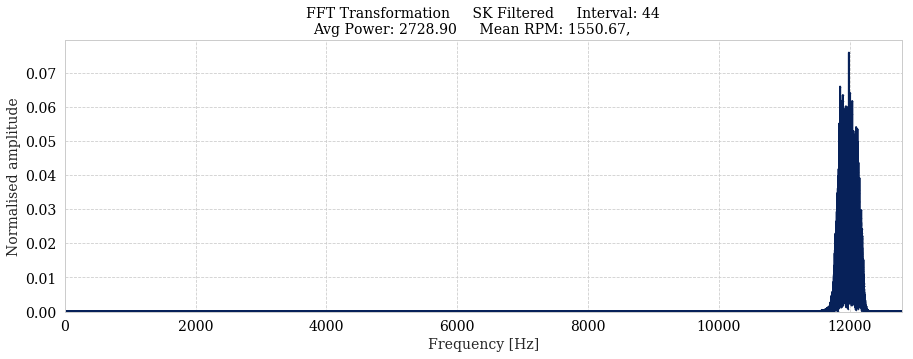

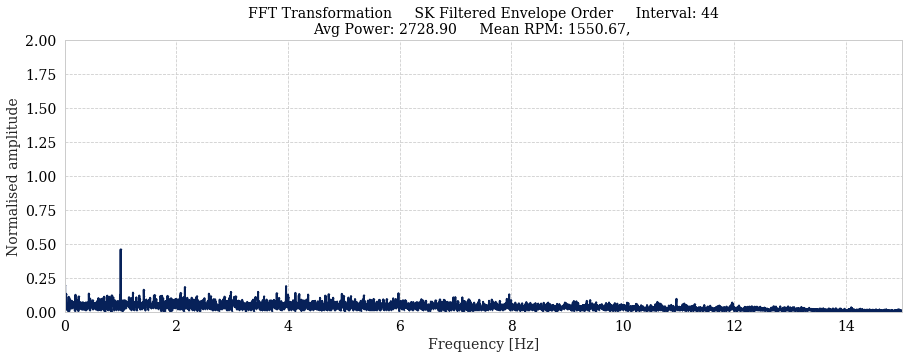

Kurtosis of 44 0.056
Center Frequency: 12000.000
Used Bandwidth in orders: 15.477


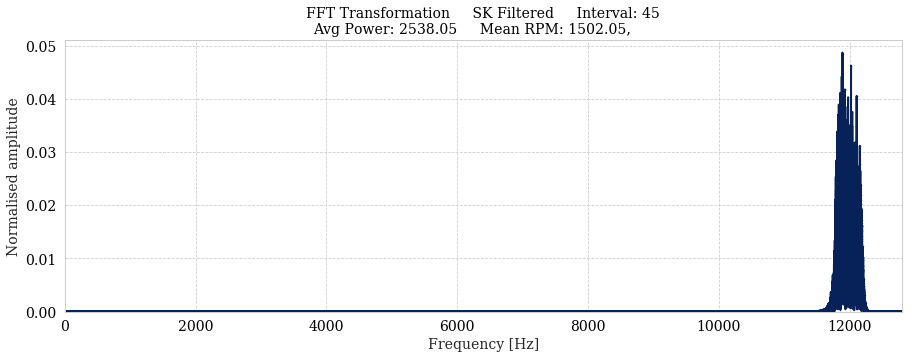

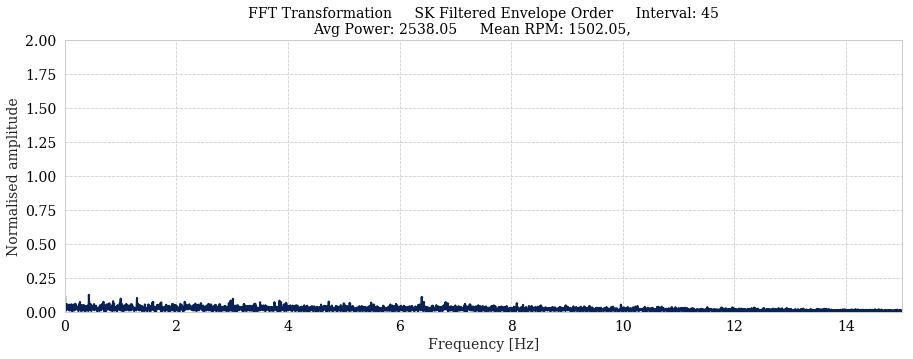

Kurtosis of 45 0.100
Center Frequency: 12000.000
Used Bandwidth in orders: 15.978


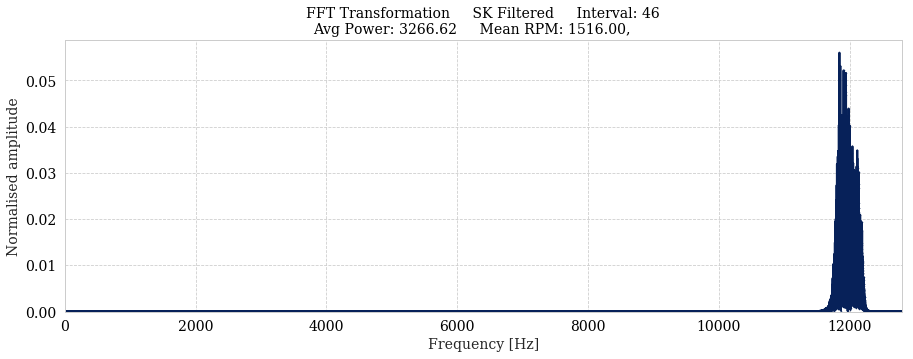

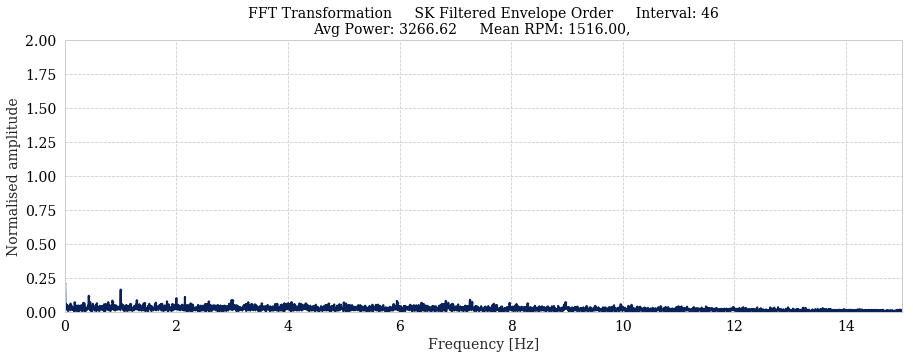

Kurtosis of 46 0.057
Center Frequency: 12000.000
Used Bandwidth in orders: 15.831


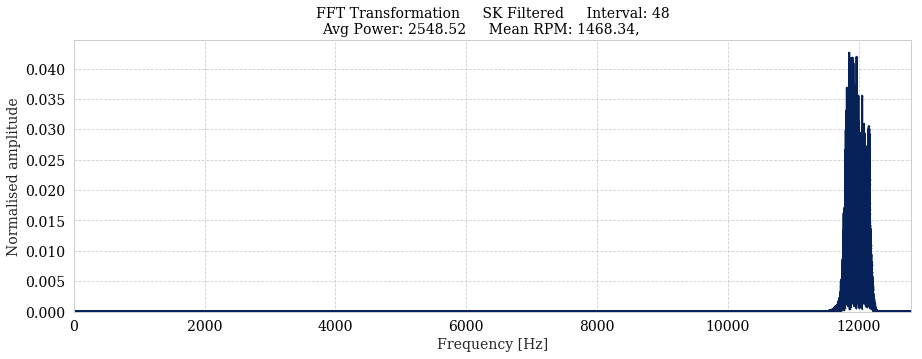

---------------------------------------


              INTERVAL 48
ENVELOPE ORDER COULD NOT BE CALCULATED!


---------------------------------------
Kurtosis of 48 0.103
Center Frequency: 12000.000
Used Bandwidth in orders: 16.345


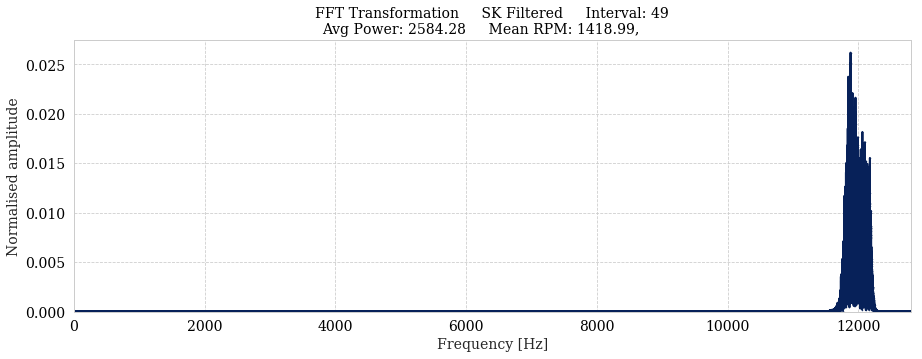

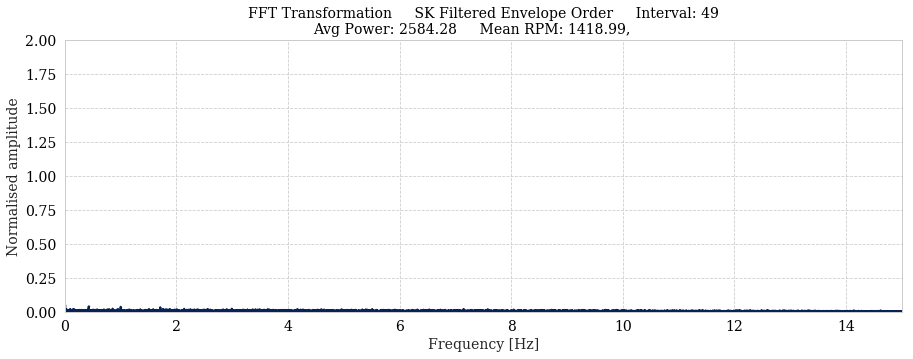

Kurtosis of 49 0.163
Center Frequency: 12000.000
Used Bandwidth in orders: 16.913
------------------------------------------------


               FIRST 50 FINISHED


------------------------------------------------


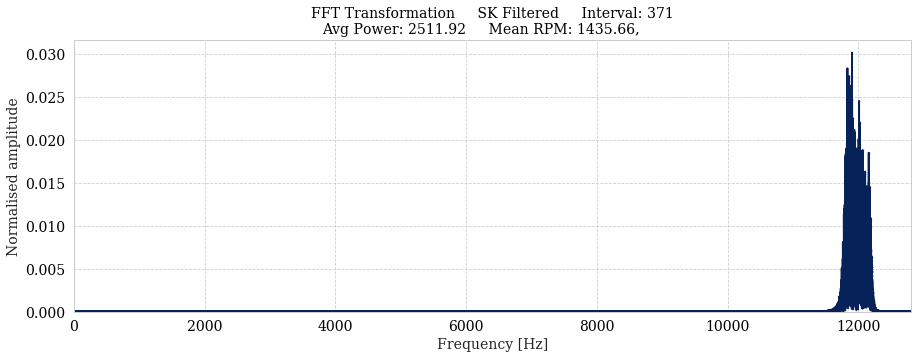

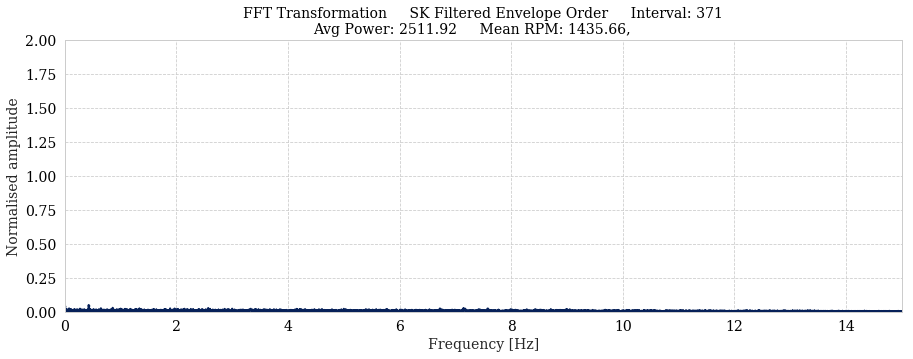

Kurtosis of 371 0.061
Center Frequency: 12000.000
Used Bandwidth in orders: 16.717


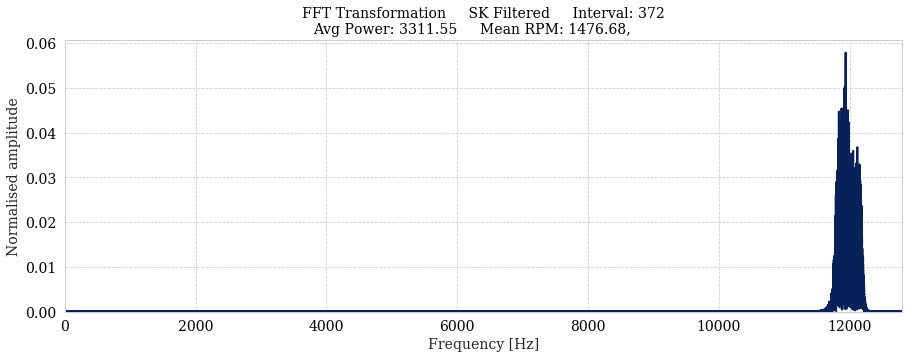

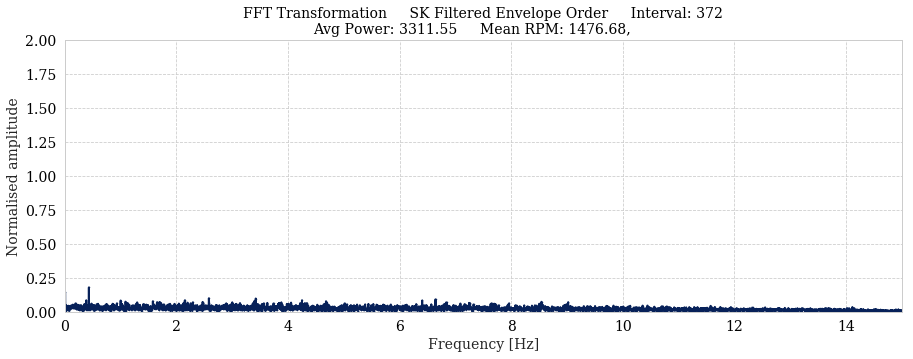

Kurtosis of 372 0.064
Center Frequency: 12000.000
Used Bandwidth in orders: 16.253


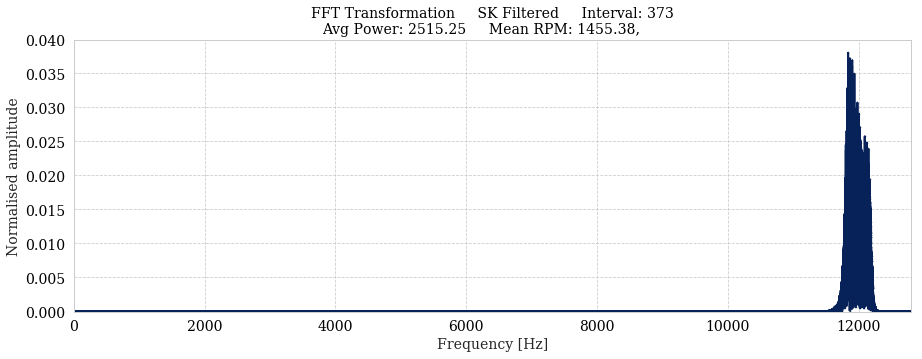

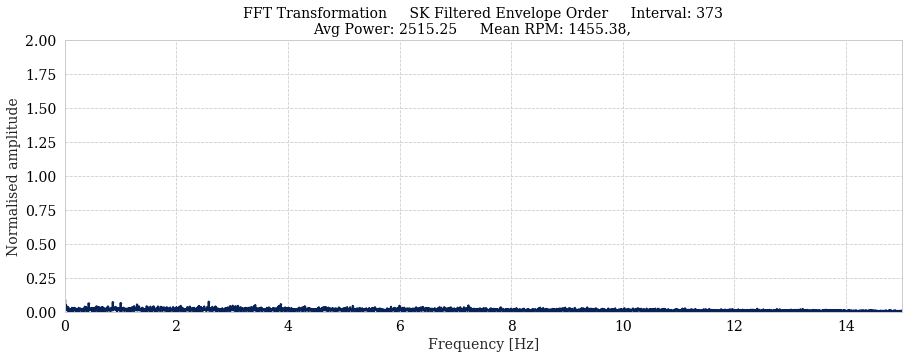

Kurtosis of 373 0.024
Center Frequency: 12000.000
Used Bandwidth in orders: 16.491


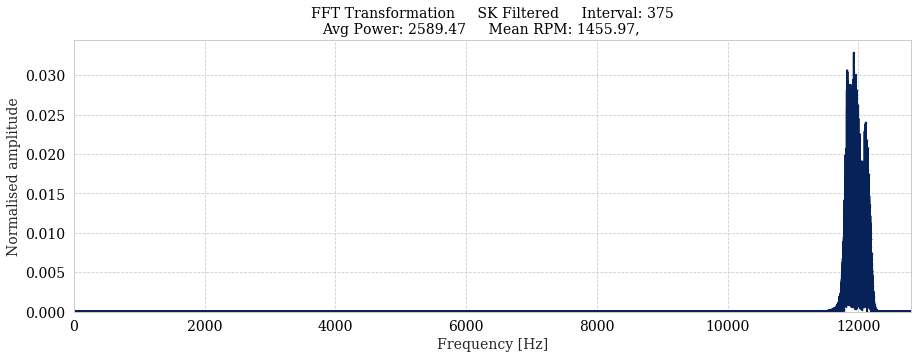

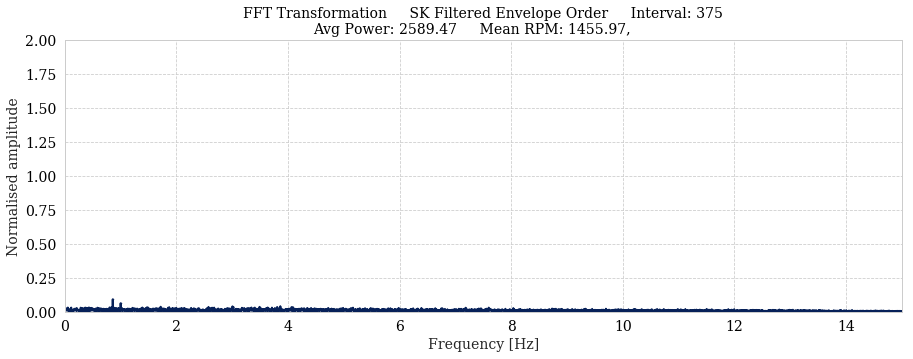

Kurtosis of 375 0.064
Center Frequency: 12000.000
Used Bandwidth in orders: 16.484


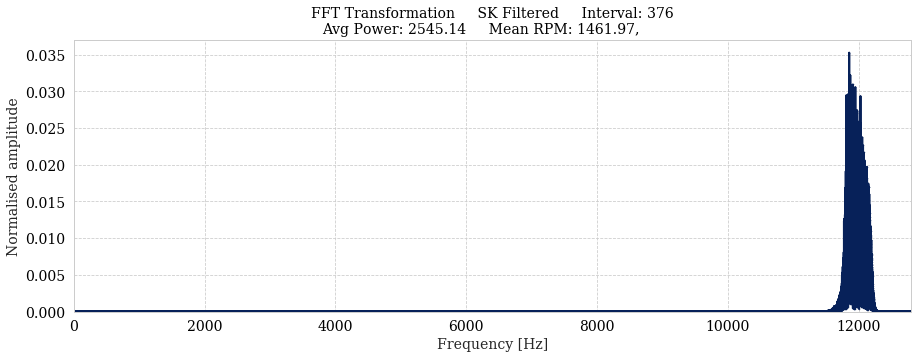

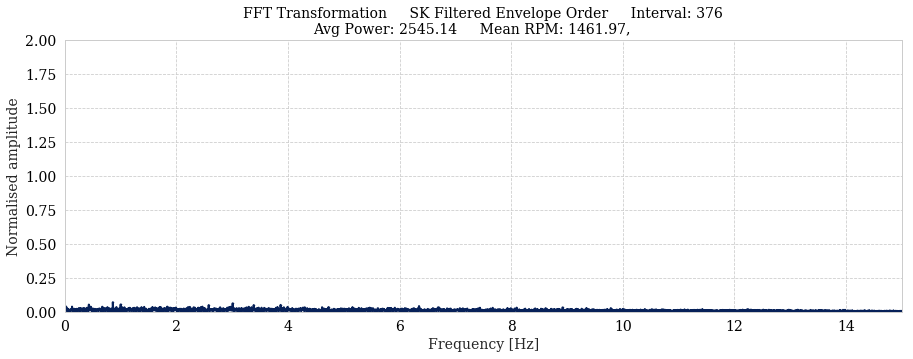

Kurtosis of 376 0.033
Center Frequency: 12000.000
Used Bandwidth in orders: 16.416


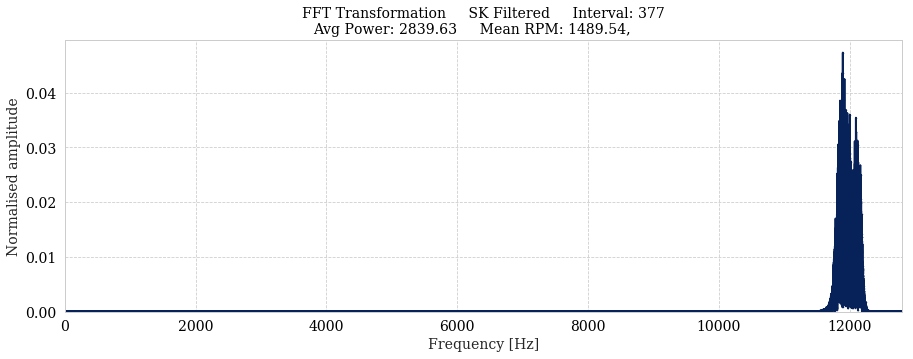

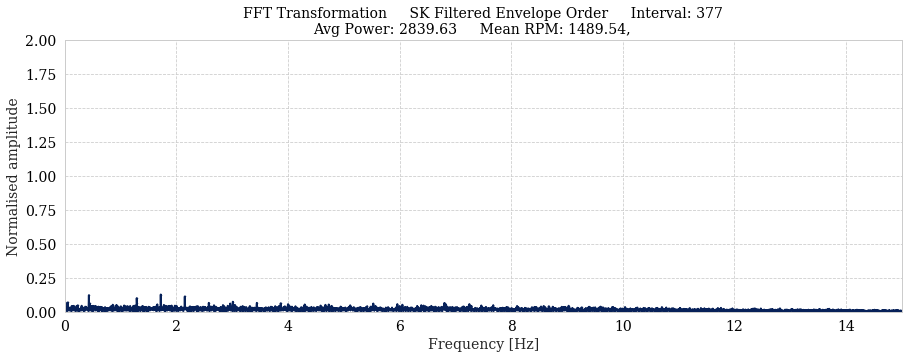

Kurtosis of 377 0.055
Center Frequency: 12000.000
Used Bandwidth in orders: 16.112


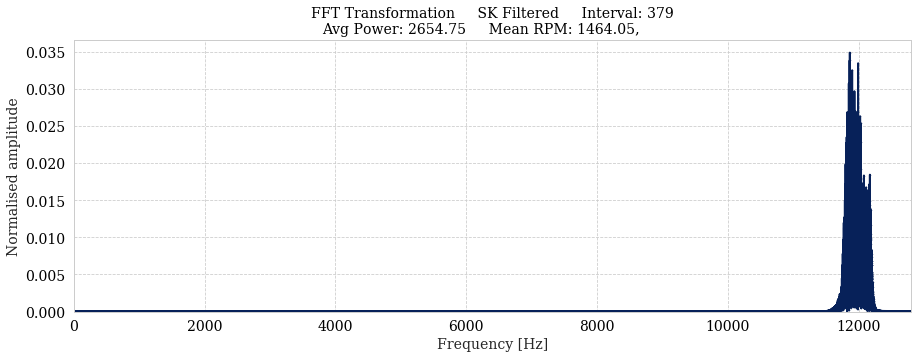

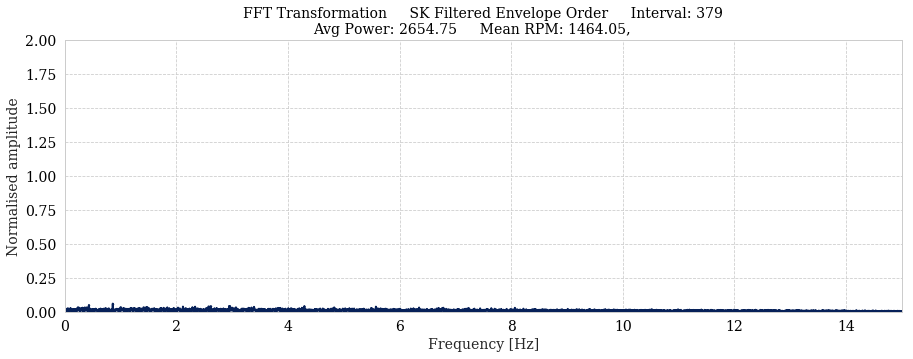

Kurtosis of 379 -0.055
Center Frequency: 12000.000
Used Bandwidth in orders: 16.393


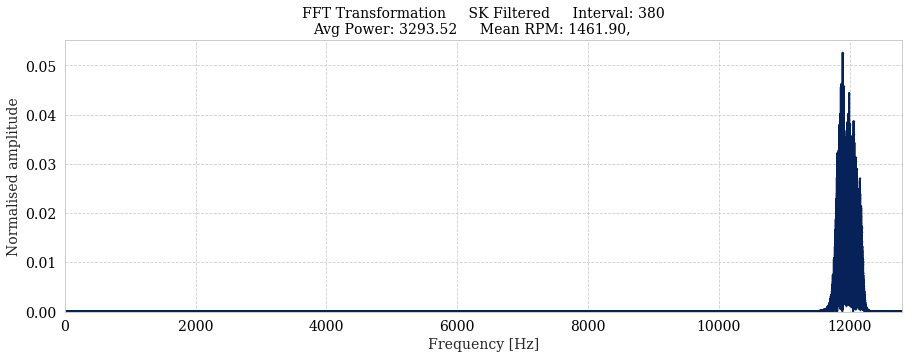

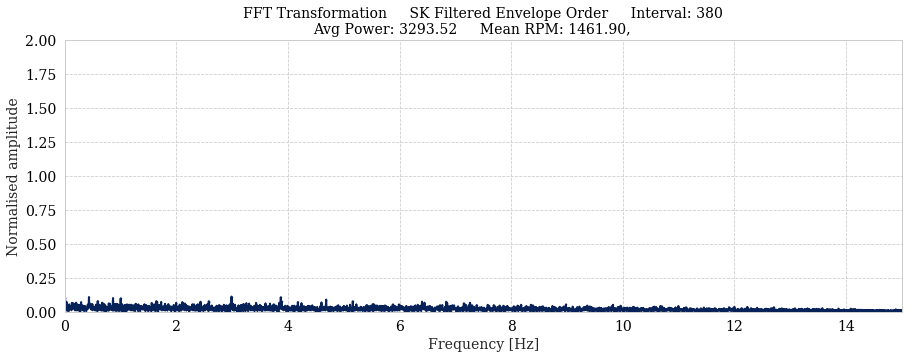

Kurtosis of 380 0.060
Center Frequency: 12000.000
Used Bandwidth in orders: 16.417


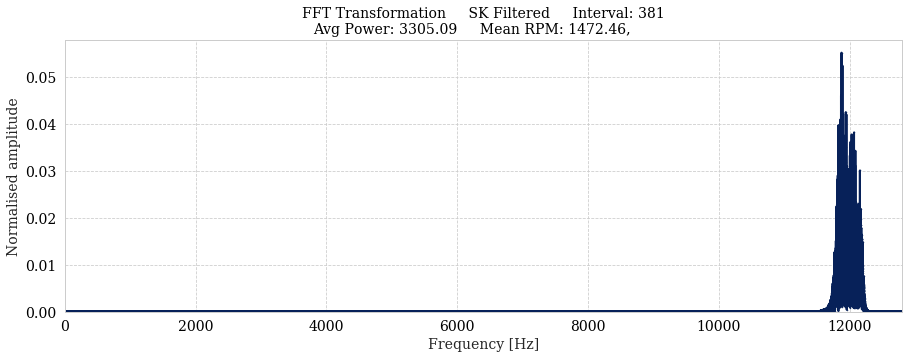

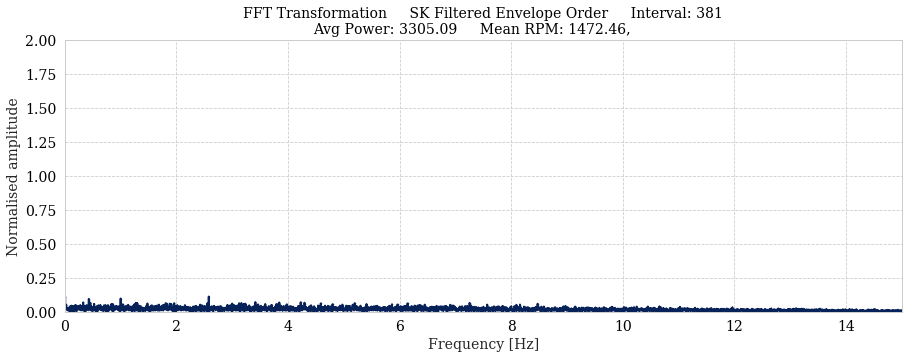

Kurtosis of 381 0.038
Center Frequency: 12000.000
Used Bandwidth in orders: 16.299


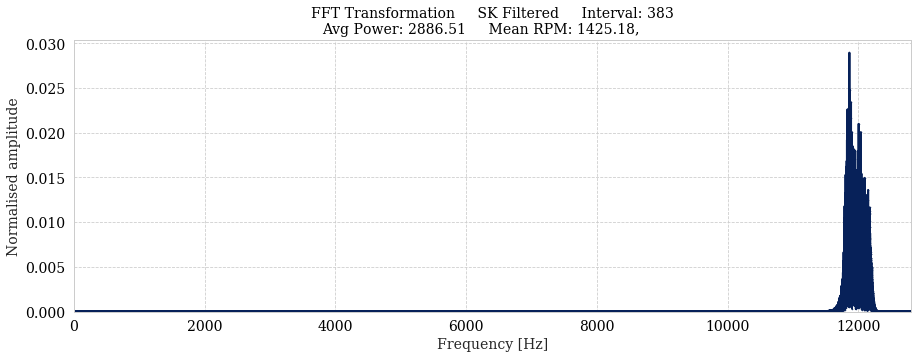

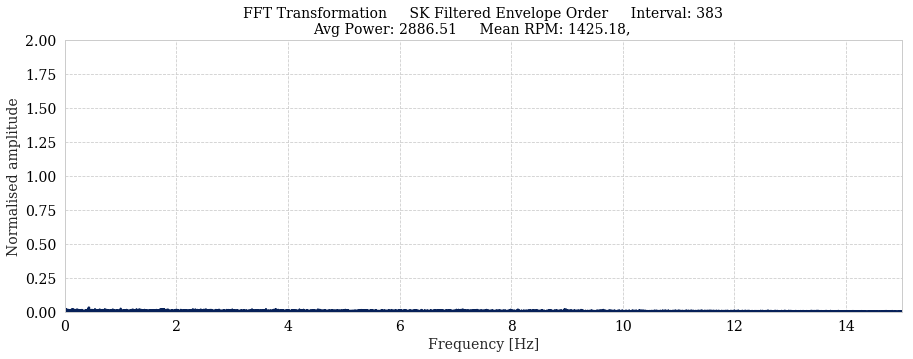

Kurtosis of 383 0.102
Center Frequency: 12000.000
Used Bandwidth in orders: 16.840


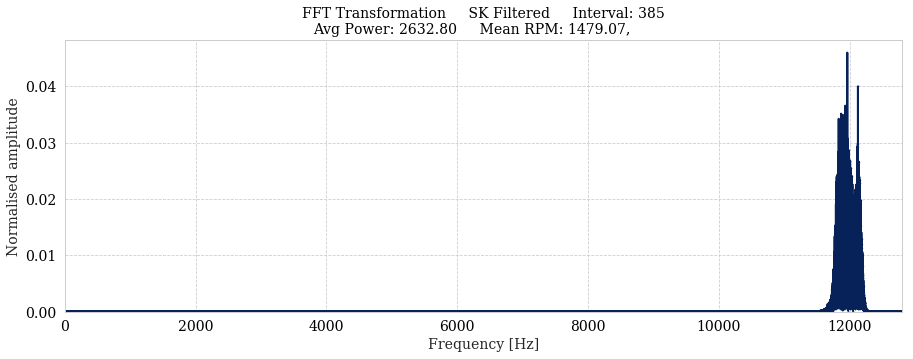

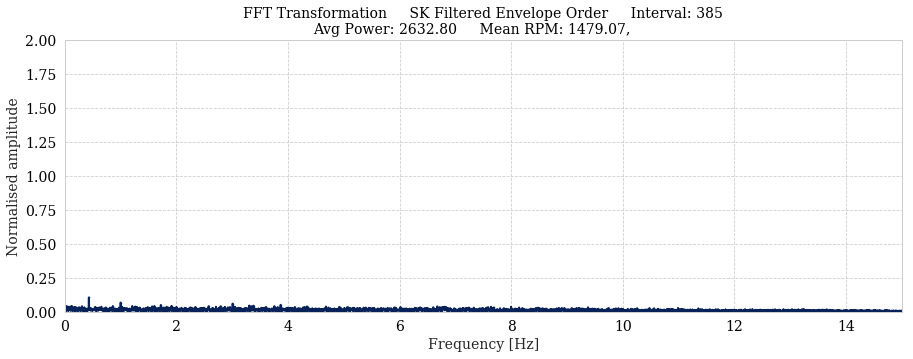

Kurtosis of 385 0.003
Center Frequency: 12000.000
Used Bandwidth in orders: 16.226


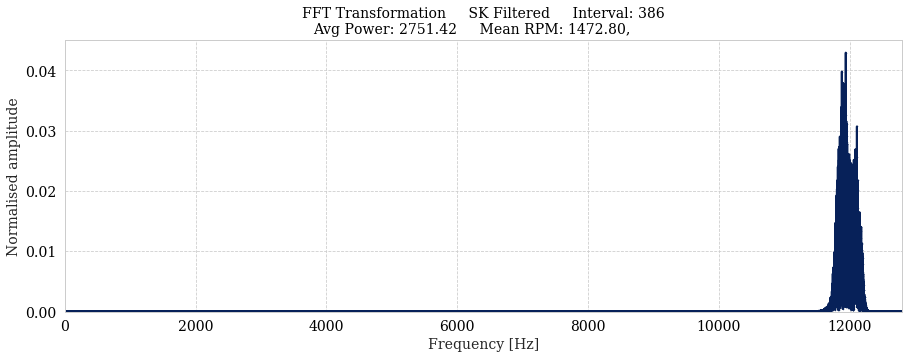

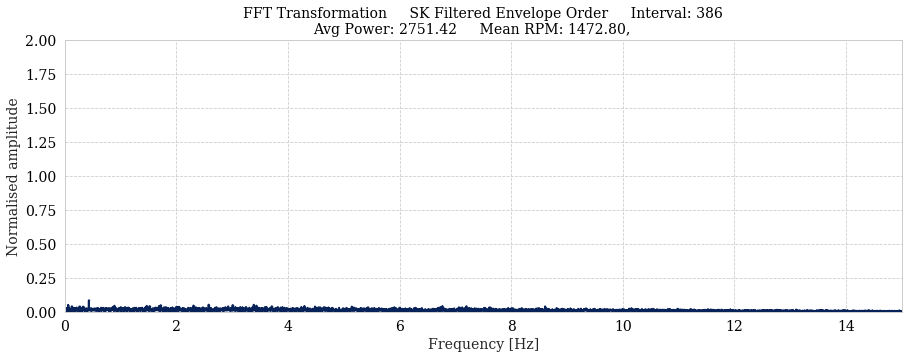

Kurtosis of 386 -0.096
Center Frequency: 12000.000
Used Bandwidth in orders: 16.296


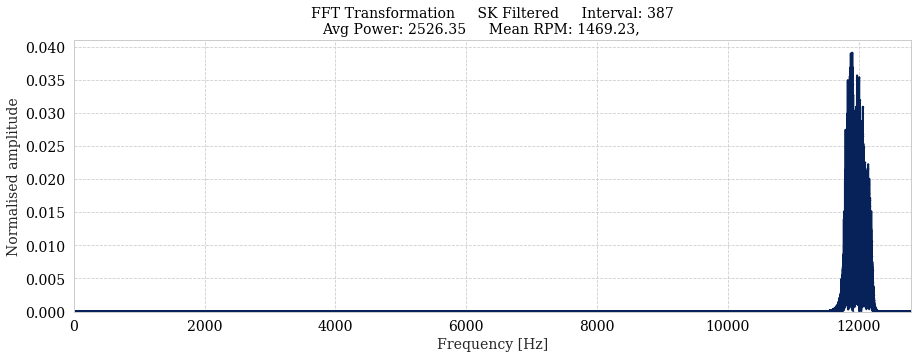

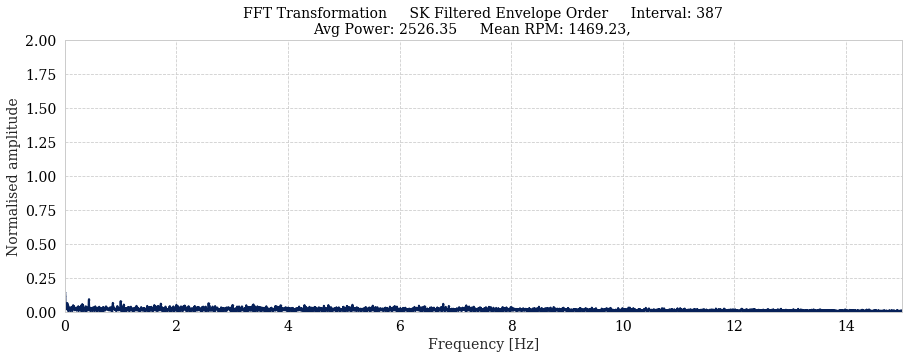

Kurtosis of 387 0.139
Center Frequency: 12000.000
Used Bandwidth in orders: 16.335


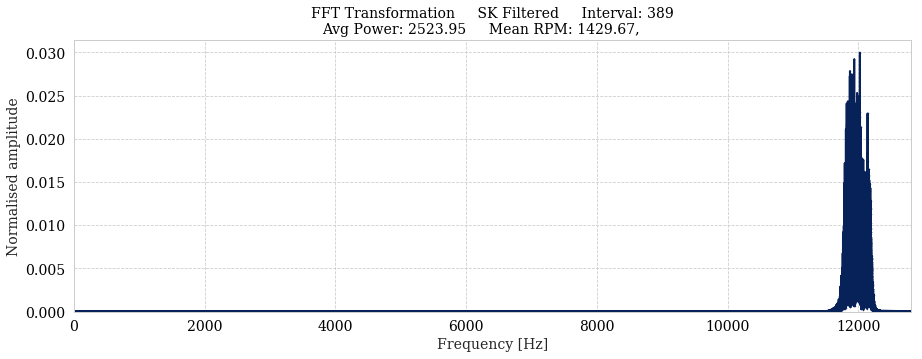

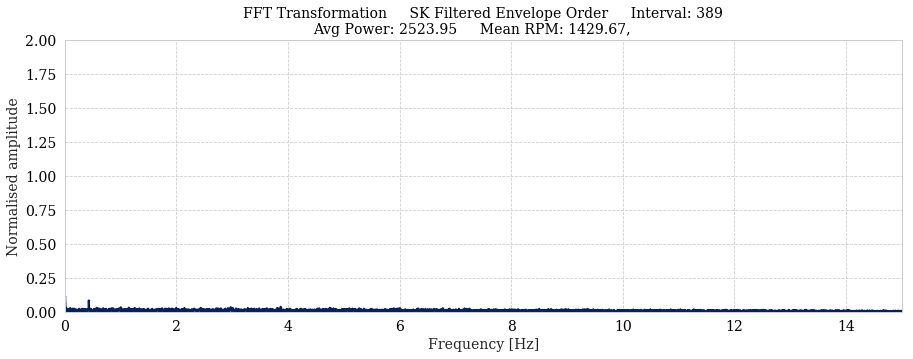

Kurtosis of 389 0.305
Center Frequency: 12000.000
Used Bandwidth in orders: 16.787


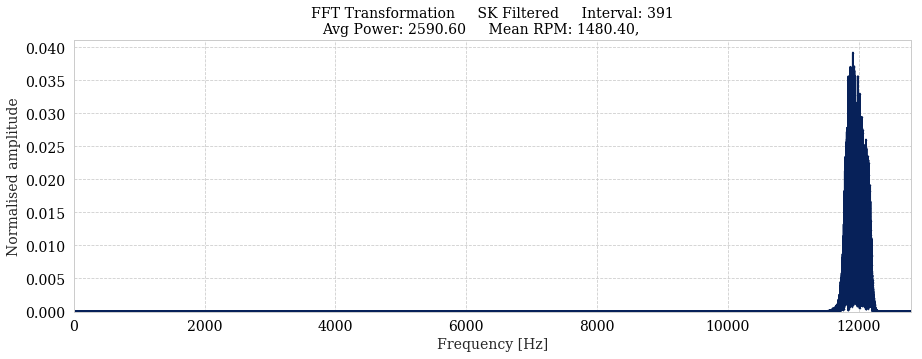

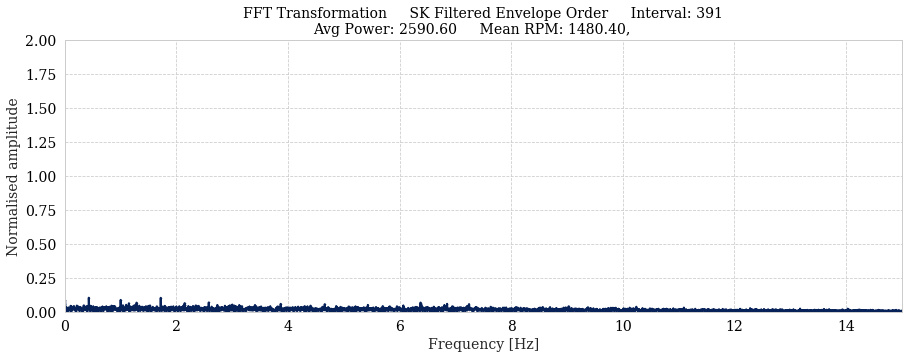

Kurtosis of 391 -0.028
Center Frequency: 12000.000
Used Bandwidth in orders: 16.212


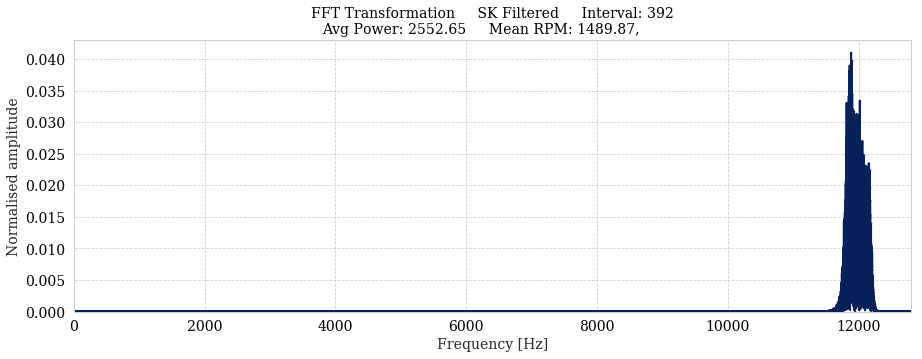

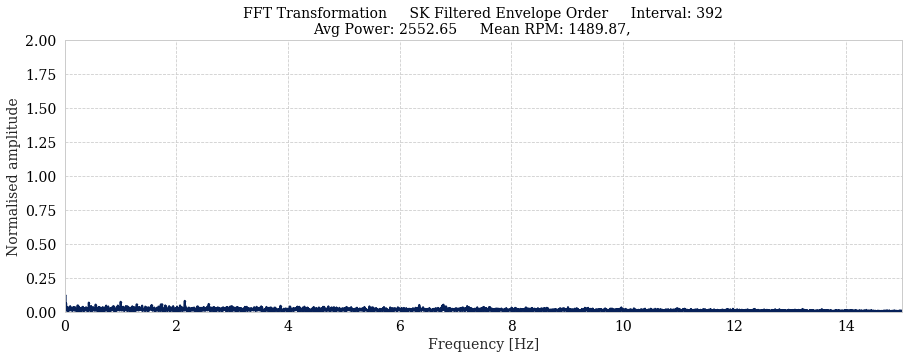

Kurtosis of 392 0.106
Center Frequency: 12000.000
Used Bandwidth in orders: 16.109


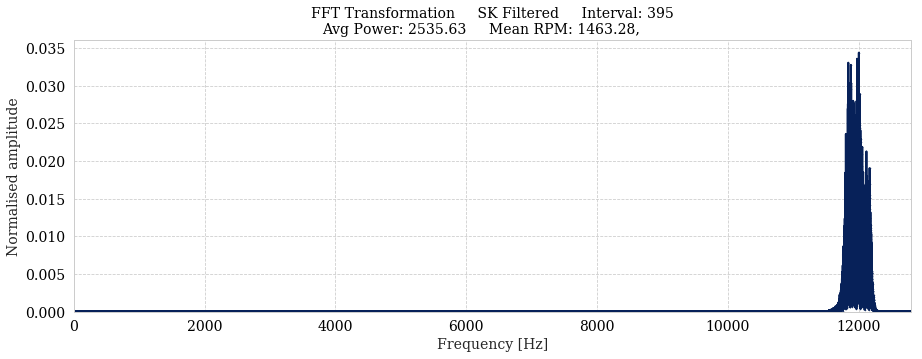

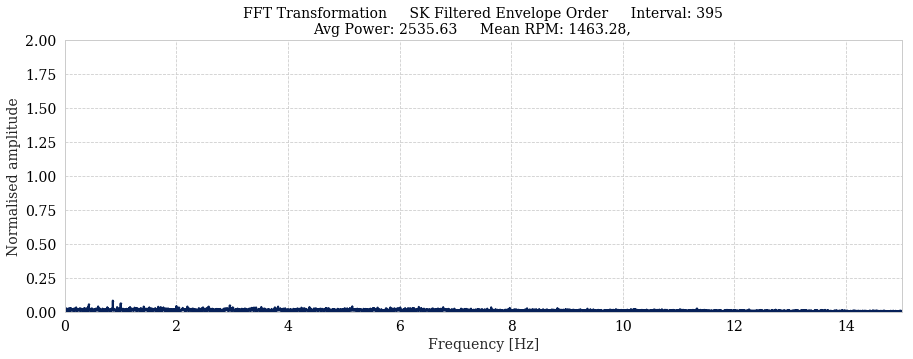

Kurtosis of 395 0.038
Center Frequency: 12000.000
Used Bandwidth in orders: 16.401


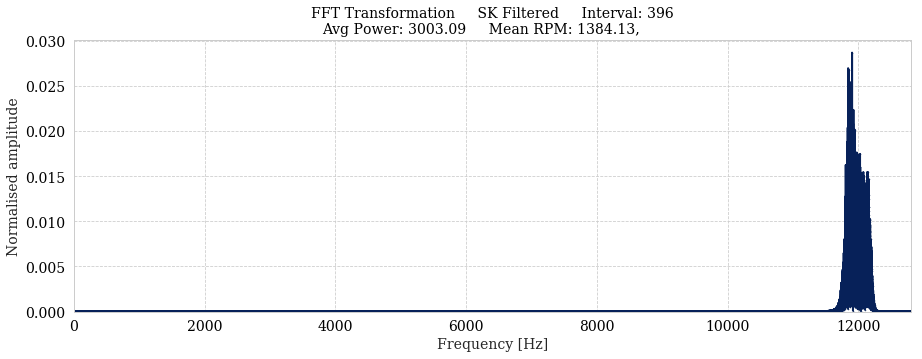

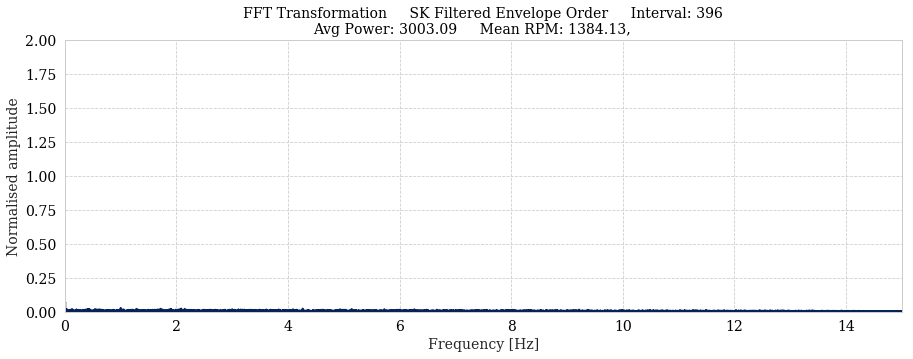

Kurtosis of 396 0.111
Center Frequency: 12000.000
Used Bandwidth in orders: 17.339


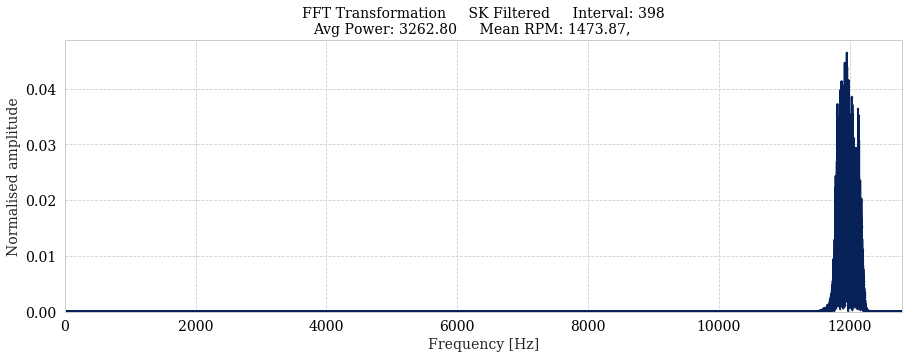

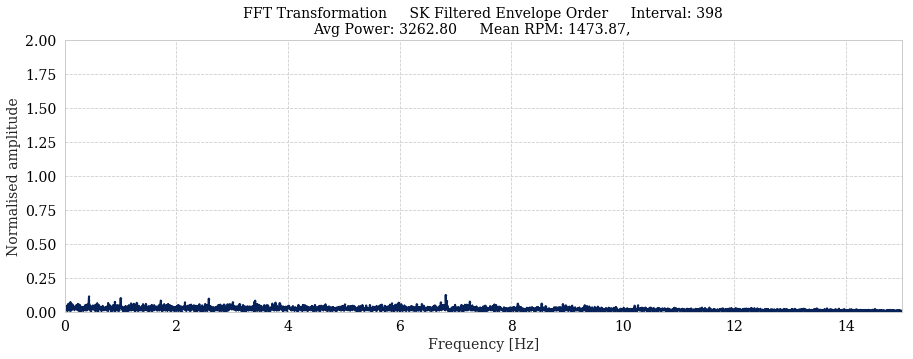

Kurtosis of 398 0.012
Center Frequency: 12000.000
Used Bandwidth in orders: 16.284


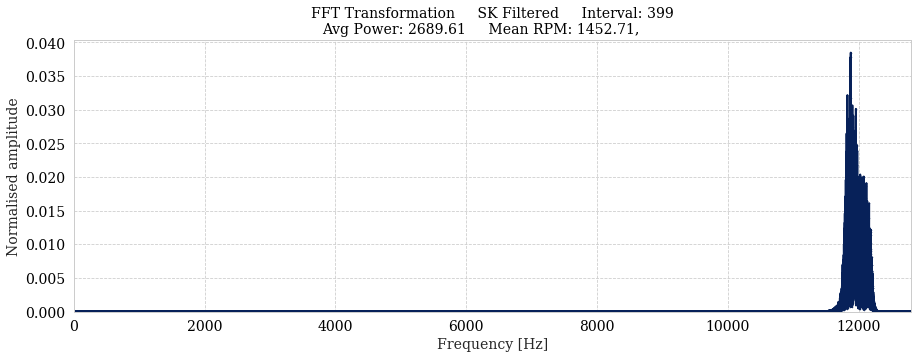

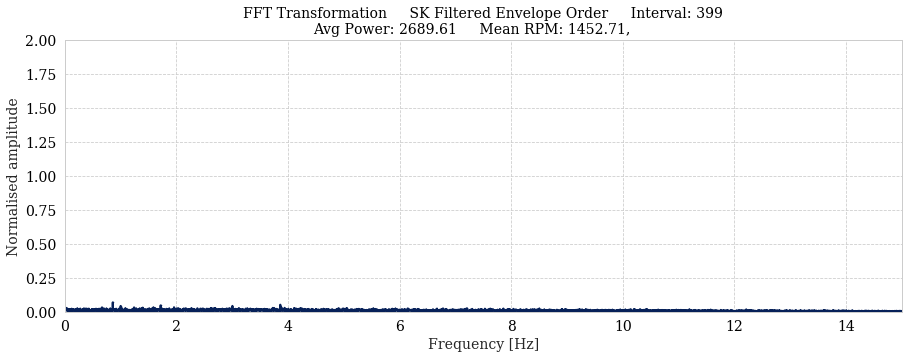

Kurtosis of 399 -0.036
Center Frequency: 12000.000
Used Bandwidth in orders: 16.521


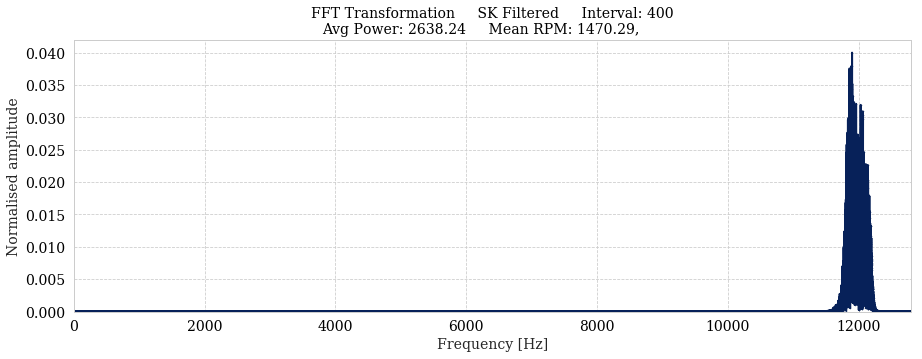

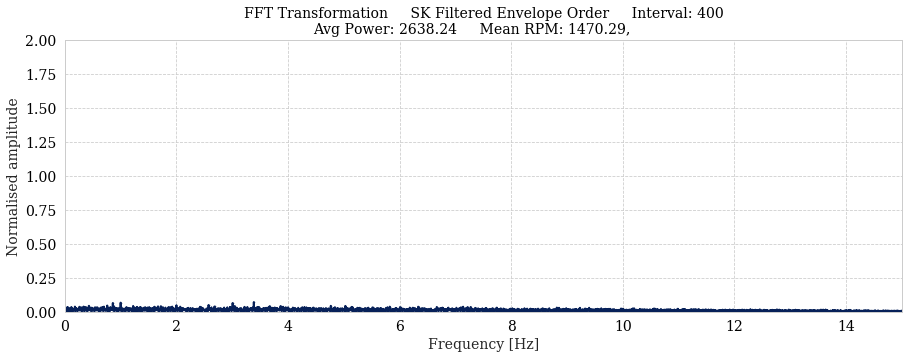

Kurtosis of 400 -0.018
Center Frequency: 12000.000
Used Bandwidth in orders: 16.323


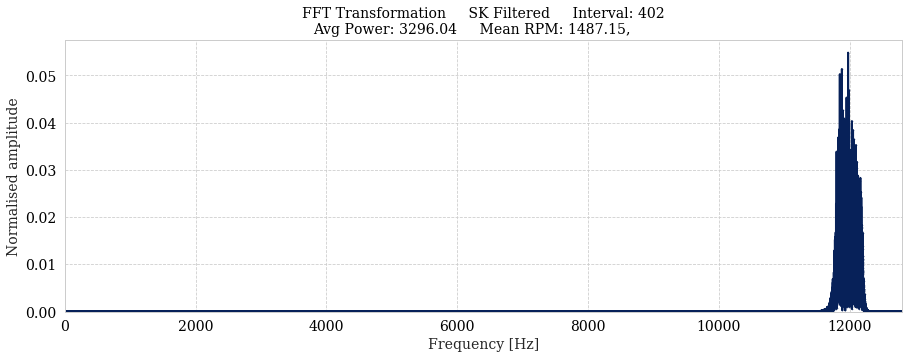

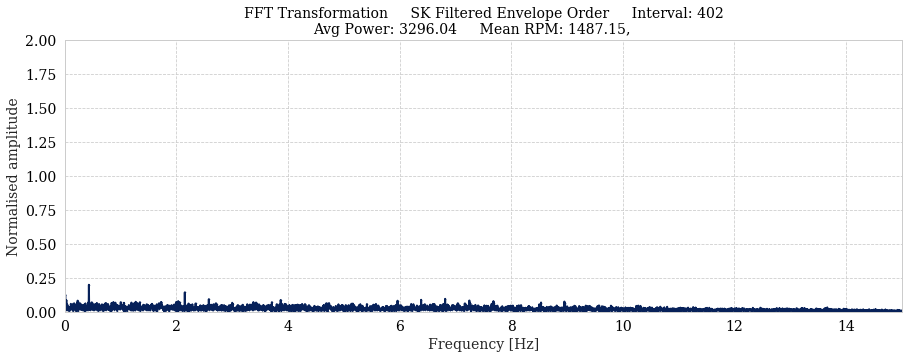

Kurtosis of 402 0.069
Center Frequency: 12000.000
Used Bandwidth in orders: 16.138


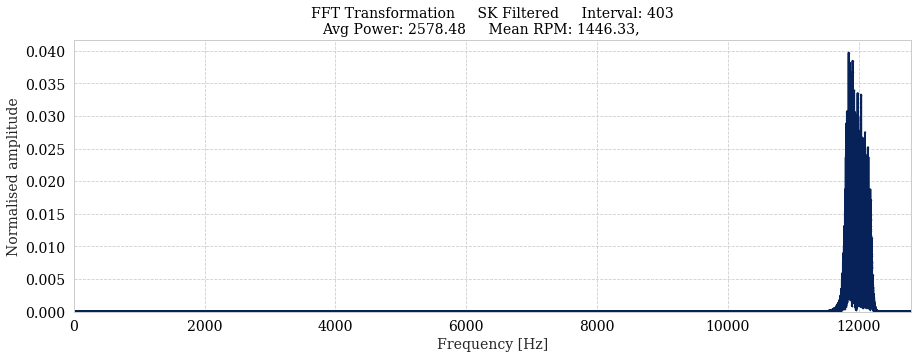

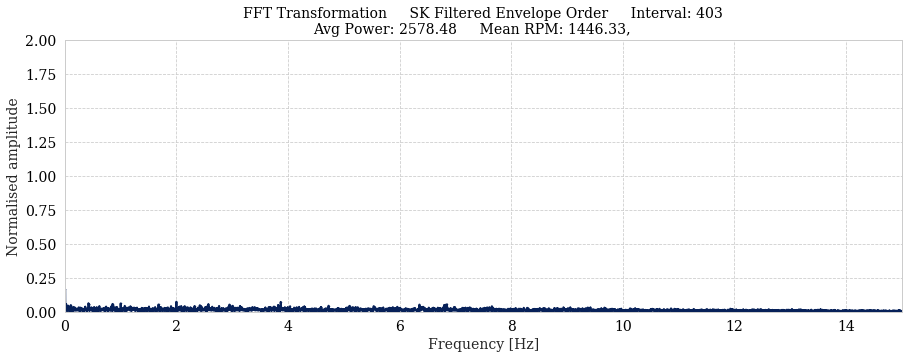

Kurtosis of 403 0.193
Center Frequency: 12000.000
Used Bandwidth in orders: 16.594


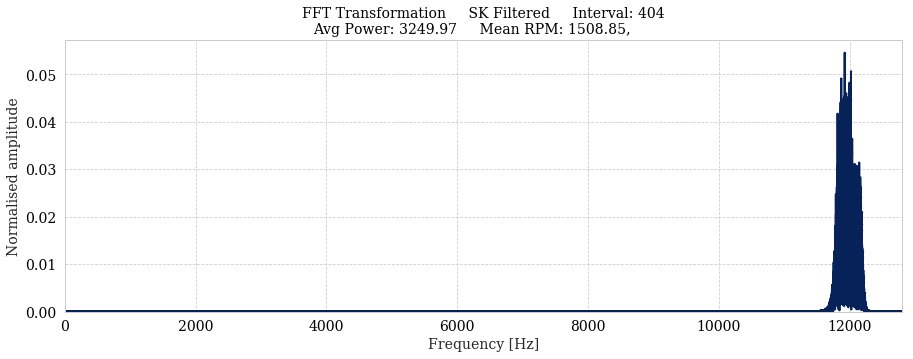

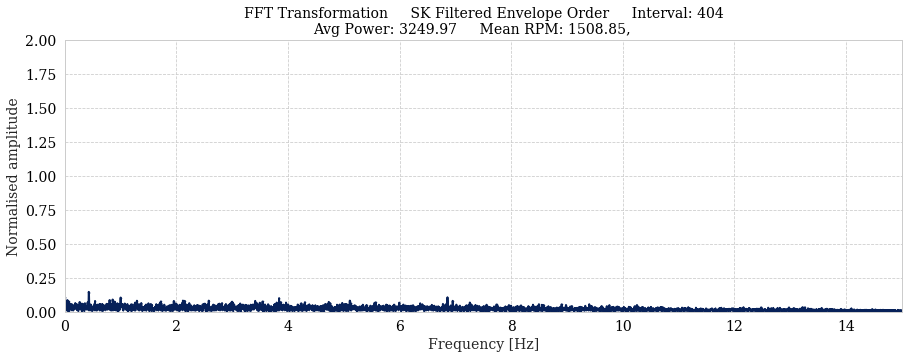

Kurtosis of 404 0.020
Center Frequency: 12000.000
Used Bandwidth in orders: 15.906


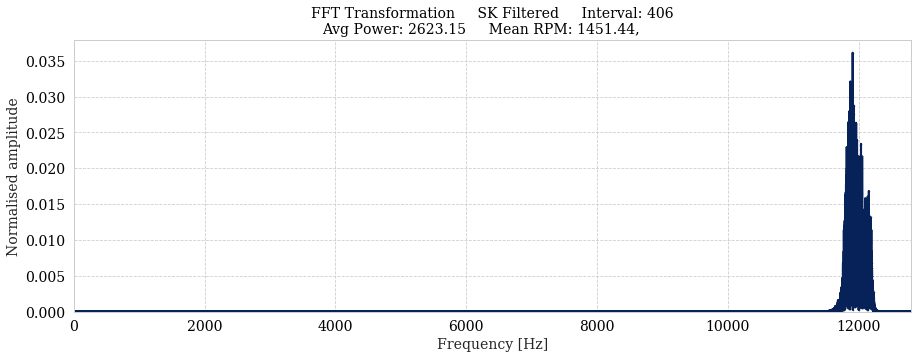

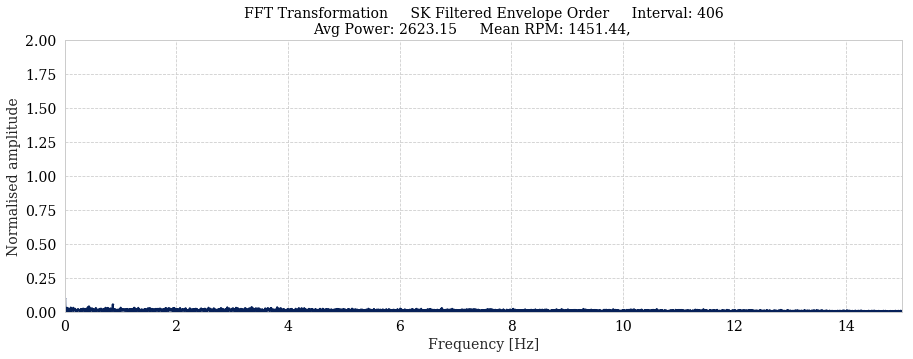

Kurtosis of 406 0.118
Center Frequency: 12000.000
Used Bandwidth in orders: 16.535


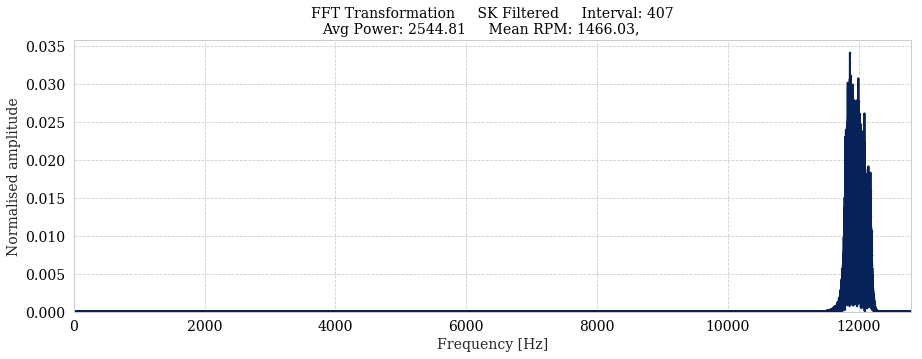

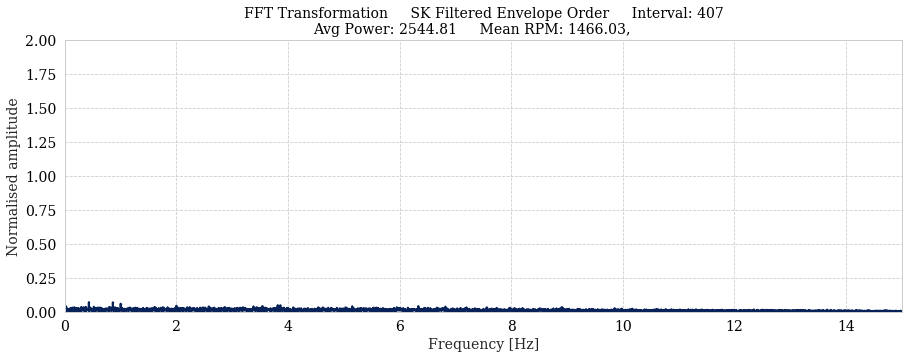

Kurtosis of 407 0.043
Center Frequency: 12000.000
Used Bandwidth in orders: 16.371


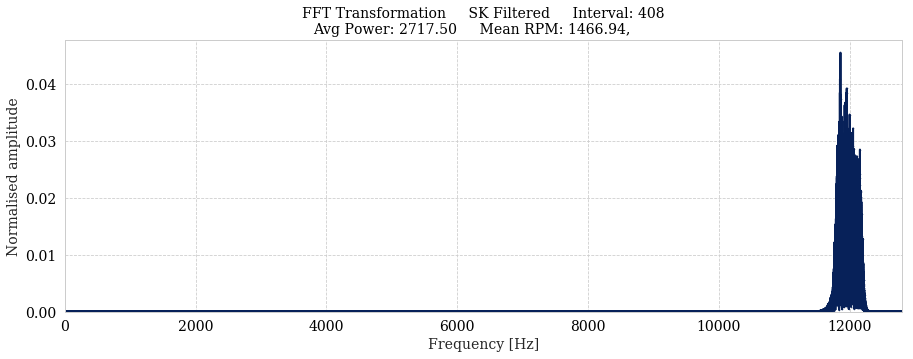

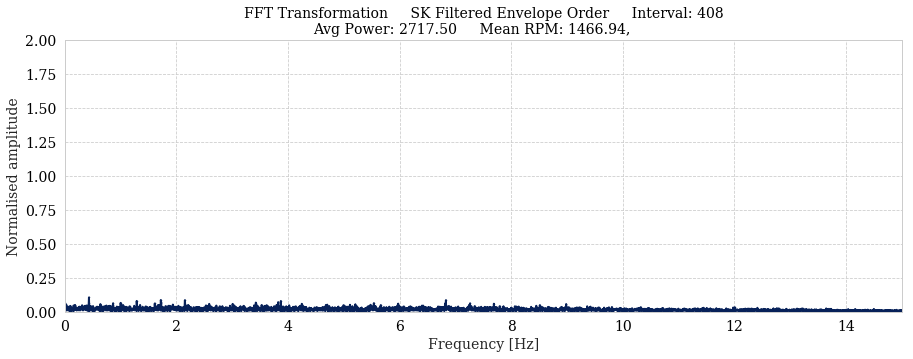

Kurtosis of 408 0.078
Center Frequency: 12000.000
Used Bandwidth in orders: 16.361


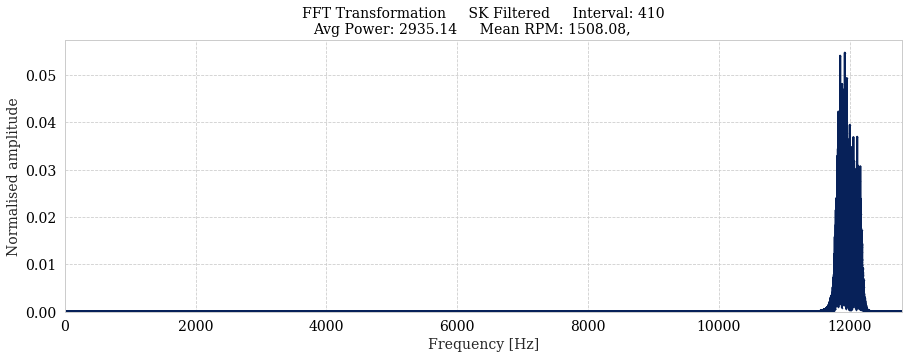

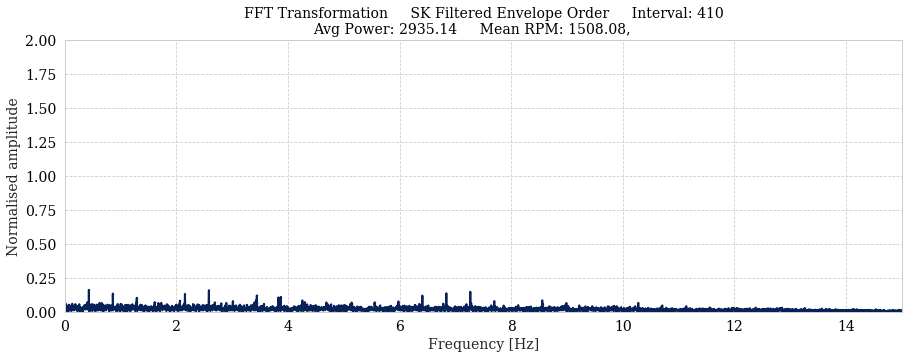

Kurtosis of 410 0.128
Center Frequency: 12000.000
Used Bandwidth in orders: 15.914


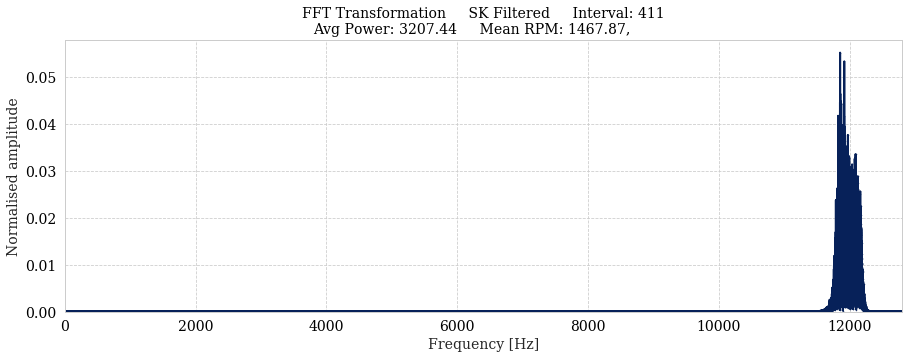

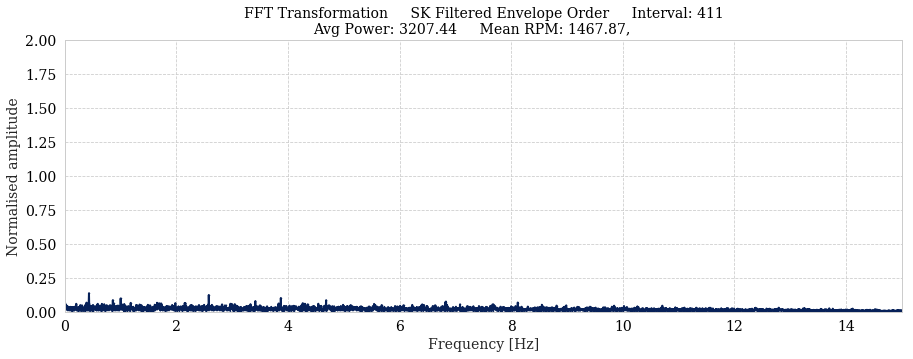

Kurtosis of 411 0.100
Center Frequency: 12000.000
Used Bandwidth in orders: 16.350


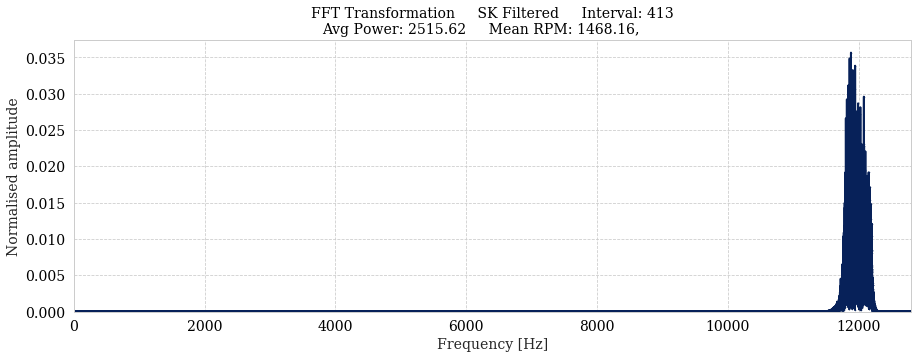

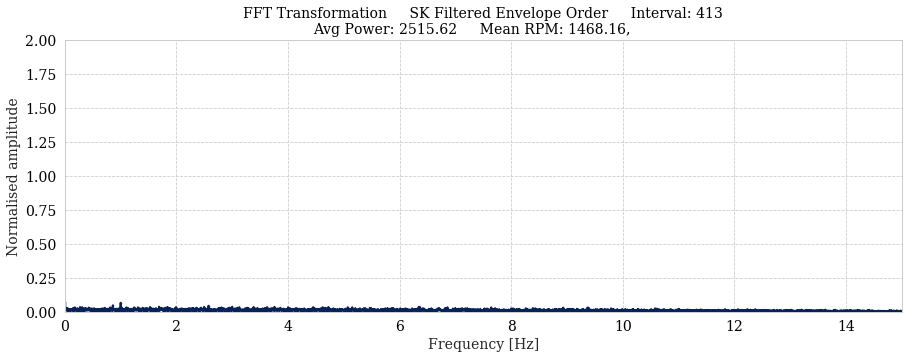

Kurtosis of 413 -0.025
Center Frequency: 12000.000
Used Bandwidth in orders: 16.347


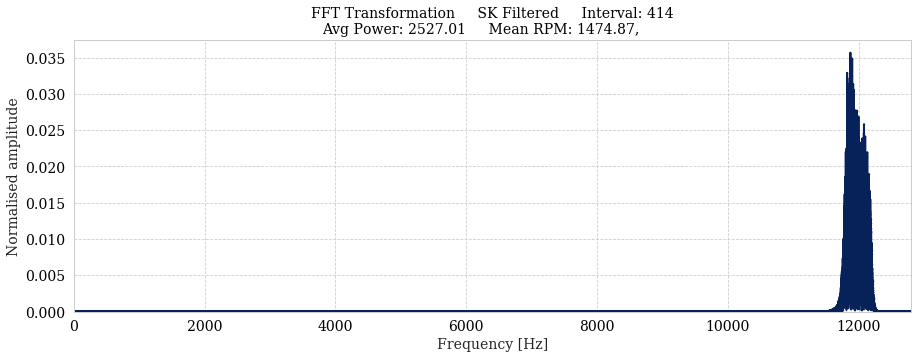

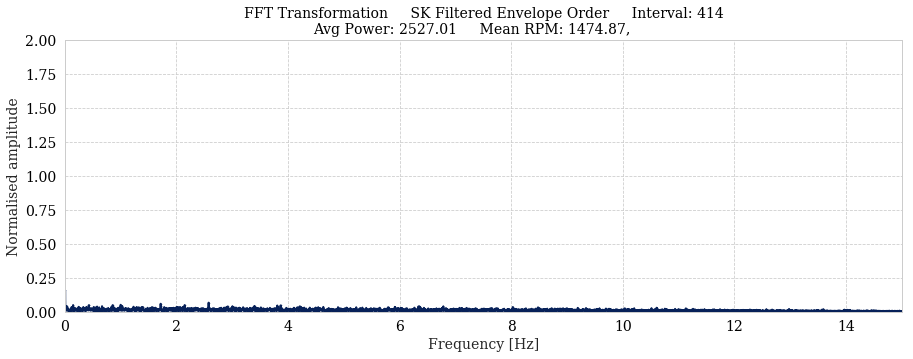

Kurtosis of 414 0.201
Center Frequency: 12000.000
Used Bandwidth in orders: 16.273


In [103]:
interesting_intervals = [31,91,95,147,191,224,231,232,266,284,312,347]
bandpassed_signal = bandpassed_12K
cf =12000

for i, signal in enumerate(bandpassed_signal):
#for i in interesting_intervals:
    if avg_power[i] < 2400:
        continue
    bw = float(concated['Bandwidths'][i])
    if i == 50:
        print('------------------------------------------------\n\n')
        print('               FIRST 50 FINISHED')
        print('\n\n------------------------------------------------')
    if i< 50 or i>370: #bw < 1000 and i<50:# or (i>50 and i<60) or (i > 190 and i < 200)):
        # Plot SK filtered signal
        #plotting_methods.plot_signal(times[i][1:], bandpassed_signal[i],name='SK Filtered', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        plotting_methods.plot_fft(times[i][1:], bandpassed_signal[i], name='SK Filtered', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        
        #Calcutale envelope
        highut_lp = 1000
        rectified = abs(bandpassed_signal[i])**2
        bandpass_filtered_rect_lp = filters.butter_lp_filter(rectified, highut_lp, fs, order=5)
        
        #Plot envelope signal
        one_order = avg_rpm[i]/60
        freq=[one_order]
        #plotting_methods.plot_fft(times[i][1:], bandpass_filtered_rect_lp, x_max=100,frequency_lines=freq,name='SK Filtered Envelope', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        
        #Calculate Envelope Order
        try:
            x_round, resampled_envelope, x_time = resample_signals.do_cubic_resampling(times[i][1:], bandpass_filtered_rect_lp, peak_array[i], number_of_resample_points=2000)
            plotting_methods.plot_fft(x_round, resampled_envelope, x_max=15, y_max=2,frequency_lines=[], name='SK Filtered Envelope Order', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        except: #If resampling fails for some reason
            print('---------------------------------------\n\n')
            print(f'              INTERVAL {i}')
            print('ENVELOPE ORDER COULD NOT BE CALCULATED!\n\n')
            print('---------------------------------------')
        
        # Print key values
        print(f'Kurtosis of {i} {kurtosis(bandpassed_signal[i]):.3f}')
        print(f'Center Frequency: {cf:.3f}')
        print(f'Used Bandwidth in orders: {400*60/avg_rpm[i]:.3f}')
